# Project - Python For Data Analysis 🐍 

---

## Addiction to drugs 💊

Various studies have outlined that personality attributes are related with drug consumption.
3 psychologic tests:
- Big Five personality traits (NEO-FFI-R), 
- impulsivity (BIS-11), available
- sensation seeking (ImpSS)


• A drug is a ‘chemical that influences biological function (other than by providing
nutrition or hydration)’.  
• A psychoactive drug is a ‘drug whose influence is in a part on mental functions’.



Problem which can be solved:
* Seven class classifications for each drug separately.
* Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

**Set a mesurable objective for our project:**
- **Objective:** Predict the frequency of addiction of certain drugs
- **Metrics:** balanced_accuracy_score, confusion matrix

### *Table of Contents*

- [Requirements](#requirements)
- [Import data](#import_data)
- [Data Vizualisation](#data_viz) 🔎
  - [Global analysis of the dataset](#global_analysis) 
  - [Exploration of all columns](#col_exploration) 
  - [Missing values](#missing_values) 
  - [Relationships](#relationships) 
  - [PCA](#pca) 
- [Preprocessing](#preprocessing)
- [Modeling](#modeling)
  - [Initial classes](#initial_classes) 
  - [New classes](#new_classes) 
  - [Tuning hyperparameters](#tuning) 
- [Final models for each drugs](#final_models)
  - [Alcohol](#alcohol) 
  - [Amphet](#amphet) 
  - [Amyl](#amyl) 
  - [Benzos](#benzos) 
  - [Caff](#caff) 
  - [Cannabis](#cannabis) 
  - [Coke](#coke) 
  - [Crack](#crack) 
  - [Esctasy](#esctasy)
  - [Heroin](#heroin) 
  - [Ketamine](#ketamine) 
  - [Legalh](#legalh) 
  - [Meth](#meth) 
  - [LSD](#lsd) 
  - [Mushrooms](#mushrooms) 
  - [Nicotine](#nicotine)
  - [VSA](#vsa) 

<a name="requirements">

### Requirements

In [1]:
# Data
import numpy as np
import pandas as pd

# Vizualisation
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns 

# Stats
import scipy.stats as stats

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, make_scorer, roc_curve, auc

# Model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Utils
from tqdm.notebook import tqdm
import pickle

# Set a style to our plots
plt.style.use('ggplot')

<a name="import_data">

### Import data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data',header = None)
# In the case, the URL may be not valid use this code:
# df = pd.read_csv(r'data/drug_consumption.data',header = None)

In [3]:
column_names = ['ID','Age','Gender','Education','Country','Ethnicity',
                'Nscore','Escore','Oscore','Ascore','Cscore','Impulsive',
                'SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis',
                'Choc','Coke','Crack','Esctasy','Heroin','Ketamine','Legalh',
                'LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
feature_names = ["Age","Gender","Education",'Country','Ethnicity',
                'Nscore','Escore','Oscore','Ascore','Cscore','Impulsive',
                'SS']
drug_names = ['Alcohol', 'Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Esctasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df.columns = column_names

In [4]:
df.head()

ID      Age   Gender  Education  Country  ...  Meth  Mushrooms  Nicotine  Semer  VSA
0   1  0.49788  0.48246   -0.05921  0.96082  ...   CL0        CL0       CL2    CL0  CL0
1   2 -0.07854 -0.48246    1.98437  0.96082  ...   CL3        CL0       CL4    CL0  CL0
2   3  0.49788 -0.48246   -0.05921  0.96082  ...   CL0        CL1       CL0    CL0  CL0
3   4 -0.95197  0.48246    1.16365  0.96082  ...   CL0        CL0       CL2    CL0  CL0
4   5  0.49788  0.48246    1.98437  0.96082  ...   CL0        CL2       CL2    CL0  CL0

[5 rows x 32 columns]

<a name="data_viz">

## Data Vizualisation

---
⚠️ All variables have already been preprocessed (encoding) which makes the visualization more complicated and requires the creation of another dataset.

In [5]:
class_drugs = ["Never Used", "Used over a decade ago", "Used in Last Decade", "Used in the Last Year", "Used in the Last month", "Used in the Last Week", "Used in Last Day"]
class_age = ["18-24","25-34","35-44","45-54","55-64","64+"]
class_gender = ["Man", "Women"]
class_education = ["Left school before 16 years", "Left school at 16 years", "Left school at 17 years", "Left school at 18 years", "Some college or university, no certificate or degree",
                   "Professional certificate/ diploma", "University degree", "Master's degree", "Doctoral degree"]
class_country = ["USA", "New Zealand", "Other", "Australia", "Republic of Ireland", "Canada", "UK"]
class_Ethnicity = ["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
class_nscore = np.arange(12,61)
class_escore = np.delete(np.arange(16,60), [1,-3])
class_oscore = np.delete(np.arange(24,61), [1,3])
class_ascore = np.delete(np.arange(12,61), [1,2,3,5,7,8,9,10])
class_cscore = np.delete(np.arange(17,60), [1,-2])


df_viz = df.copy()
df_viz.iloc[:,13:] = df.iloc[:,13:].replace(sorted(df.Cannabis.unique()),class_drugs)
df_viz.loc[:,"Age"] = df.loc[:,"Age"].replace(sorted(df.Age.unique()),class_age)
df_viz.loc[:,"Gender"] = df.loc[:,"Gender"].replace(sorted(df.Gender.unique()),class_gender)
df_viz.loc[:,"Education"] = df.loc[:,"Education"].replace(sorted(df.Education.unique()),class_education)
df_viz.loc[:,"Country"] = df.loc[:,"Country"].replace(sorted(df.Country.unique()),class_country)
df_viz.loc[:,"Ethnicity"] = df.loc[:,"Ethnicity"].replace(sorted(df.Ethnicity.unique()),class_Ethnicity)

df_viz.loc[:,"Nscore"] = df.loc[:,"Nscore"].replace(sorted(df.Nscore.unique()),class_nscore)
df_viz.loc[:,"Escore"] = df.loc[:,"Escore"].replace(sorted(df.Escore.unique()),class_escore)
df_viz.loc[:,"Oscore"] = df.loc[:,"Oscore"].replace(sorted(df.Oscore.unique()),class_oscore)
df_viz.loc[:,"Ascore"] = df.loc[:,"Ascore"].replace(sorted(df.Ascore.unique()),class_ascore)
df_viz.loc[:,"Cscore"] = df.loc[:,"Cscore"].replace(sorted(df.Cscore.unique()),class_cscore)

# We also grouped the different classes for each drugs in the way that we have a binary target: ever used or not the drug
for drug in drug_names:
    df_viz[f"{drug}_used"] = df_viz[drug].replace(class_drugs, ["Never Used","Never Used","Used","Used","Used","Used","Used"])

We don't have information on the real values for SS and impulsive

<a name="global_analysis">

### Global analysis of the dataset
- **Shape:** 1885 rows and 32 columns
- **Type of variables:**   
In this dataset with have 32 columns:
  - 13 features  
There are:
    - 9 numerical features: ID, Age, Nscore, Escore, Oscore, Ascore, CScore, Impulsive, ss
  However, except for ID, all these numerical features have been grouped (for example by class of age) and then have been labeled encoded and normalized.
    - 4 categorical features: Gender Education, Country, Ethnicity  
However these categorical values have been labeled encoded and normalized
  - 19 targets that represent the addiction for each drugs  
  Targets are categoric and contain the following classes:
    - CLO: Never Used
    - CL1: Used over a Decade Ago
    - CL2: Used in Last Decade
    - CL3: Used in Last Year
    - CL4: Used in Last Month
    - CL5: Used in Last Week
    - CL6: Used in Last Day
- **Missing values:** 
  No missing values
- **Others particularities:** All variables have already been preprocessed (encoding)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [7]:
df.describe()

ID         Age  ...    Impulsive           SS
count  1885.000000  1885.00000  ...  1885.000000  1885.000000
mean    945.294960     0.03461  ...     0.007216    -0.003292
std     545.167641     0.87836  ...     0.954435     0.963701
min       1.000000    -0.95197  ...    -2.555240    -2.078480
25%     474.000000    -0.95197  ...    -0.711260    -0.525930
50%     946.000000    -0.07854  ...    -0.217120     0.079870
75%    1417.000000     0.49788  ...     0.529750     0.765400
max    1888.000000     2.59171  ...     2.901610     1.921730

[8 rows x 13 columns]

<a name="col_exploration">

### Exploration of all columns

#### ID column

In [8]:
df.ID.nunique()

1885

All ID values are unique

#### Features

As mentionned in the description of the dataset, we have:   
**Demographic informations**
- Age
- Gender
- Education
- Country
- Ethnicity	  

**Psychological test scores**
- NEO-FFI-R: The Big Five personality test measures the five personality factors that psychologists have determined are core to our personality makeup.
  - Nscore:	Neuroticism - How sensitive a person is to stress and negative emotional triggers.
  - Escore: Extraversion - How much a person is energized by the outside world.	
  - Oscore: Openness - How open a person is to new ideas and experiences.	
  - Ascore: Agreeableness - How much a person puts others' interests and needs ahead of their own.	
  - Cscore: Conscientiousness - How goal-directed, persistent, and organized a person is.	
- BIS11: Barratt Impulsiveness Scale (BIS-11) is a questionnaire designed to assess the personality/behavioral construct of impulsiveness. 	
- ImpSS: The ImpSS scale is a 19 question true-false scale assessing various personality characteristics and behaviors related to impulsivity and sensation seeking, and it is scored by summing the items that are consistent with impulsivity or sensation seeking. Thus, scores for this scale range from 0 to 19.   

As said before, all the columns of the dataset have already been preprocessed (encoding).

##### Age
The majority of respondents are between 18 and 34 years old (59.63%), which is quite young.  
There is a difference between the genders of the respondents, with women being older than men on average.
  

In [9]:
df.Age.value_counts(normalize=True)

-0.95197    0.341114
-0.07854    0.255172
 0.49788    0.188859
 1.09449    0.155968
 1.82213    0.049337
 2.59171    0.009549
Name: Age, dtype: float64

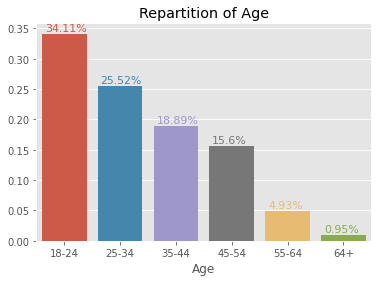

In [10]:
age_density = pd.DataFrame(df_viz.Age.value_counts(normalize=True)).reset_index()

ylabels = age_density.Age.values

fig, ax = plt.subplots()
sns.barplot(x = "index", y = "Age", data = age_density, ax=ax, order=class_age)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.35, 
            y=m+0.005, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Age")
ax.set_ylabel("")
ax.set_title("Repartition of Age")
fig.show()

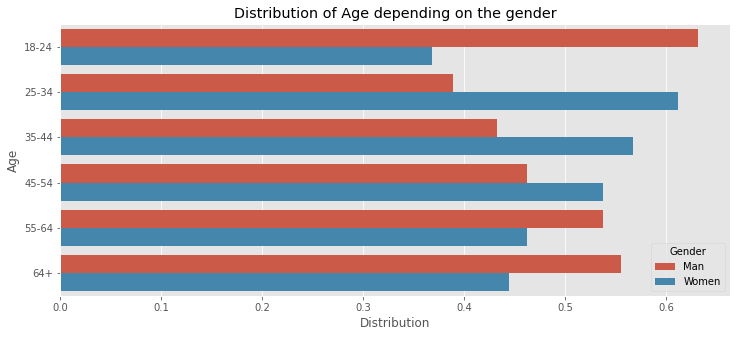

In [11]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Age"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Age", hue = "Gender", order = class_age, data = df_bar)
plt.title(f"Distribution of Age depending on the gender")
plt.show()

##### Gender
There is no gender difference, the distribution is almost perfect.

In [12]:
df.Gender.value_counts(normalize=True)

-0.48246    0.500265
 0.48246    0.499735
Name: Gender, dtype: float64

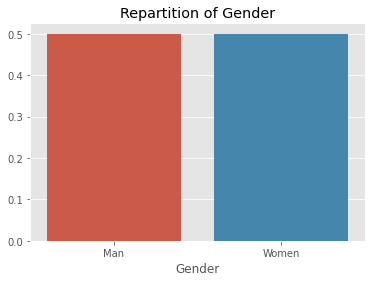

In [13]:
gender_density = pd.DataFrame(df_viz.Gender.value_counts(normalize=True)).reset_index()
fig, ax = plt.subplots()
sns.barplot(x = "index", y = "Gender", data = gender_density, ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("")
ax.set_title("Repartition of Gender")
fig.show()

Equal gender repartition

##### Education
The majority of people have been to college (86.36%).   
Women are on average more educated than men.


In [14]:
df.Education.value_counts(normalize=True)

-0.61113    0.268435
 0.45468    0.254642
 1.16365    0.150133
-0.05921    0.143236
-1.22751    0.053050
-1.73790    0.052520
 1.98437    0.047215
-1.43719    0.015915
-2.43591    0.014854
Name: Education, dtype: float64

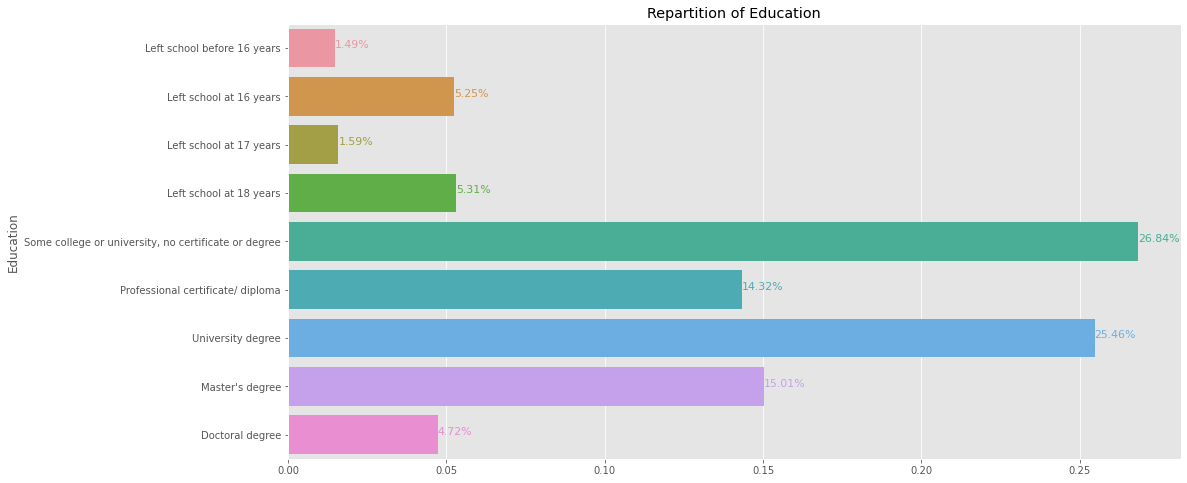

In [15]:
education_density = pd.DataFrame(df_viz.Education.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,8))
bar = sns.barplot(x = "Education", y = "index", data = education_density, ax=ax, order=class_education)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(education_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_ylabel("Education")
ax.set_title("Repartition of Education")
fig.show()

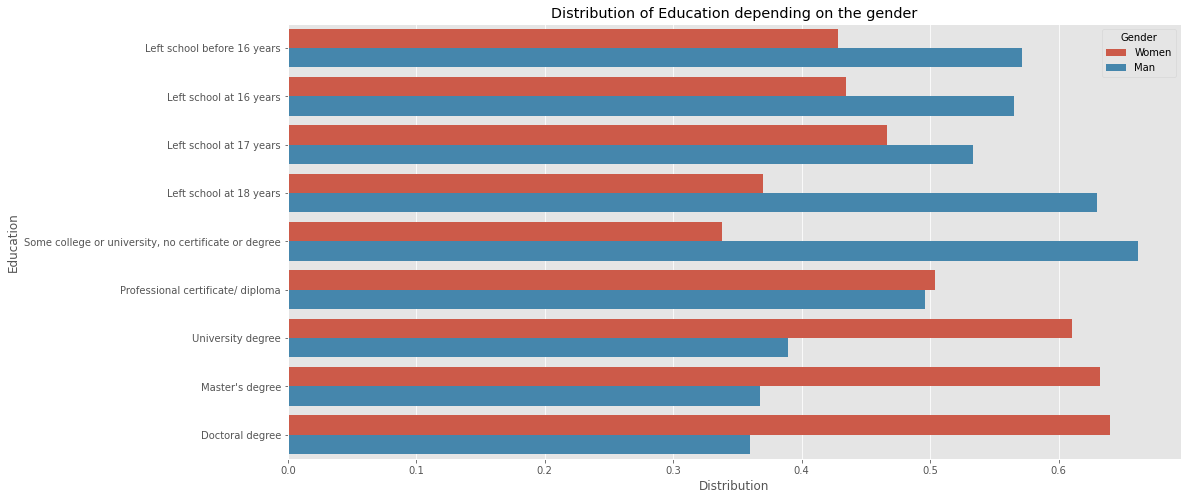

In [16]:
plt.figure(figsize=(16,8))
df_bar = pd.DataFrame(df_viz.groupby(["Education"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Education", hue = "Gender", order = class_education, data = df_bar)
plt.title(f"Distribution of Education depending on the gender")
plt.show()

##### Country
The majority of respondents are from the US and UK (84.93%).   
The majority of the Americans are men and the British are women.


In [17]:
df.Country.value_counts(normalize=True)

 0.96082    0.553846
-0.57009    0.295491
-0.28519    0.062599
 0.24923    0.046154
-0.09765    0.028647
 0.21128    0.010610
-0.46841    0.002653
Name: Country, dtype: float64

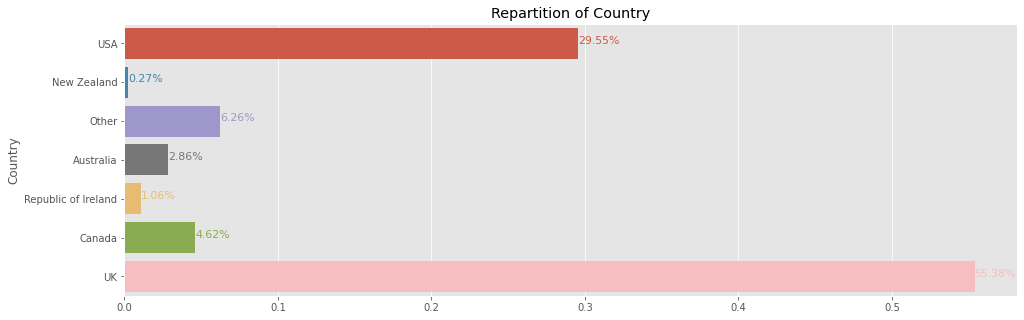

In [18]:
country_density = pd.DataFrame(df_viz.Country.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x = "Country", y = "index", data = country_density, ax=ax, order=class_country)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(country_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_ylabel("Country")
ax.set_title("Repartition of Country")
fig.show()

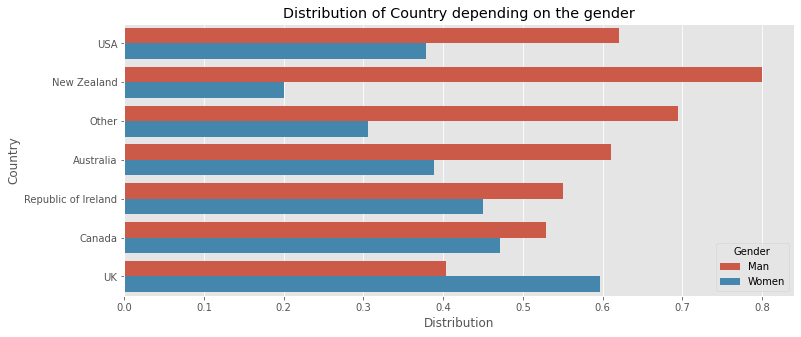

In [19]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Country"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Country", hue = "Gender", order = class_country, data = df_bar)
plt.title(f"Distribution of Country depending on the gender")
plt.show()

##### Ethnicity
An overwhelming majority of respondents are white (91.25%). So there is a lack of diversity in the survey.  
The gender repartition is equal.  
The majority of white people comes from UK.

In [20]:
df.Ethnicity.value_counts(normalize=True)

-0.31685    0.912467
 0.11440    0.033422
-1.10702    0.017507
-0.50212    0.013793
-0.22166    0.010610
 0.12600    0.010610
 1.90725    0.001592
Name: Ethnicity, dtype: float64

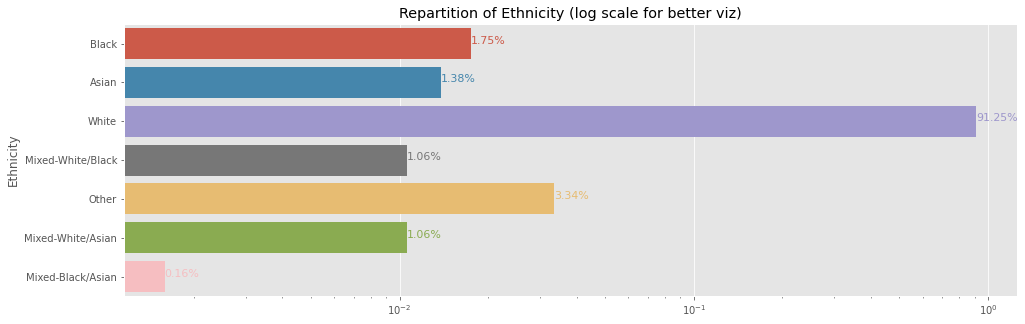

In [21]:
ethnicity_density = pd.DataFrame(df_viz.Ethnicity.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x = "Ethnicity", y = "index", data = ethnicity_density, ax=ax, order=class_Ethnicity)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(ethnicity_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_xscale('log')

ax.set_ylabel("Ethnicity")
ax.set_title("Repartition of Ethnicity (log scale for better viz)")
fig.show()

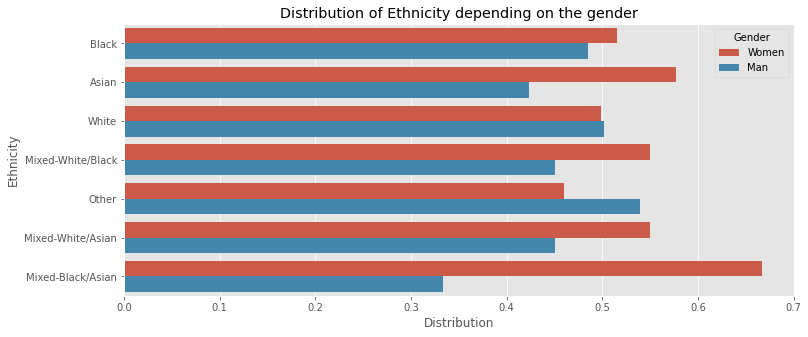

In [22]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Gender", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the gender")
plt.show()

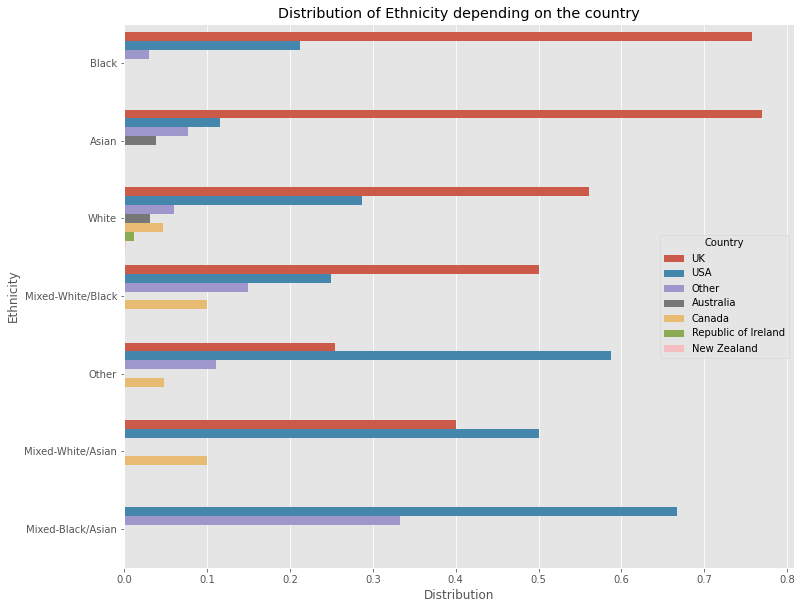

In [23]:
plt.figure(figsize=(12,10))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Country"].value_counts(normalize = True))
df_bar.rename(columns = {"Country":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Country", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the country")
plt.show()

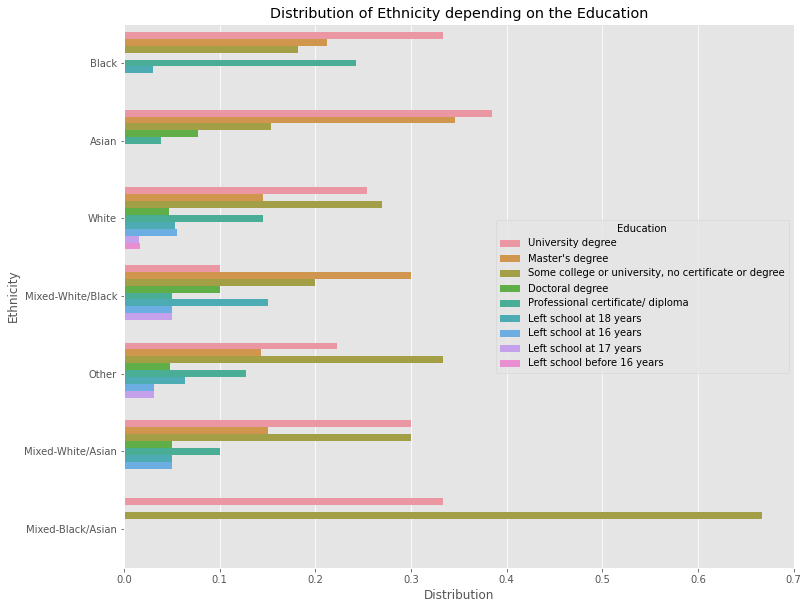

In [24]:
plt.figure(figsize=(12,10))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Education"].value_counts(normalize = True))
df_bar.rename(columns = {"Education":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Education", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the Education")
plt.show()

##### NEO-FFI-R score
The distributions of the scores follow a normal distribution.

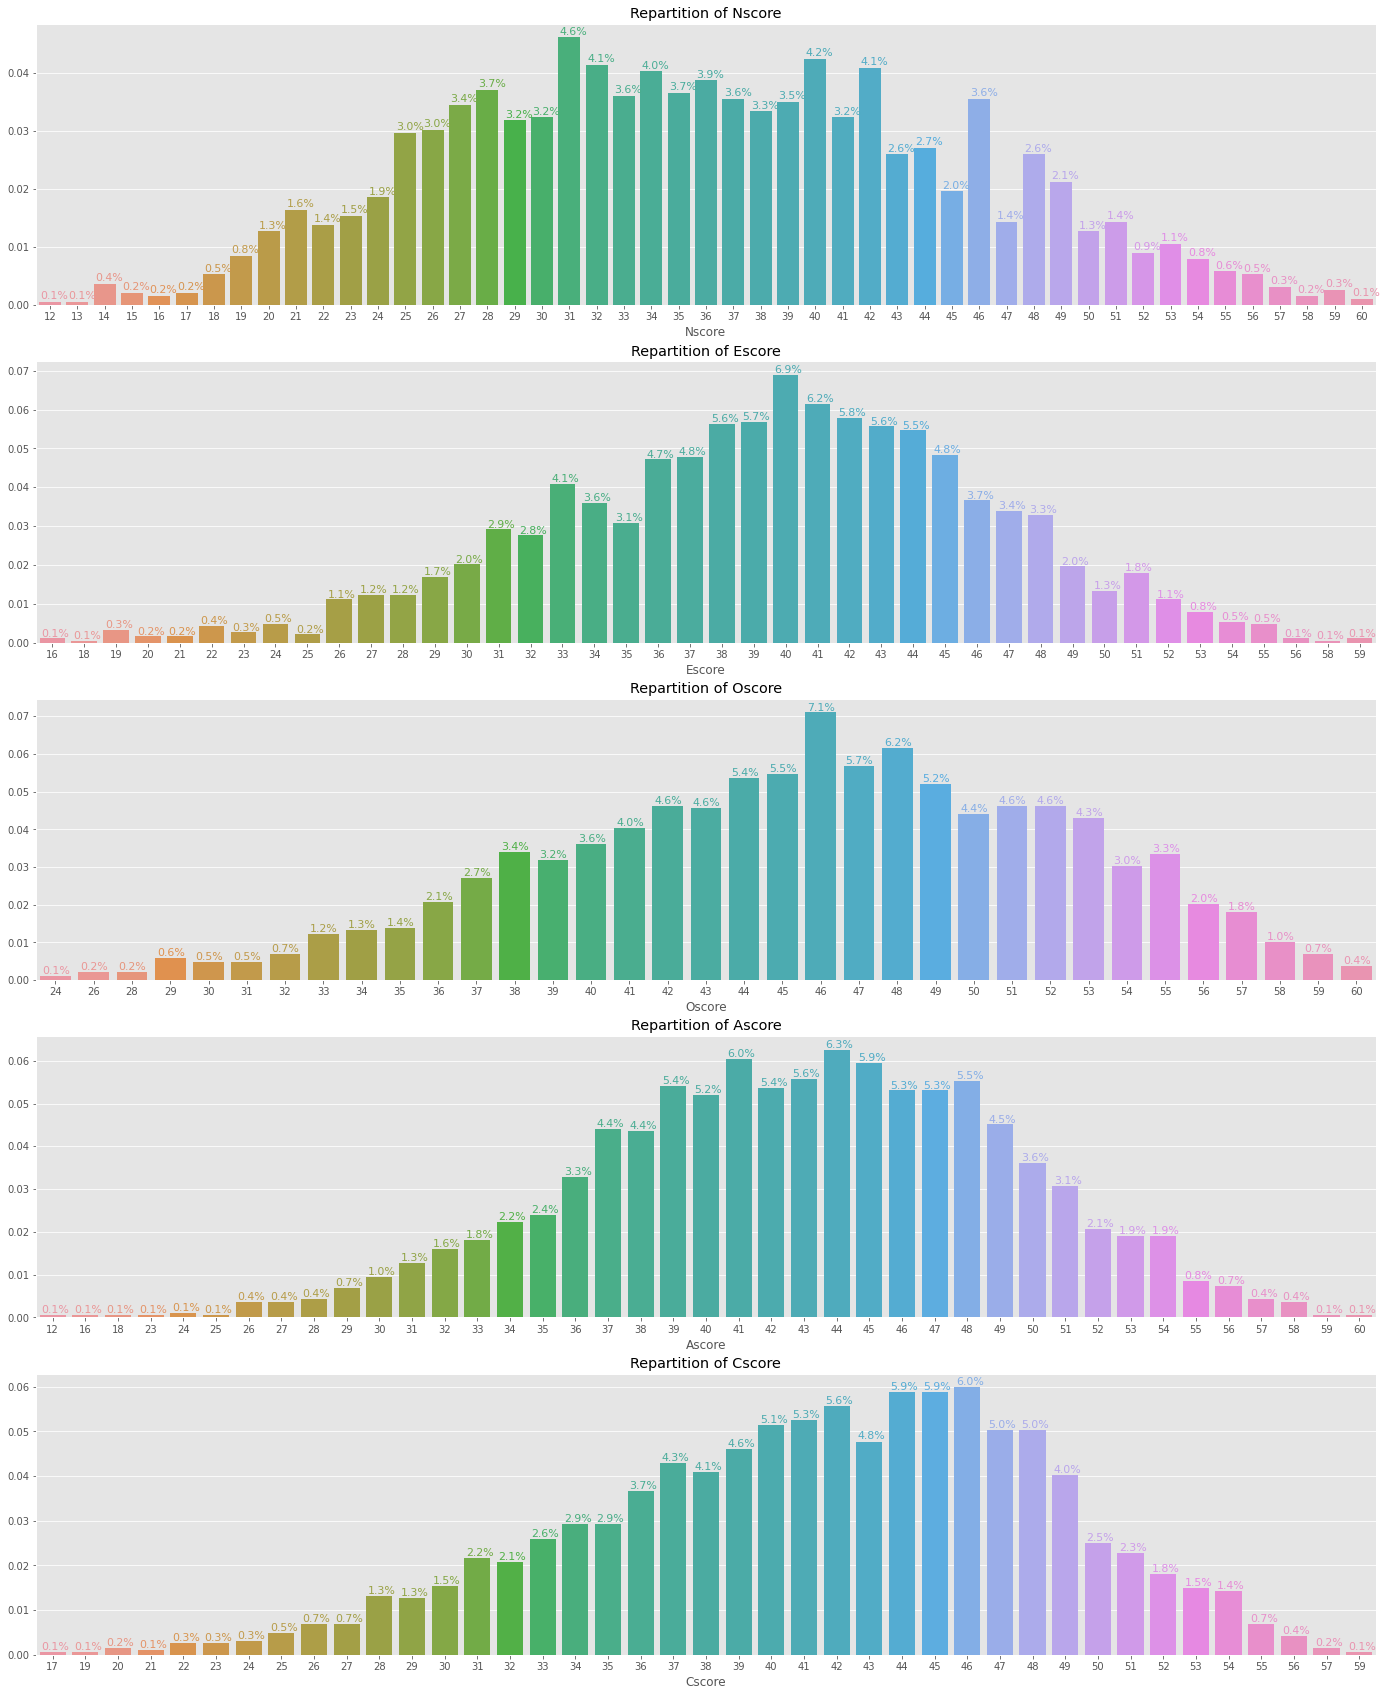

In [25]:
nrow = 5
ncol = 1
fig, axes = plt.subplots(nrow, ncol, figsize = (24,6*nrow))

for i, name in enumerate([f"{letter}score" for letter in ["N","E","O","A","C"]]):
    score_density = pd.DataFrame(df_viz[name].value_counts(normalize=True)).reset_index()
    score_density.loc[:,"index"] = score_density["index"].apply(round)

    ylabels = score_density.sort_values(by="index")[name].values

    sns.barplot(x = "index", y = name, data = score_density, ax=axes[i])

    bars = [r for r in axes[i].get_children() if type(r)==Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]] 
    for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
        axes[i].text(x=y-0.35, 
                y=m+0.0005, 
                s=str(round(m*100,1))+"%", 
                color=c,
                fontsize=11)

    axes[i].set_xlabel(name)
    axes[i].set_ylabel("")
    axes[i].set_title(f"Repartition of {name}")

fig.show()

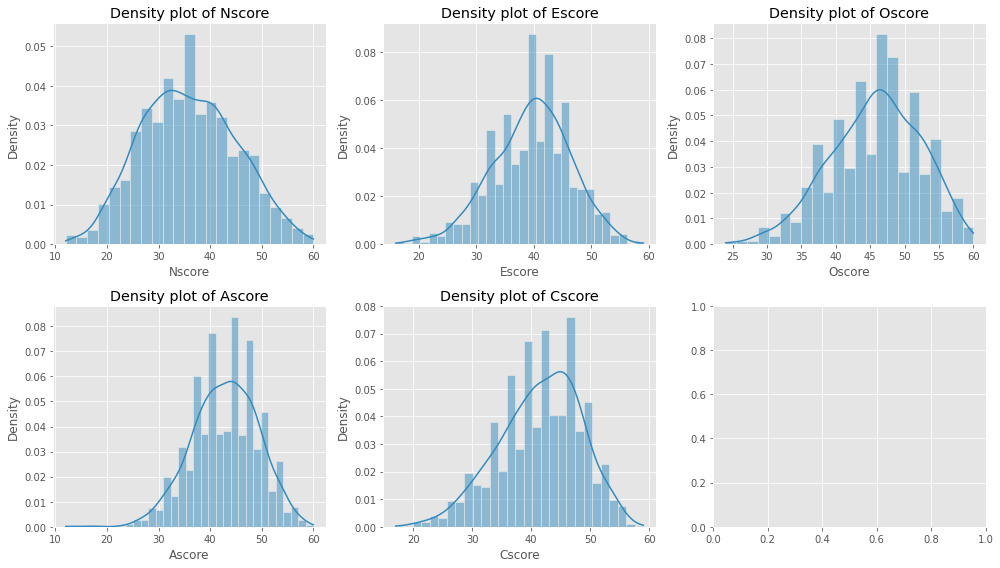

In [26]:
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize = (14,8))

for i, name in enumerate([f"{letter}score" for letter in ["N","E","O","A","C"]]):
    sns.histplot(df_viz[name],kde=True, stat="density", ax=axes[i//ncol,i%ncol])
    axes[i//ncol,i%ncol].set_title(f"Density plot of {name}")

fig.tight_layout()
fig.show()

##### BIS11
We don't have the real values associated to this test.  
If we assume that a negative value means a low impulsivity score, the repartition seems to be equal: 50.82% have a low impulsivity score.

In [27]:
df.Impulsive.value_counts(normalize=True)

-0.21712    0.188329
-0.71126    0.162865
-1.37983    0.146419
 0.19268    0.136340
 0.52975    0.114589
 0.88113    0.103448
 1.29221    0.078515
 1.86203    0.055172
-2.55524    0.010610
 2.90161    0.003714
Name: Impulsive, dtype: float64

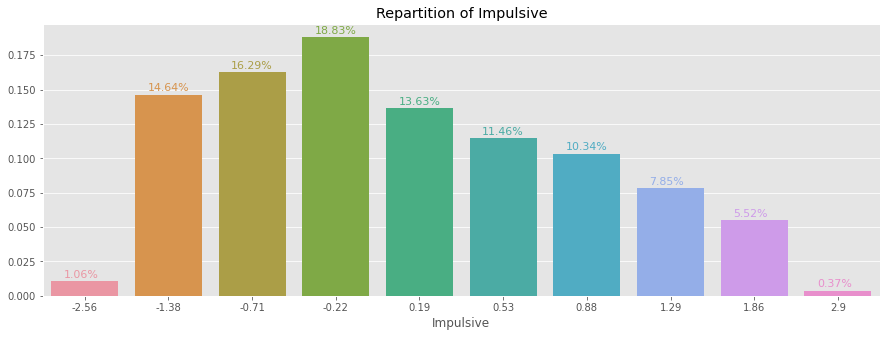

In [28]:
impulsive_density = pd.DataFrame(df_viz.Impulsive.value_counts(normalize=True)).reset_index()
impulsive_density.loc[:,"index"] = impulsive_density["index"].apply(lambda x: round(x,2))

ylabels = impulsive_density.sort_values(by="index").Impulsive.values

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = "index", y = "Impulsive", data = impulsive_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.25, 
            y=m+0.0025, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Impulsive")
ax.set_ylabel("")
ax.set_title("Repartition of Impulsive")
fig.show()

##### ImpSS
We don't have the real values associated to this test.  
If we assume that a negative value means a low score, the repartition seems to be equal: 47.38% have a low score.

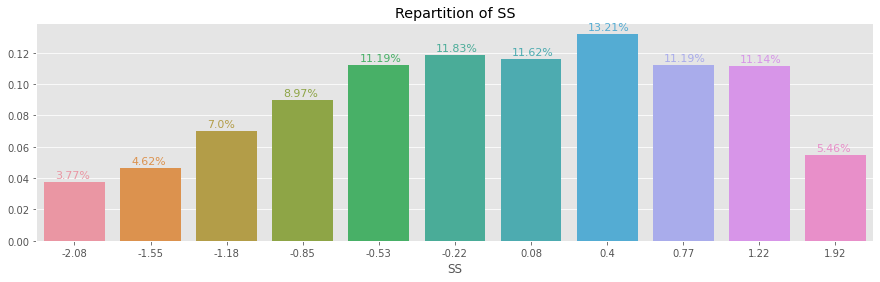

In [29]:
SS_density = pd.DataFrame(df_viz.SS.value_counts(normalize=True)).reset_index()
SS_density.loc[:,"index"] = SS_density["index"].apply(lambda x: round(x,2))

ylabels = SS_density.sort_values(by="index").SS.values

fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(x = "index", y = "SS", data = SS_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.25, 
            y=m+0.0025, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("SS")
ax.set_ylabel("")
ax.set_title("Repartition of SS")
fig.show()

#### Target

There are 19 drugs that can be divided in the following categories:  
**Common**
- Caff
- Choc

**Substances diverted into drugs**
- VSA: glue sniffing
- Benzos: psychoactive drugs, such as antidepressants, anxiolytics, muscle relaxants
- Ketamine: anesthésiant
- Mushrooms

**Legal**
- Alcohol
- Legalh
- Nicotine

**Illegal**
- Amphet
- Amyl
- Cannabis
- Coke
- Crack
- Esctasy
- Heroin
- LSD
- Meth

**Fictional**
- Semer

**Repartition for each drugs of all classes**
1. Drugs that most people have used (<5% never used) 
  - Alcohol
  - Caff
  - Choc
2. Drugs that at least 20% people never used it (<20% never used)
  - Nicotine
  - Cannabis
3. Drugs that at least 50% people never used it (<50% never used)
  - Amphet
  - Benzos
  - Coke
  - Esctasy
  - Mushrooms
  - LSD
4. Drugs that most people never used (>70% never used)
  - Amyl
  - Crack
  - Heroin
  - Ketamine
  - Meth
  - Semer
  - VSA

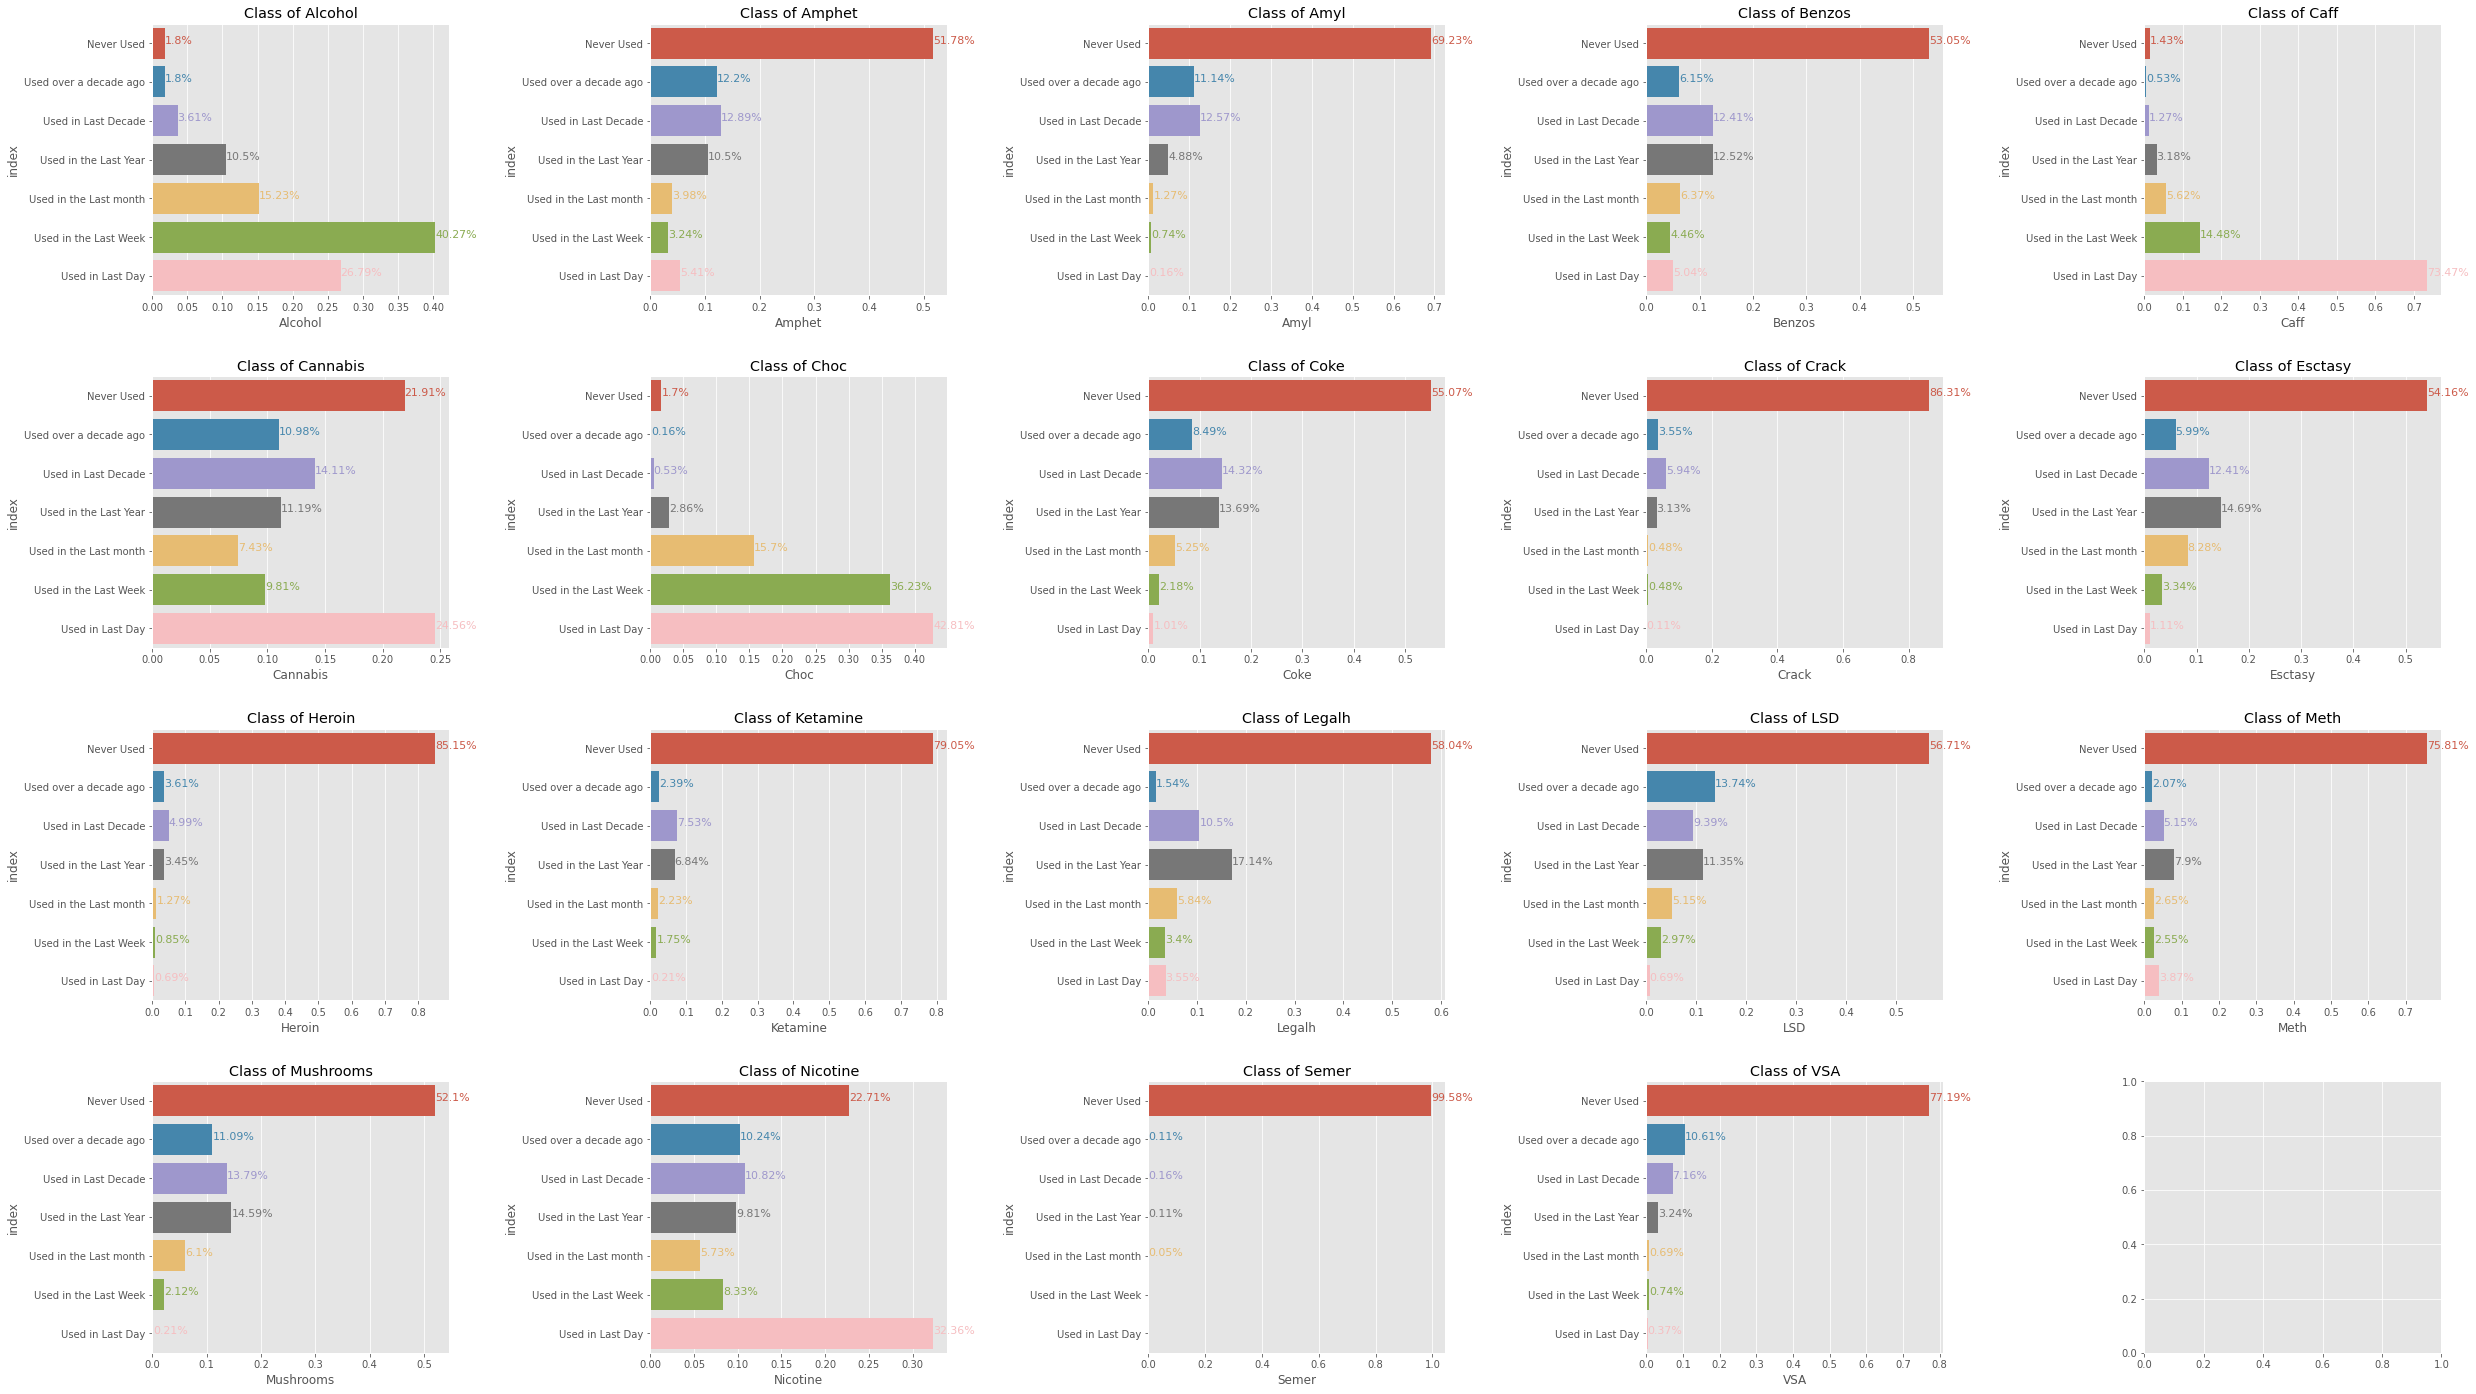

In [30]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(35,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_viz.iloc[:,13+i].value_counts(normalize=True)).reset_index()
        sns.barplot(y = "index", x = df_viz.iloc[:,13:].columns[i], data = drug_density, ax=axis[r,c], order=class_drugs)
        ylabels = [axis[r,c].patches[i].get_bbox().get_points()[1][0] for i in range(drug_density.shape[0])]

        bars = [r for r in axis[r,c].get_children() if type(r)==Rectangle]
        colors = [c.get_facecolor() for c in bars[:-1]] 
        for y, m, color in zip(np.arange(len(ylabels)), ylabels, colors):
            axis[r,c].text(x=m, 
                    y=y, 
                    s=str(round(m*100,2))+"%", 
                    color=color,
                    fontsize=11)

        axis[r,c].set_title(f"Class of {df_viz.iloc[:,13:].columns[i]}")
        i+=1
        if i == 19:
          break
fig.tight_layout(pad=3.0)
fig.show()

**Repartition for each drugs of classes Used and not used**

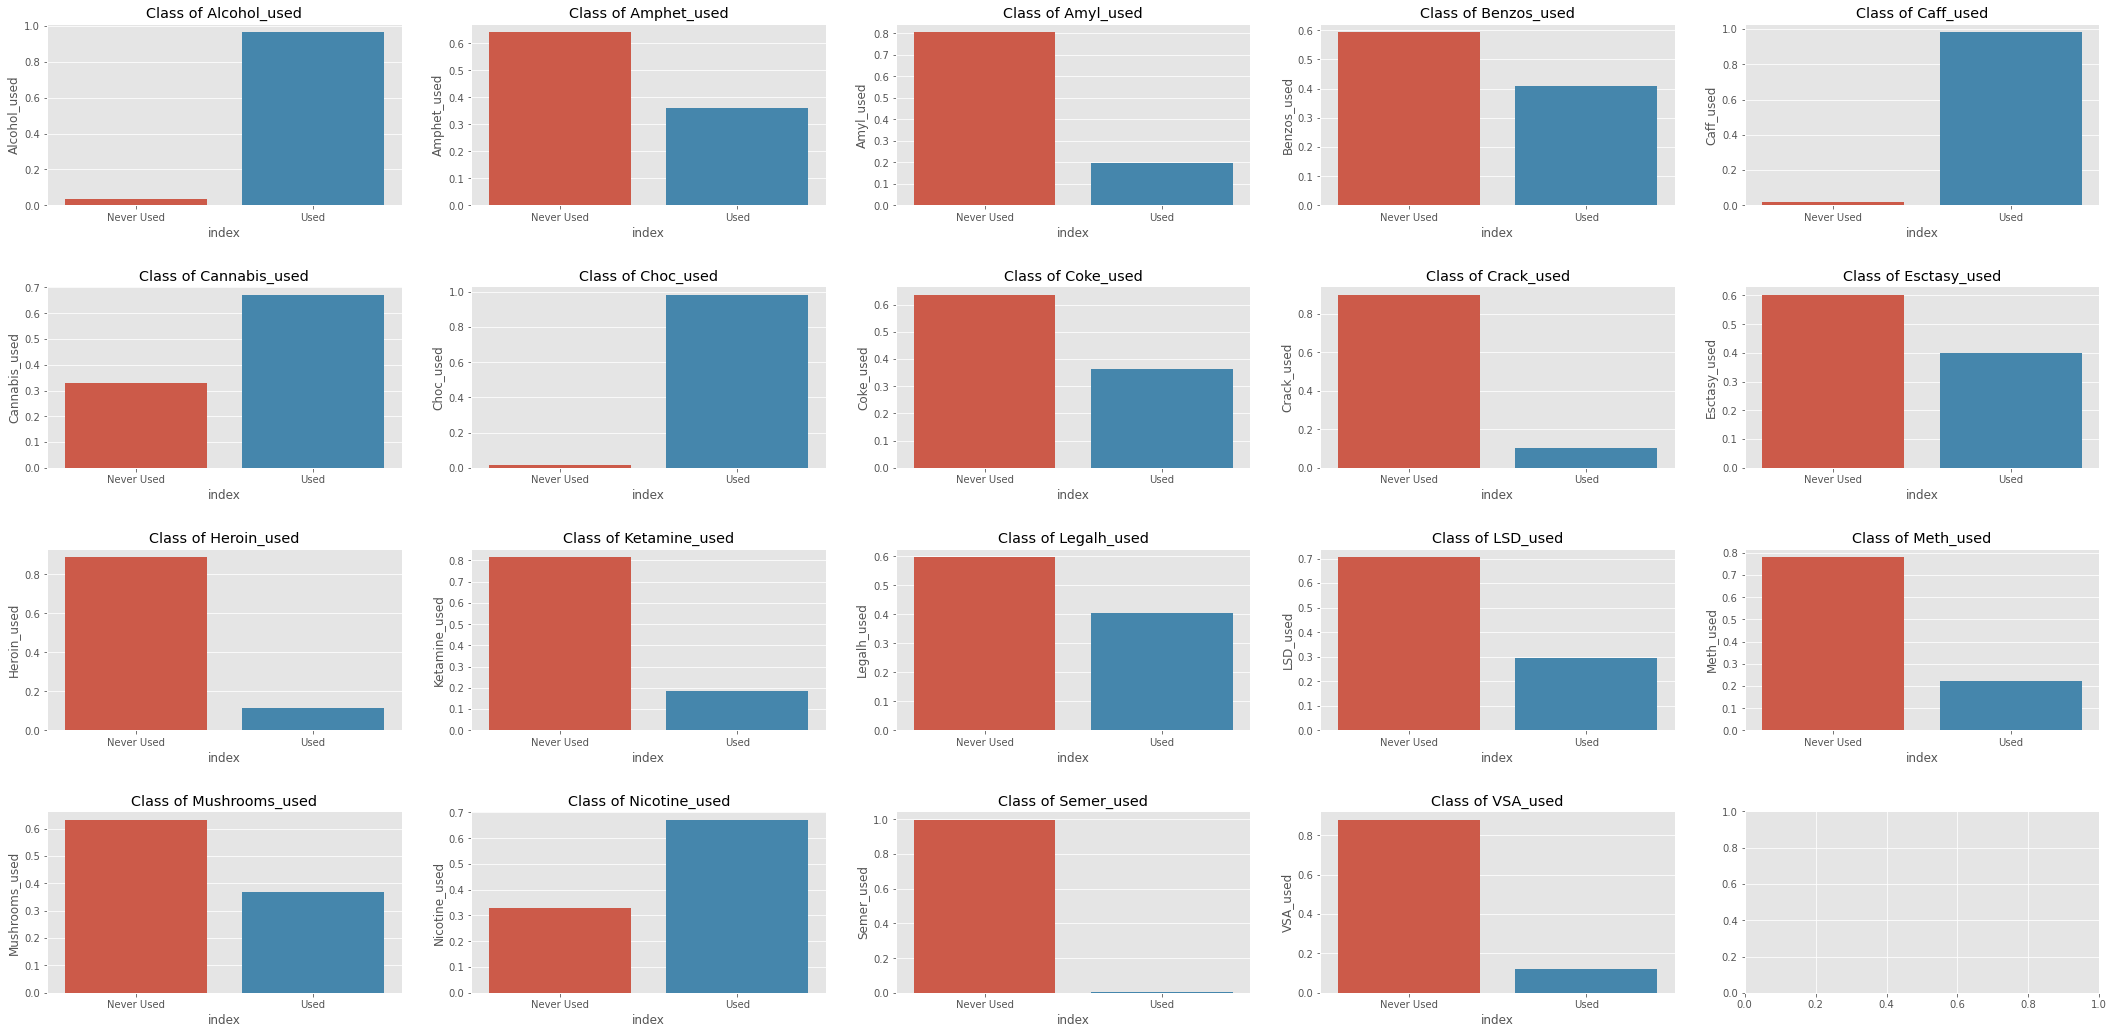

In [31]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_viz.iloc[:,32+i].value_counts(normalize=True)).reset_index()
        sns.barplot(x = "index", y = df_viz.iloc[:,32:].columns[i], data = drug_density, ax=axis[r,c], order=["Never Used", "Used"])
        axis[r,c].set_title(f"Class of {df_viz.iloc[:,32:].columns[i]}")
        axis[r,c].tick_params(axis='x')
        i+=1
        if i == 19:
          break
fig.tight_layout(pad=3.0)
fig.show()

We can observe that:
- The drug Semer has not interest for us
- Common drugs such has Choc, caff and alcohol are most of the time been consumed by people
- There is a problem of imbalanced data

Let's see the number of drugs used by person

In [32]:
nb_drugs = df_viz.iloc[:,32:].apply(pd.Series.value_counts, axis=1).fillna(0)
df_viz["Number of drug used"] = nb_drugs.Used

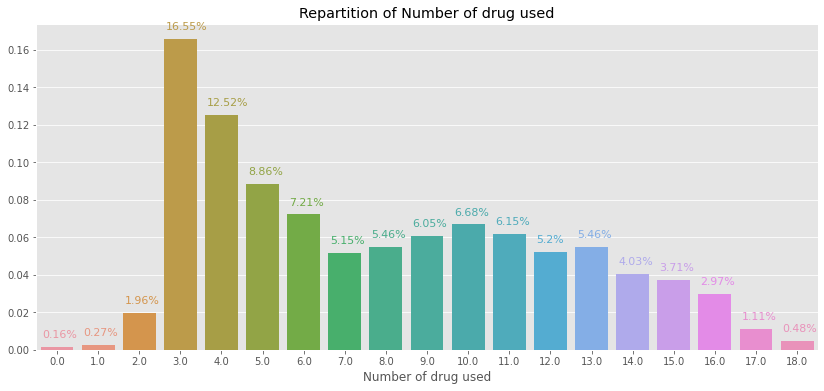

In [33]:
nb_drugs_density = pd.DataFrame(df_viz["Number of drug used"].value_counts(normalize=True)).reset_index()

ylabels = nb_drugs_density.sort_values(by="index")["Number of drug used"].values

fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = "index", y = "Number of drug used", data = nb_drugs_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.35, 
            y=m+0.005, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Number of drug used")
ax.set_ylabel("")
ax.set_title("Repartition of Number of drug used")
fig.show()

We can divide the dataset into two groups:
- People using few drugs (0-6)
- people using a lot of drugs (7+)

**Our Assumptions about features' influence on the target**     
- **HIGH Neuroticism** can lead people to have negative thoughts and then use drugs as a way to feel better.
- **LOW Extraversion:** we cannot really assume that there is a correlation with this variable appart from the fact that introverts could take more drugs than extraverts but it's not always the case.
- **HIGH Openness:** we can infer that people with high openness could be tempt to test drugs
- **LOW Agreeableness:** maybe, people with low agreebleness could be more isolate and could use drugs
- **LOW Conscientiousness:** people less reliable could be tempt to use drugs
- **HIGH Impulsivity:** we can infer that people with high impulsivity could be tempt to take more drugs
- **HIGH Impulsivity and Sensation Seekness:** we can infer that people with high score could be tempt to take more drugs

We will verify these assumptions with the relationships between drug used and features

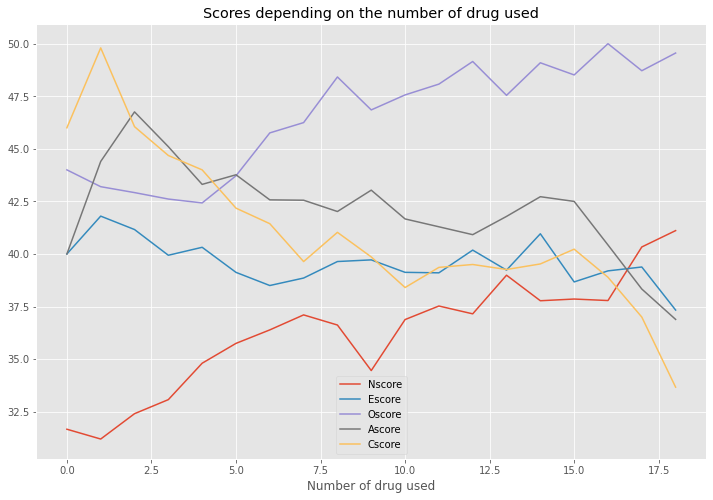

In [34]:
scores_drugs = df_viz.groupby("Number of drug used")[["Nscore","Escore","Oscore","Ascore","Cscore"]].mean()
scores_drugs.plot(figsize=(12,8))
plt.title("Scores depending on the number of drug used")
plt.show()

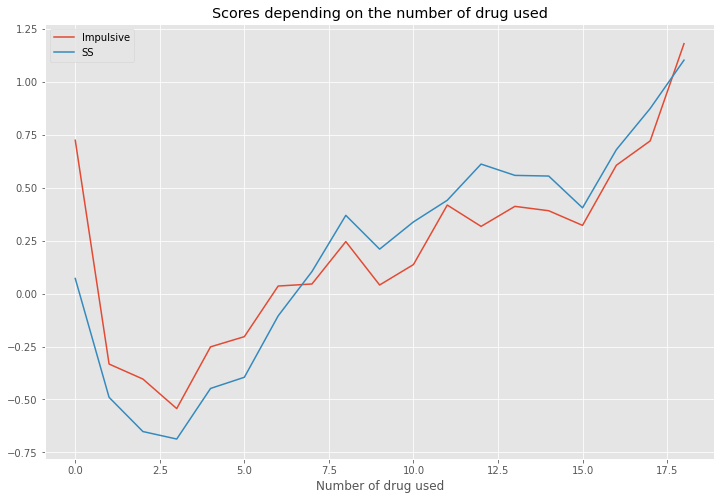

In [35]:
other_test_drugs = df_viz.groupby("Number of drug used")[["Impulsive","SS"]].mean()
other_test_drugs.plot(figsize=(12,8))
plt.title("Scores depending on the number of drug used")
plt.show()

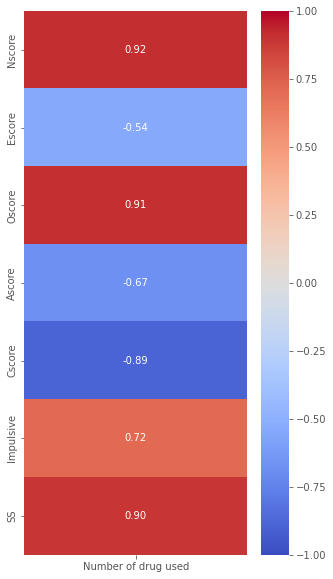

In [36]:
all_scores_drugs = df_viz.groupby("Number of drug used")[["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]].mean()
plt.figure(figsize=(5,10))
sns.heatmap(pd.DataFrame(all_scores_drugs.reset_index().corr().iloc[1:,0]),annot=True,fmt='.2f',cmap='coolwarm',vmax=1.0,vmin=-1.0)
plt.show()

Our assumptions seems to be true

<a name="missing_values">

### Missing values

In [37]:
df.isna().sum()/df.shape[0]

ID           0.0
Age          0.0
Gender       0.0
Education    0.0
Country      0.0
Ethnicity    0.0
Nscore       0.0
Escore       0.0
Oscore       0.0
Ascore       0.0
Cscore       0.0
Impulsive    0.0
SS           0.0
Alcohol      0.0
Amphet       0.0
Amyl         0.0
Benzos       0.0
Caff         0.0
Cannabis     0.0
Choc         0.0
Coke         0.0
Crack        0.0
Esctasy      0.0
Heroin       0.0
Ketamine     0.0
Legalh       0.0
LSD          0.0
Meth         0.0
Mushrooms    0.0
Nicotine     0.0
Semer        0.0
VSA          0.0
dtype: float64

There is no missing value

<a name="relationships">

### Relationships


#### Between Features
**Highest correlations:**
- Personnality test
  - Sensation seeking and Impulsiveness: r = 0.62
  - Sensation seeking and Openness to experience: r = 0.42
  - Extraversion and Neuroticism: r = -0.43
  - Neuroticism and Conscientiousness: r = -0.39

  It seems that:
  - Impulsive, SS and Oscore are positively intercorrelated
  - Impulsive and Cscore are negatively intercorrelated
  - Nscore is negatively correlated with Escore and Cscore
- Demographic informations
  - Age and country seems to be correlated
  - ID is correlated with variables but there is no interest to take into account this information
- Both
  - Country is negatively correlated to Oscore and Impulsive
  - Age is negatively correlated to SS

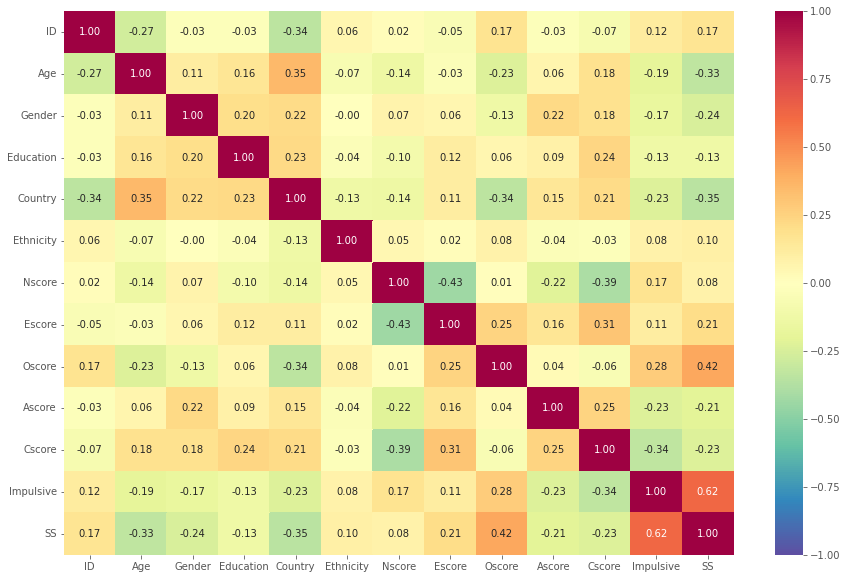

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

#### Features/Targets

In [39]:
df2 = df.copy(deep=True)
df2.iloc[:,13:] = df2.iloc[:,13:].replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])

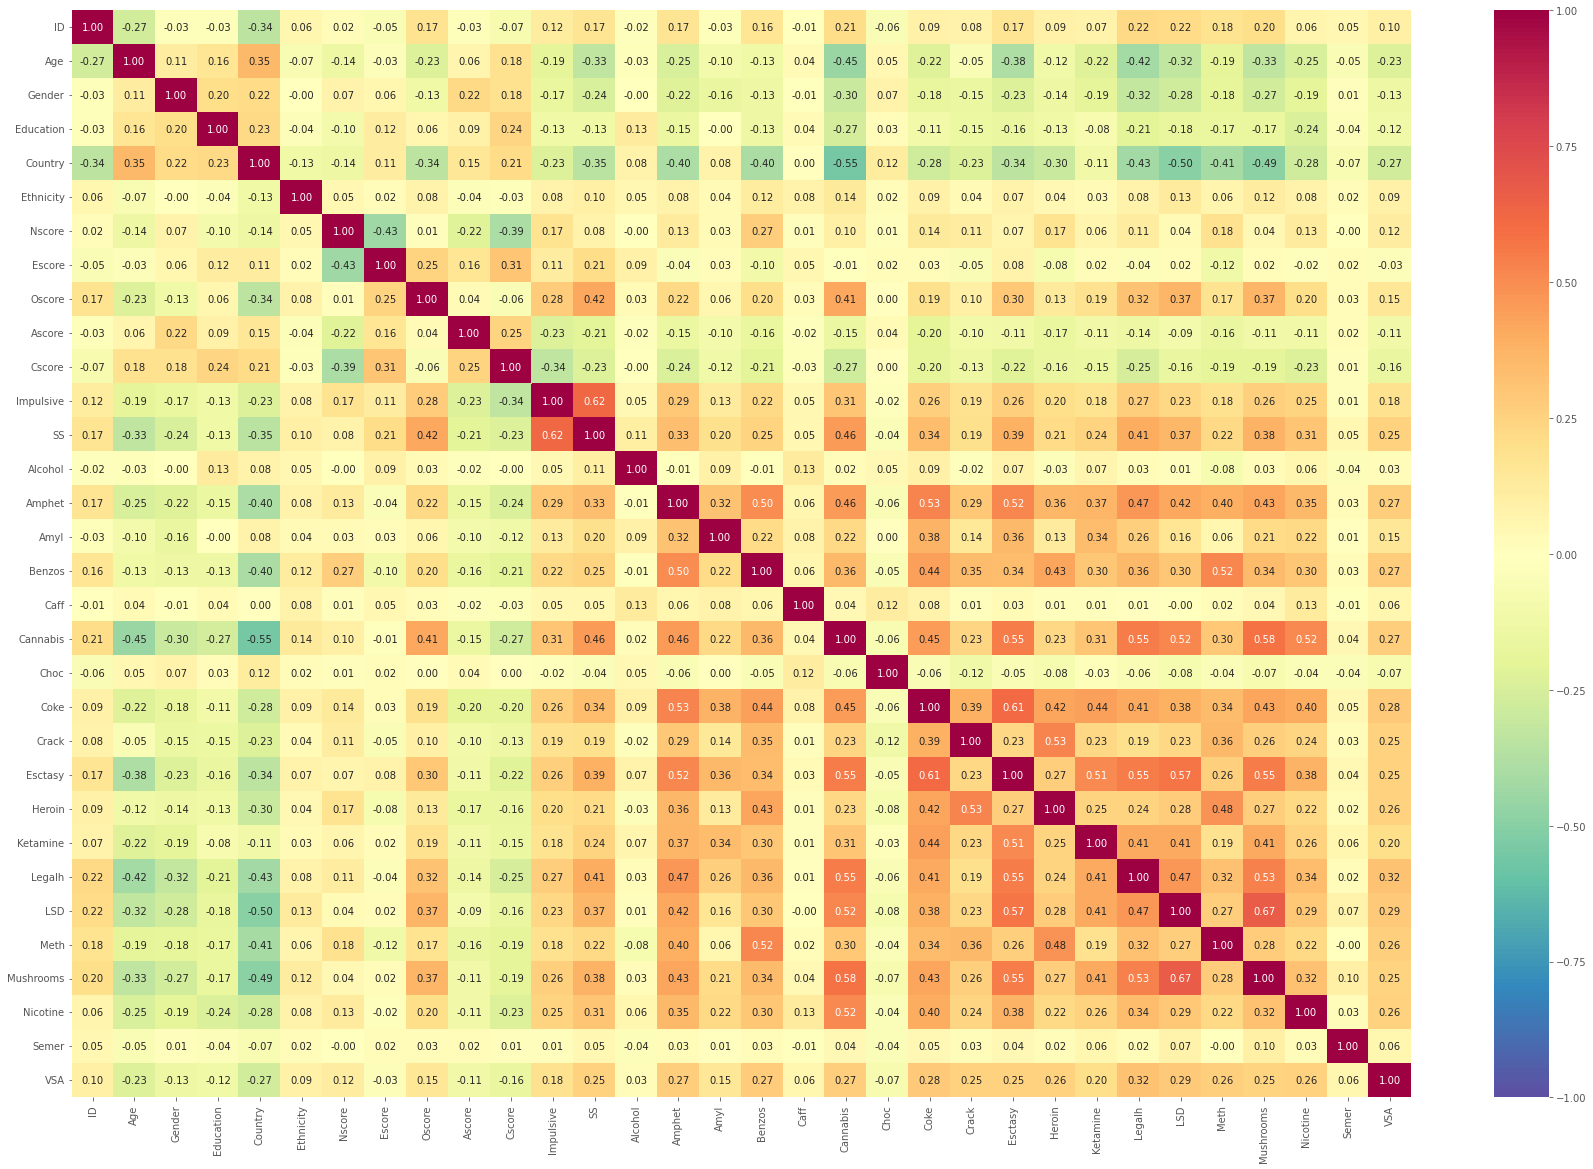

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

Let's now calculate the statistic to use at least one drug and recompute correlation matrix

**Our Assumptions**     
- ***HIGH Neuroticism*** can lead people to have negative thoughts and then use drugs as a way to feel better.
- **LOW Extraversion:** we cannot really assume that there is a correlation with this variable appart from the fact that introverts could take more drugs than extraverts but it's not always the case.
- **HIGH Openness:** we can infer that people with high openness could be tempt to test drugs
- **LOW Agreeableness:** maybe, people with low agreebleness could be more isolate and could use drugs
- **LOW Conscientiousness:** people less reliable could be tempt to use drugs


We will verify these assumptions with the relationships between drug used and features

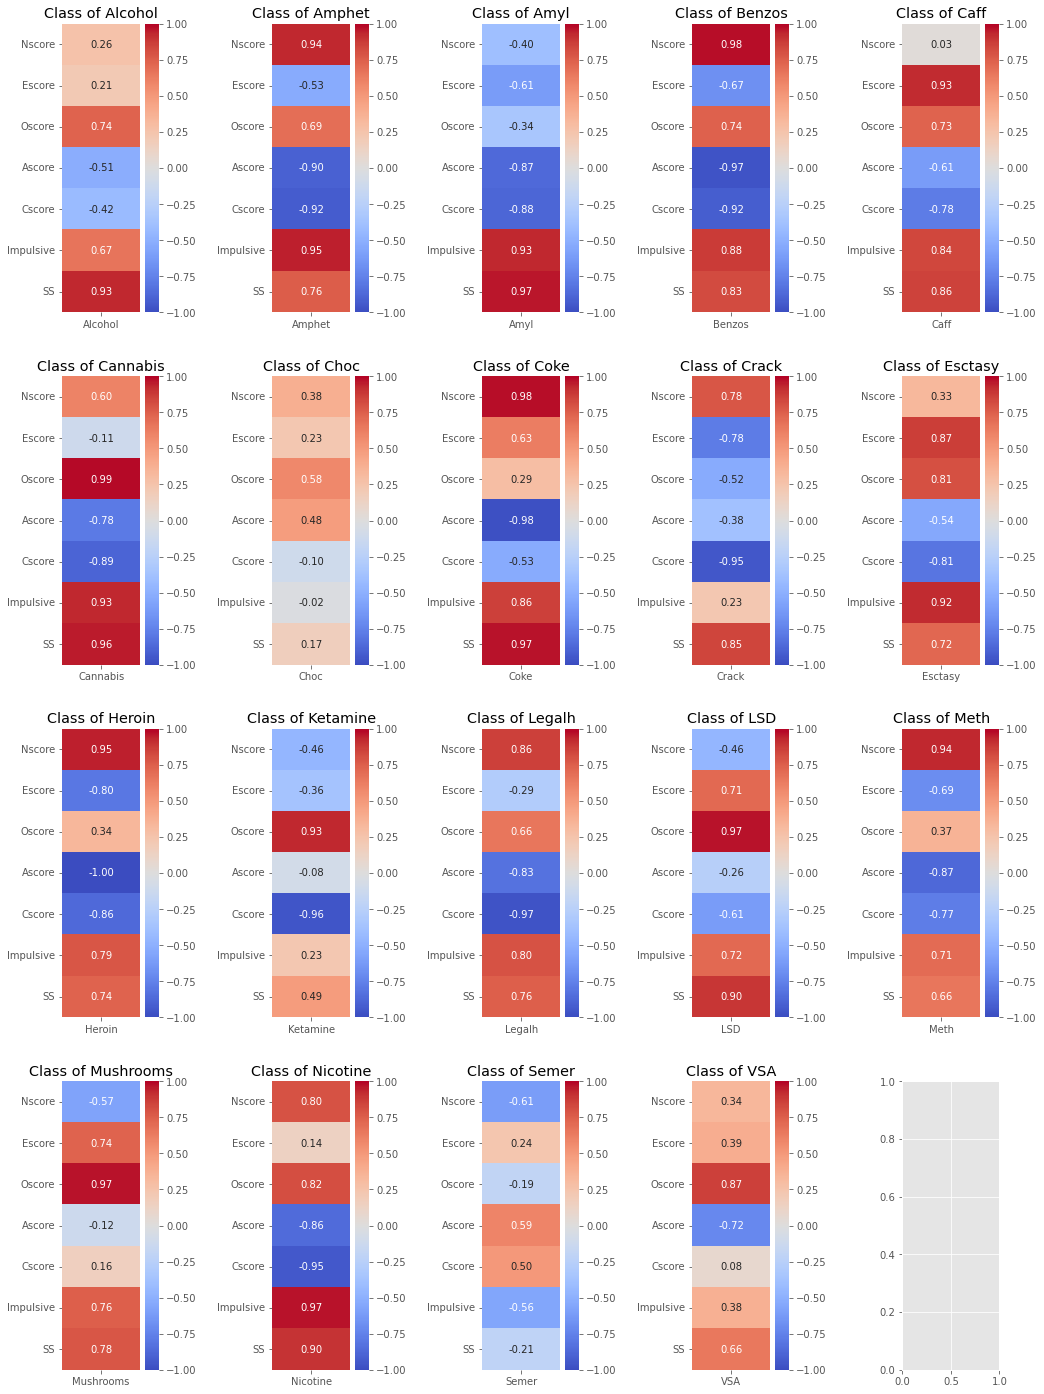

In [41]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(15,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            all_scores_drugs = df2.groupby(df2.columns[i+13])[["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]].mean()
            sns.heatmap(pd.DataFrame(all_scores_drugs.reset_index().corr().iloc[1:,0]),annot=True,fmt='.2f',cmap='coolwarm',vmax=1.0,vmin=-1.0, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df2.columns[13+i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Age - Drug used

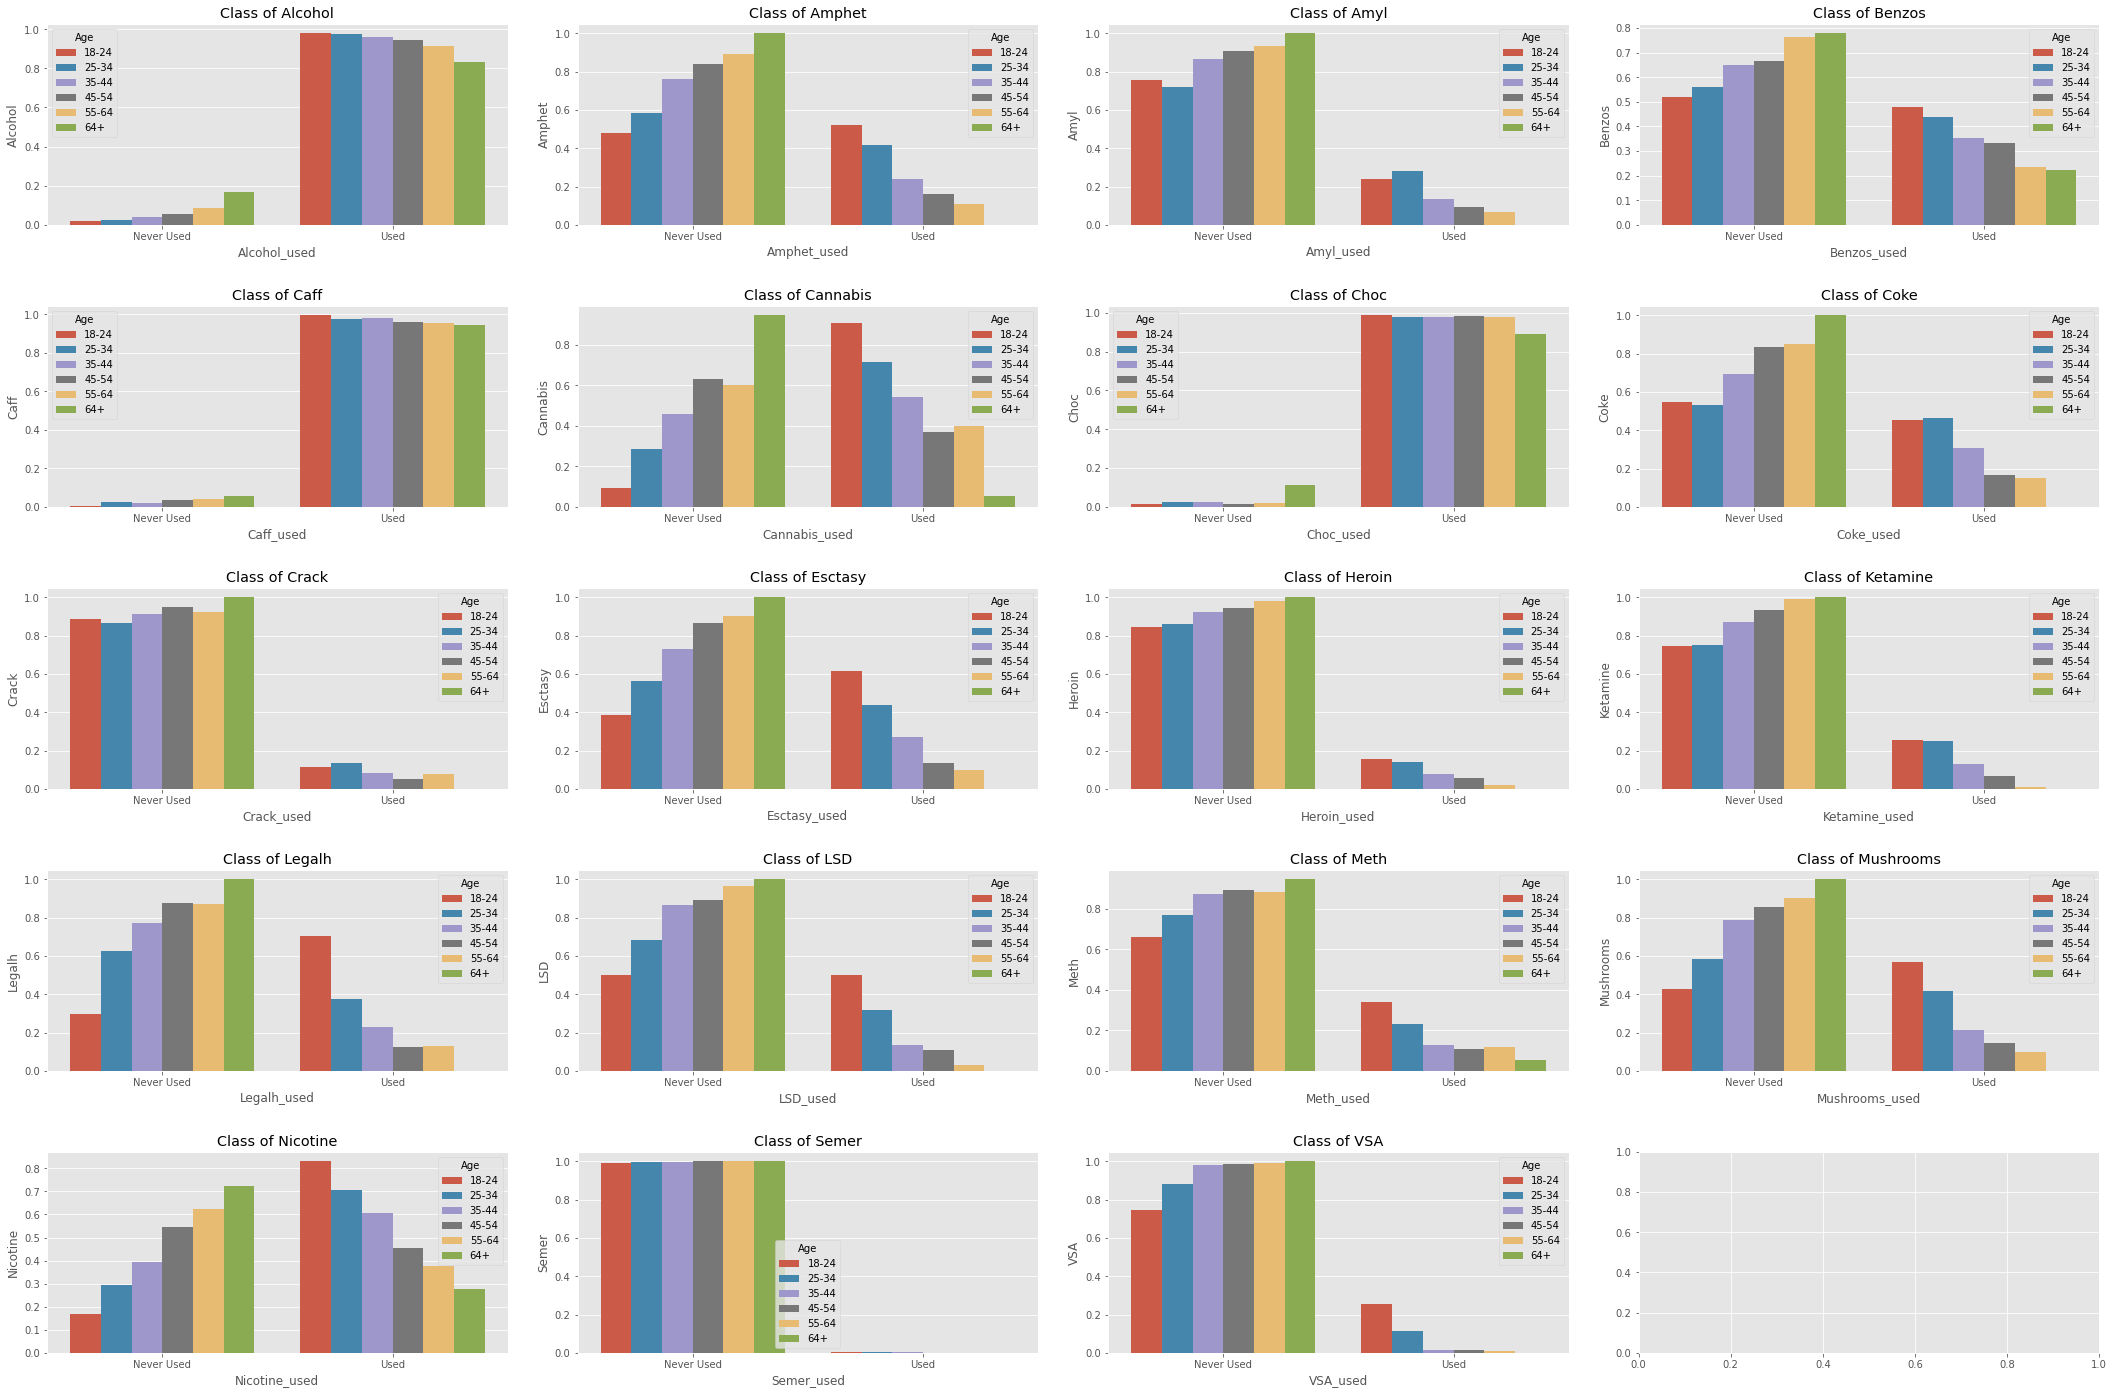

In [42]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Age"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Age", data = df_bar, order=["Never Used","Used"], ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Gender - Drug used

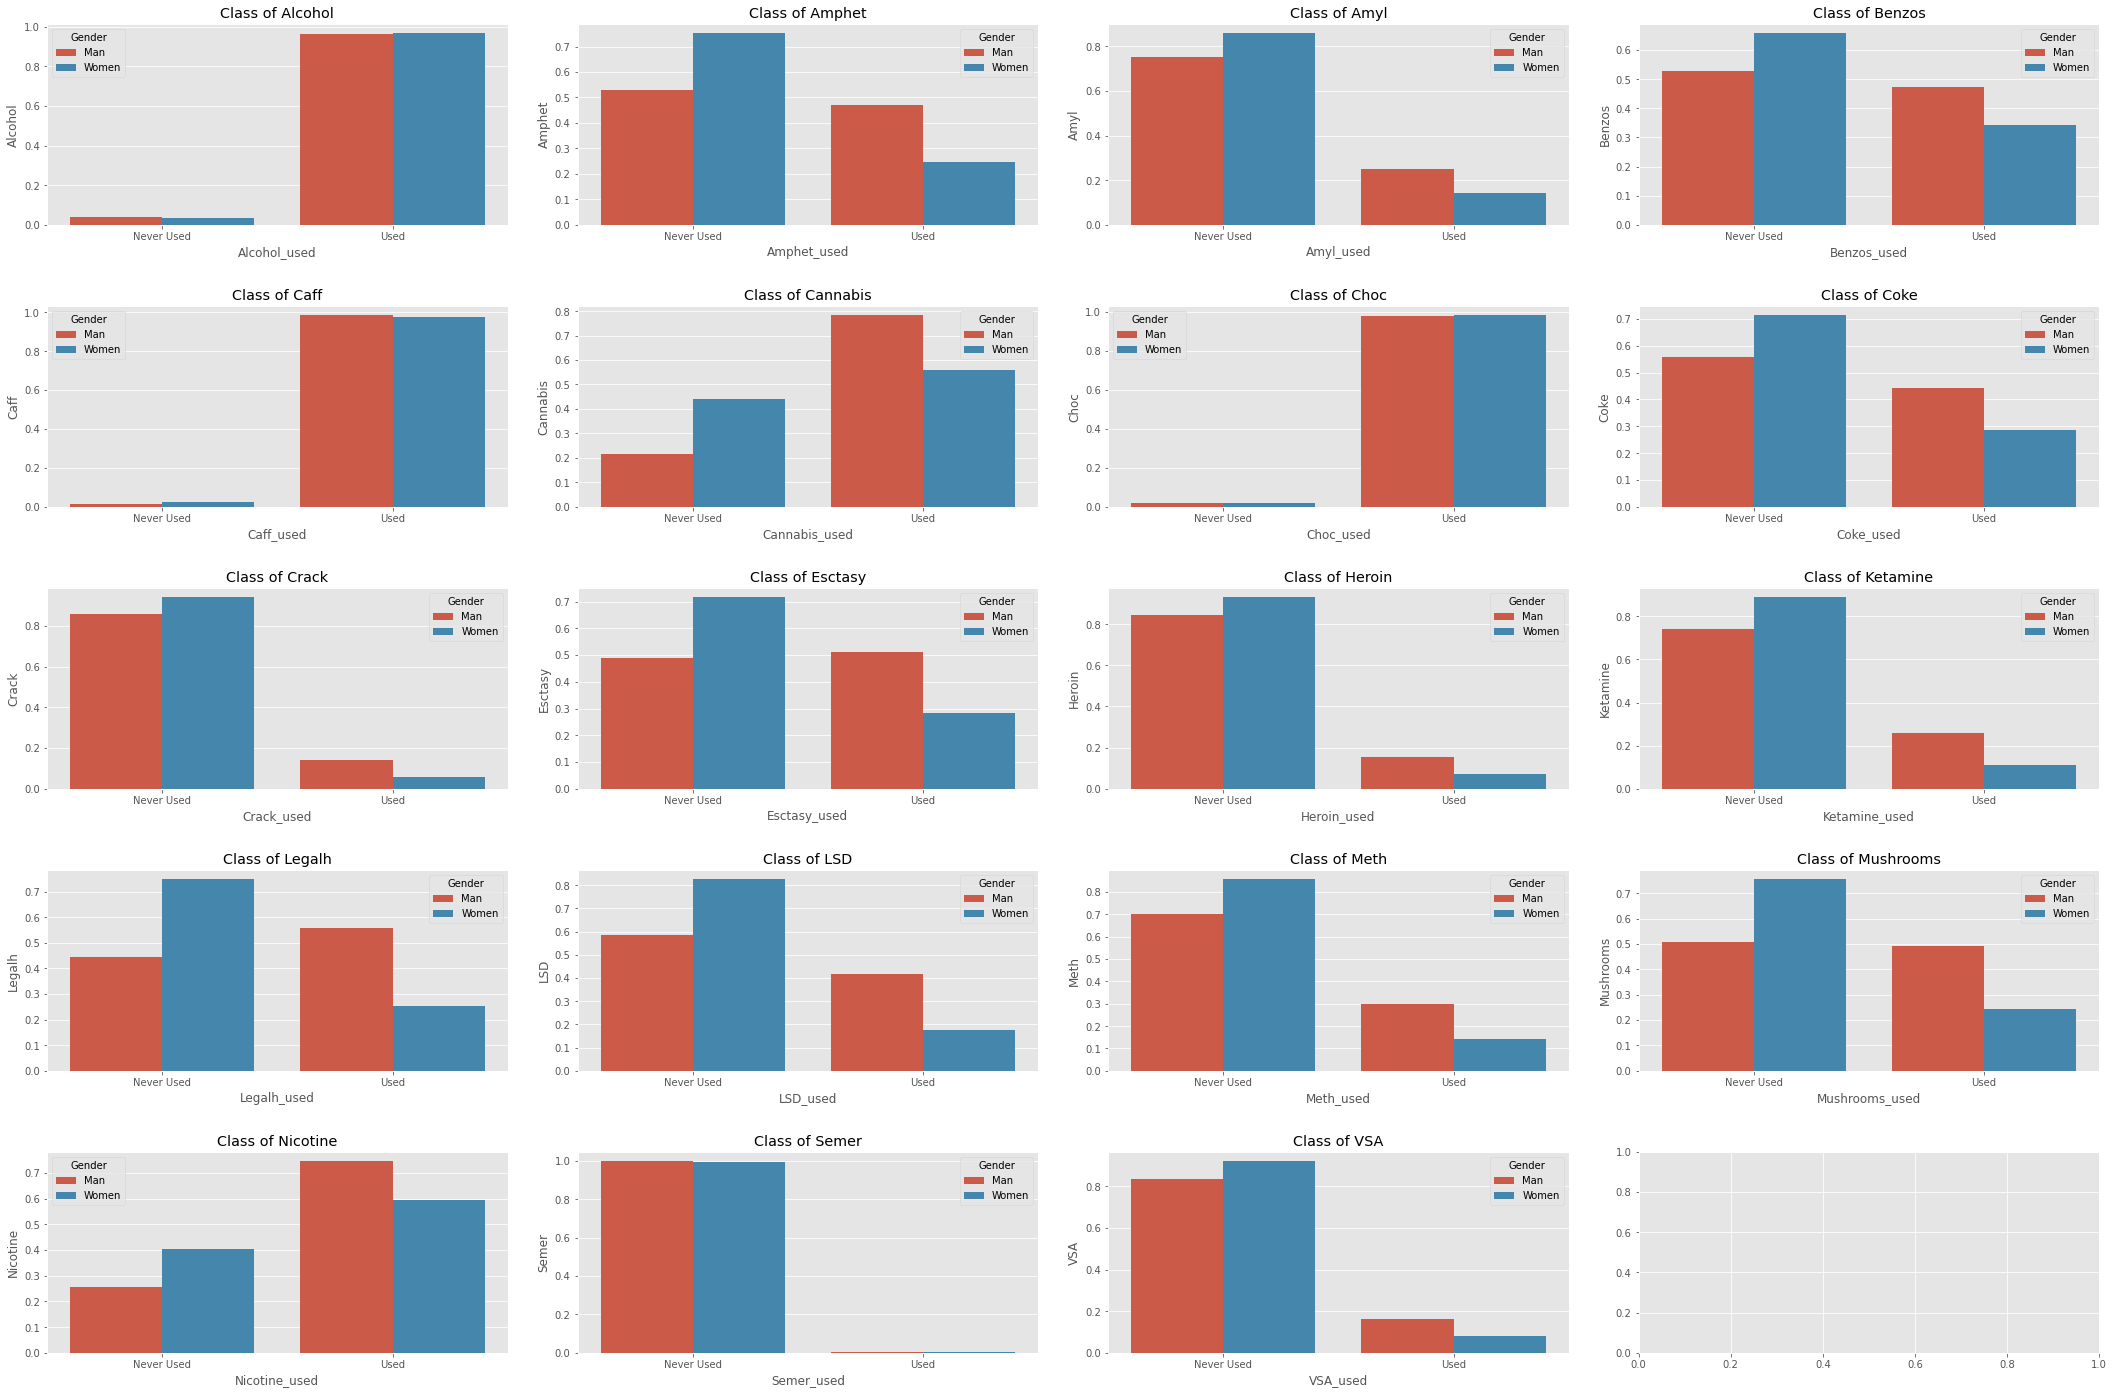

In [43]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Gender"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Gender", data = df_bar, order = ["Never Used","Used"], ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Education - Drug used

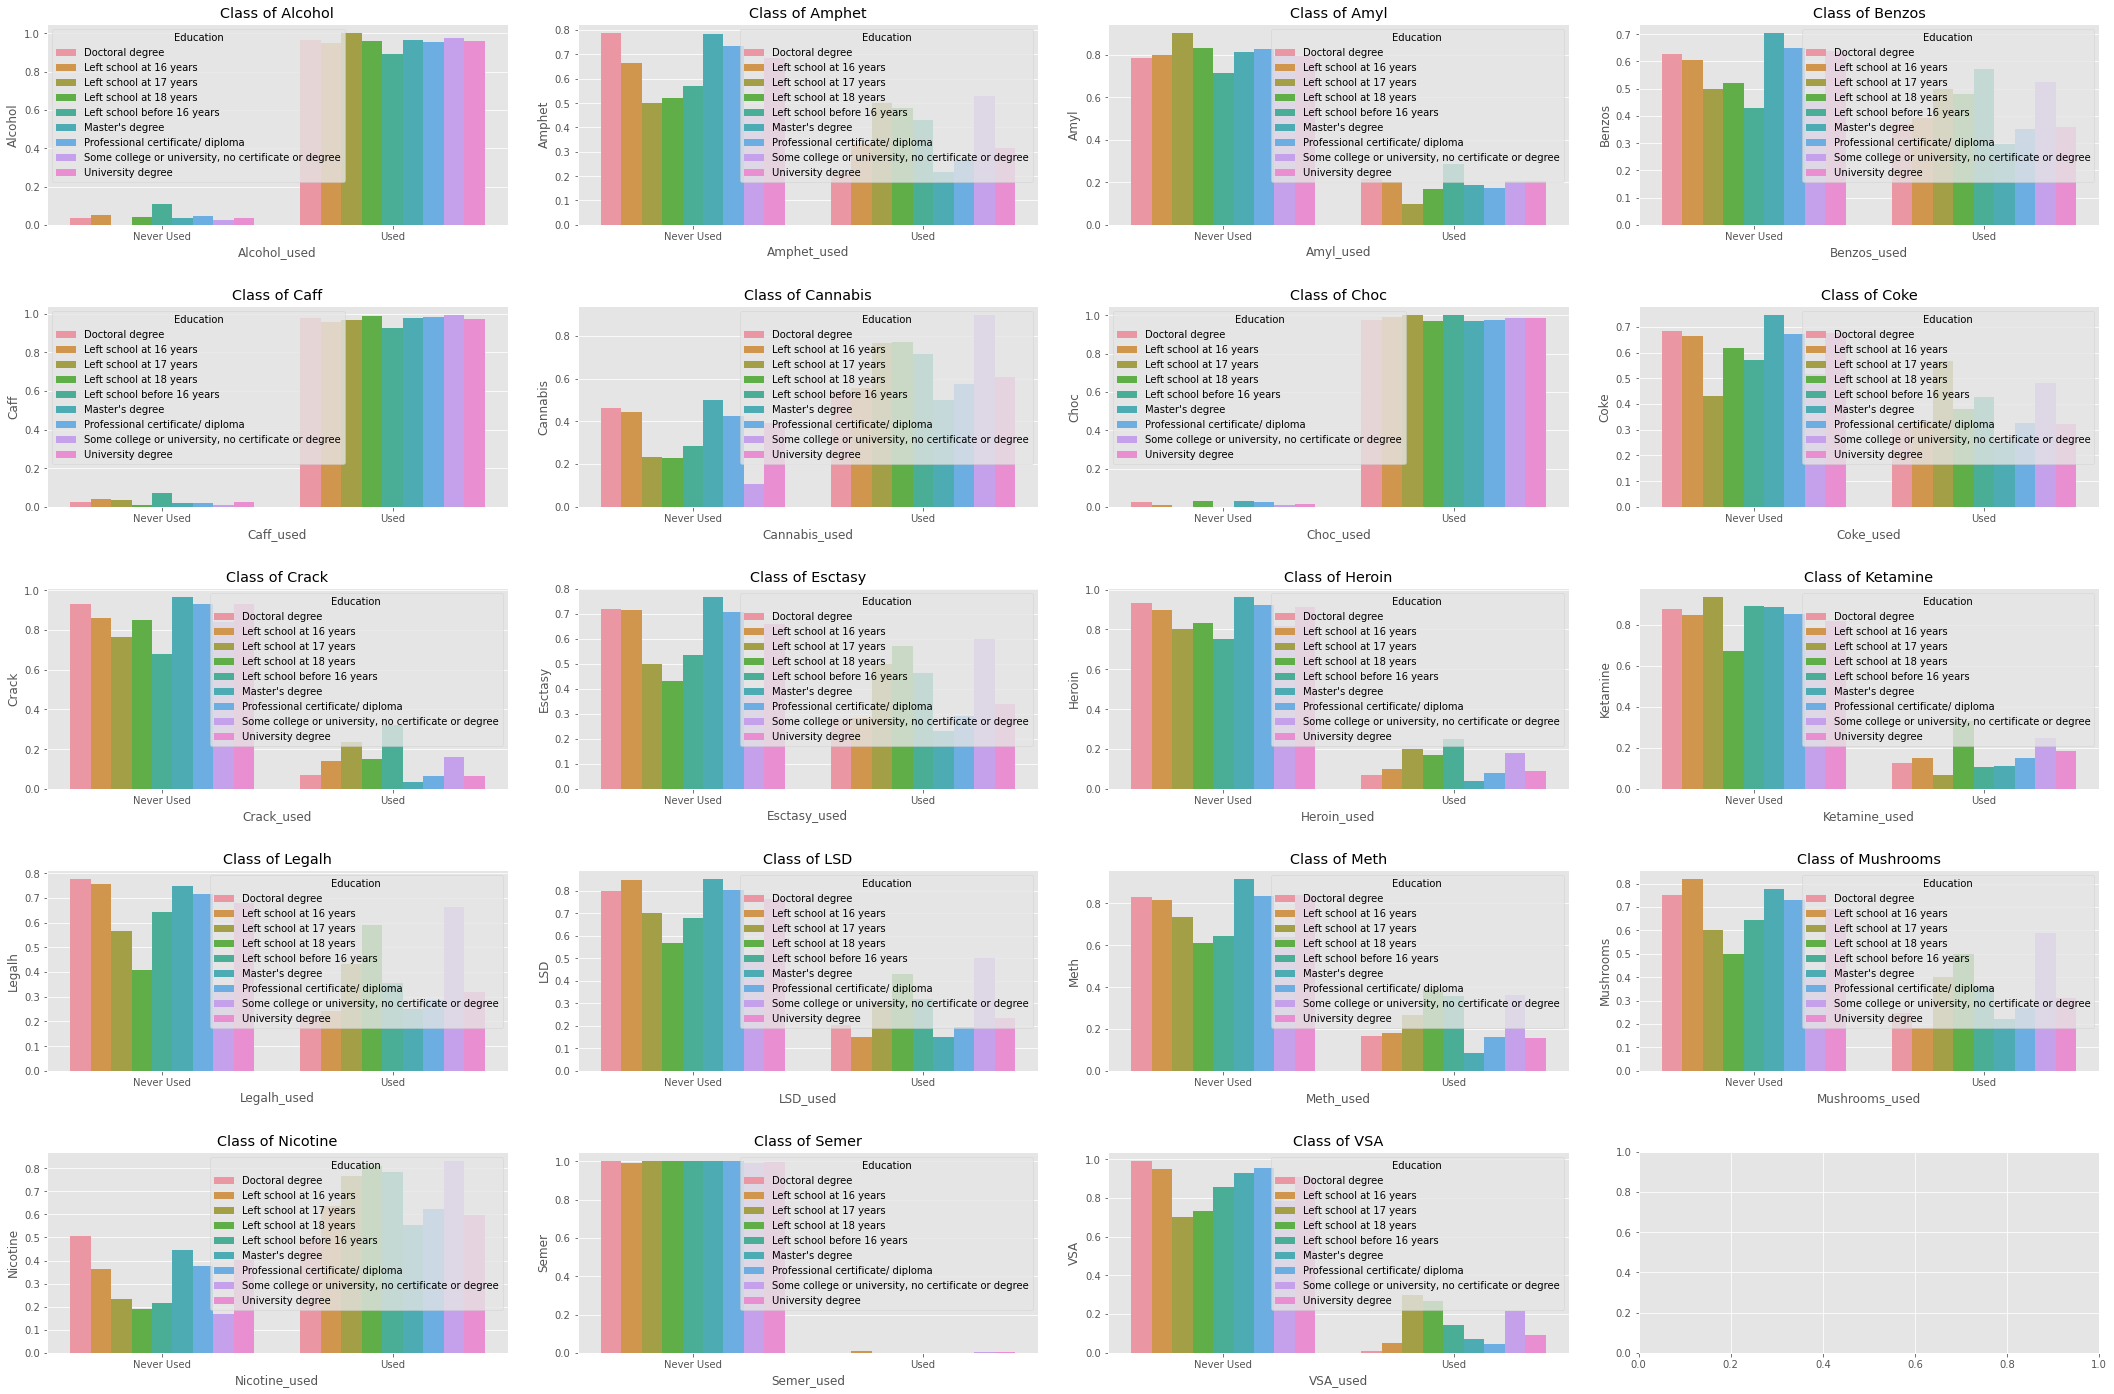

In [44]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Education"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Education", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Country - Drug used

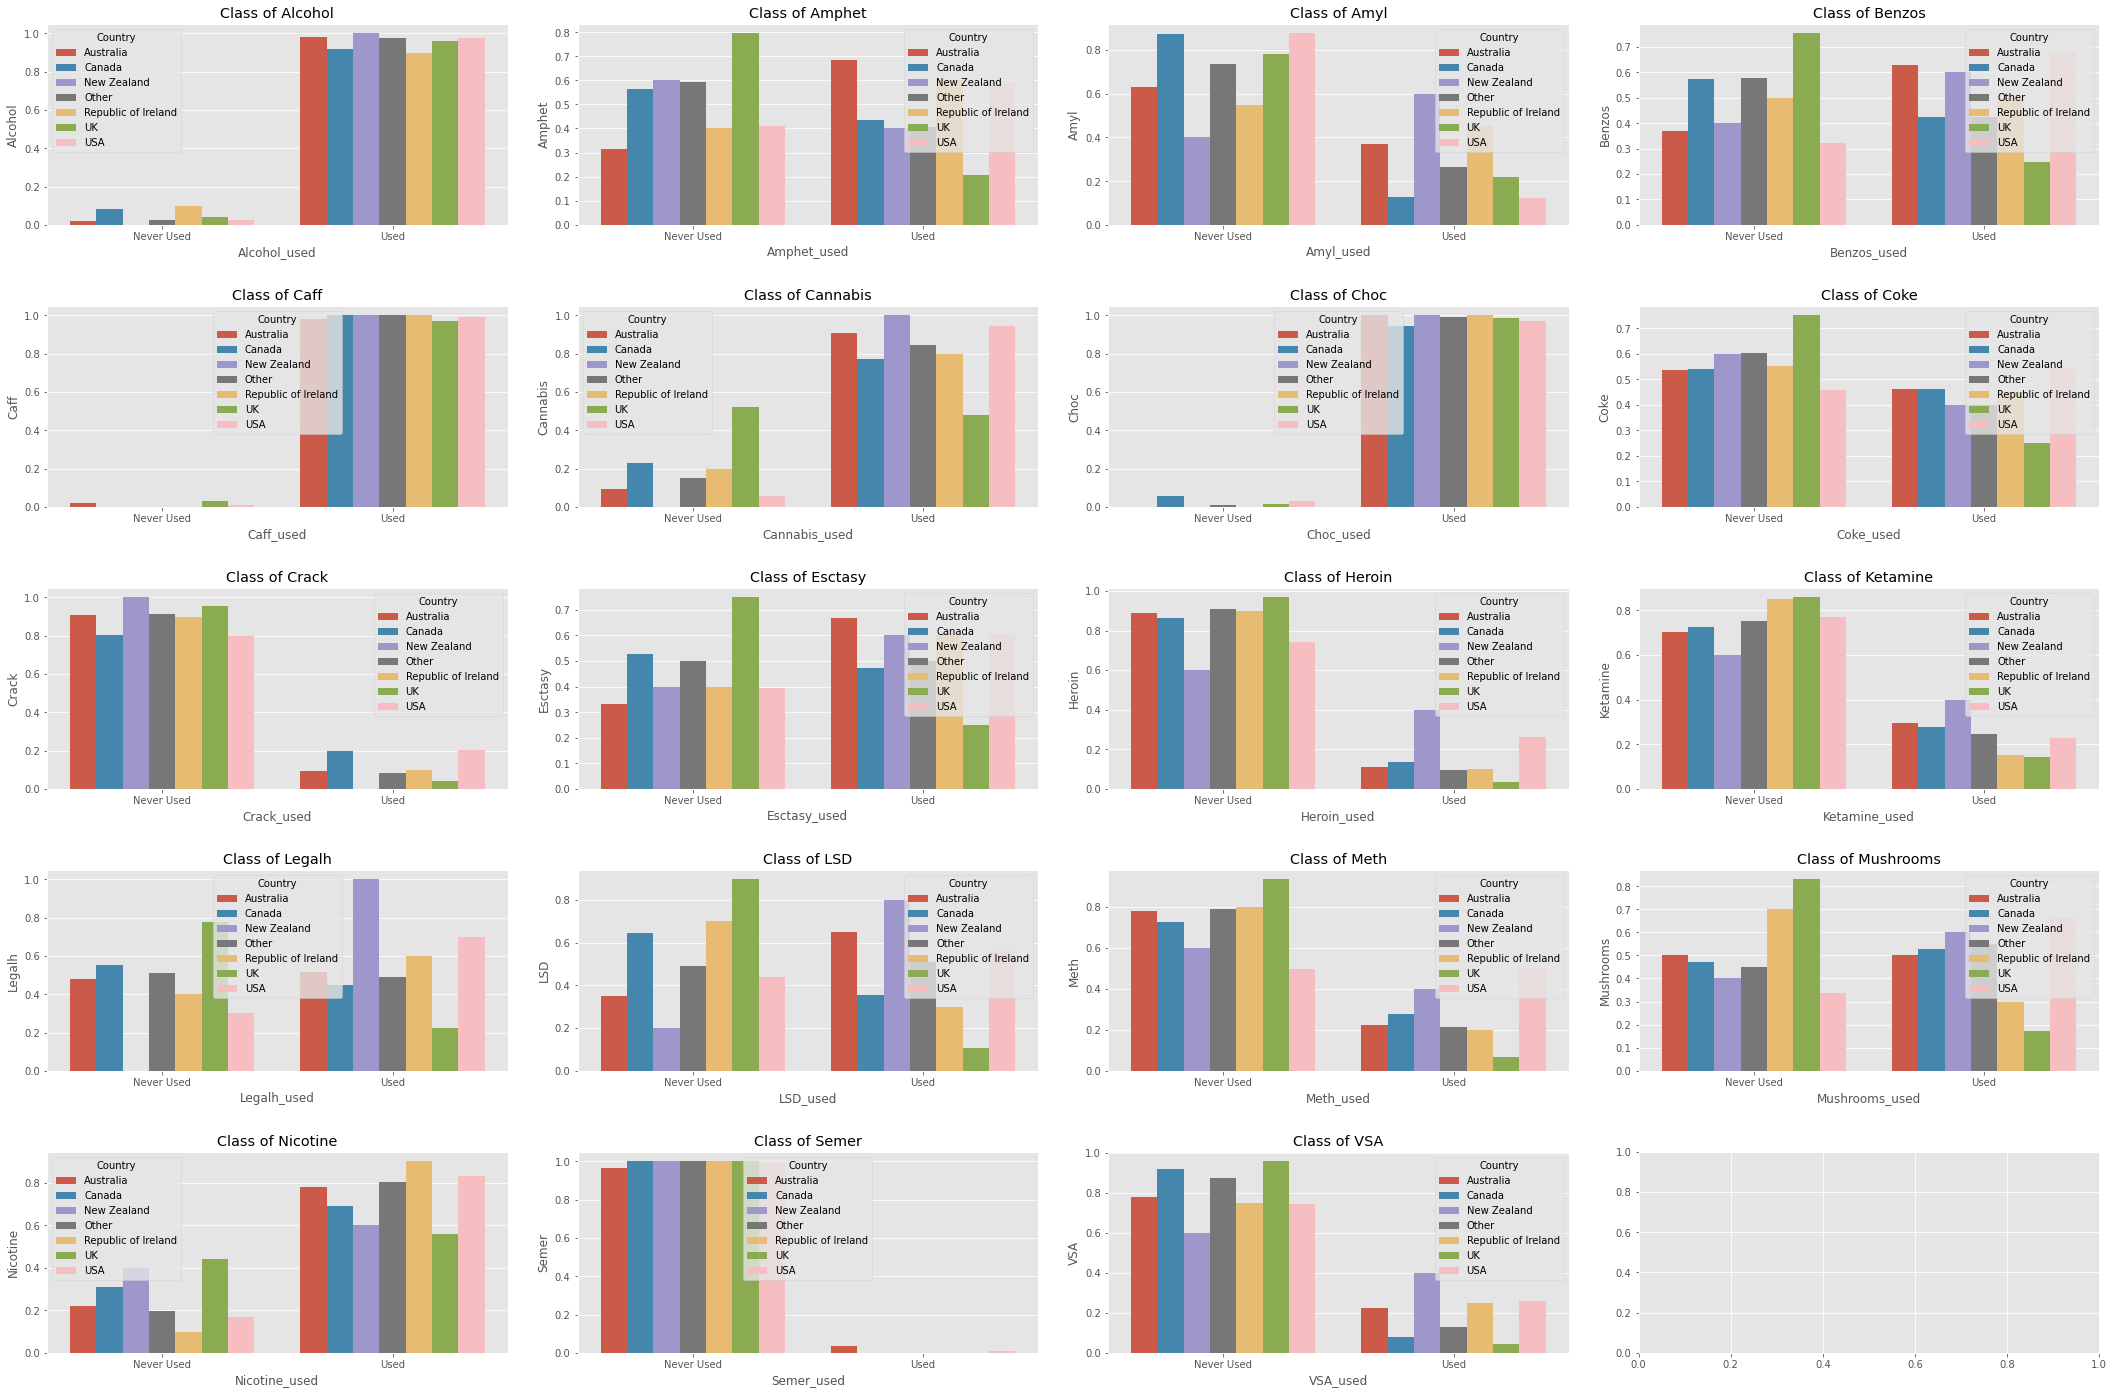

In [45]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Country"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Country", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Ethnicity - Drug used

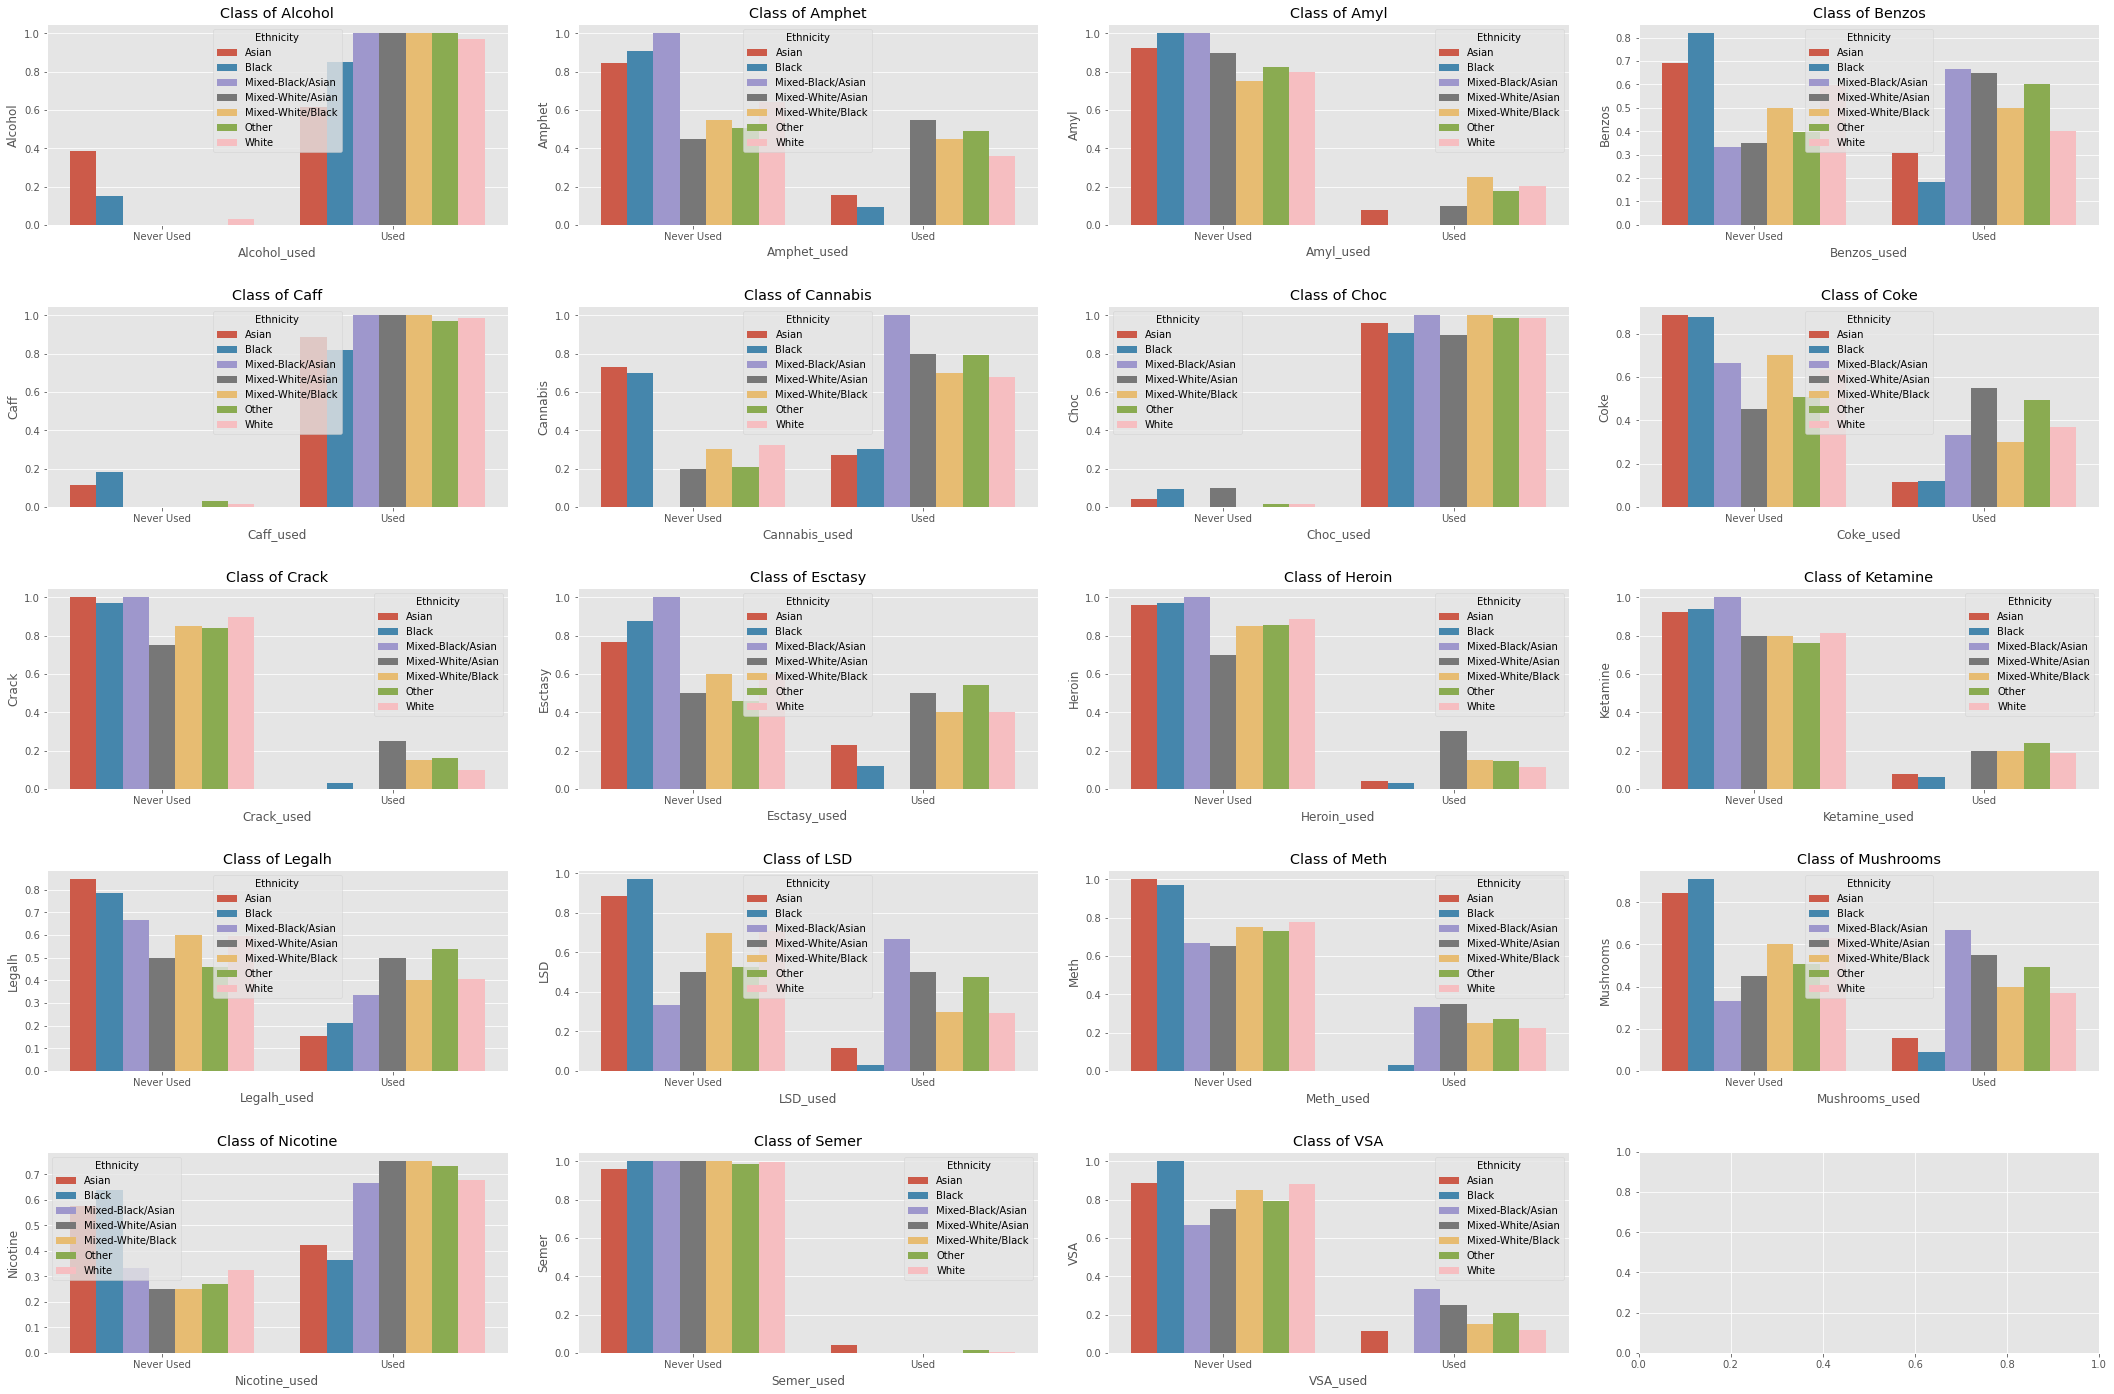

In [46]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Ethnicity", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

#### Between targets

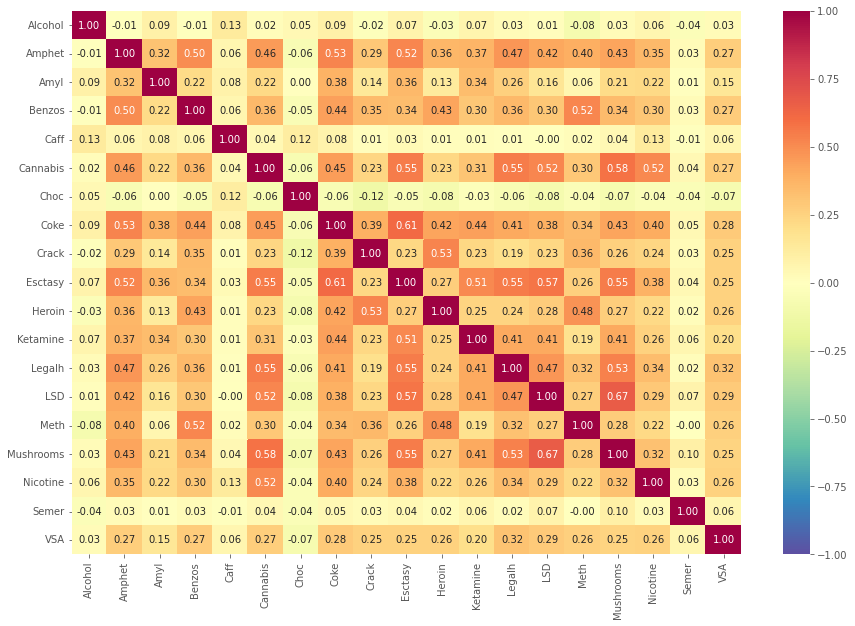

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.iloc[:,13:].corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

<a name="pca">

### PCA
We tried PCA but it didn't bring score improvements.

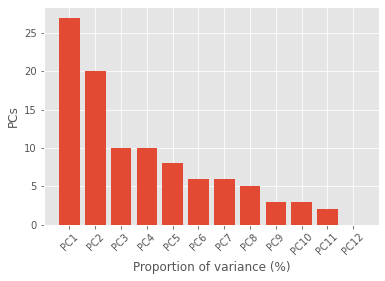

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

pca_out = PCA().fit(df.loc[:,feature_names])

num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

plt.bar(pc_list,np.round(pca_out.explained_variance_ratio_*100))
plt.xticks(rotation=45)
plt.xlabel("Proportion of variance (%)")
plt.ylabel("PCs")
plt.show()

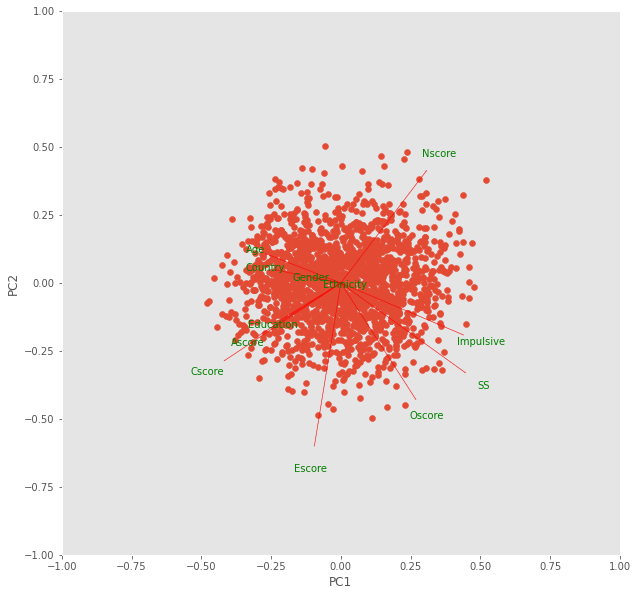

In [49]:
pca_out = PCA()
pca_x = pca_out.fit_transform(df.loc[:,feature_names])

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10,10))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, feature_names[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(pca_x[:,0:2],np.transpose(pca_out.components_[0:2, :]))
plt.show()

<a name="preprocessing">

## Preprocessing
--- 
  
1. Target selection   
Drop drug that will not be used for modelling
2. Target encoding  
We use label encoding  
3. Feature selection  
Drop feature that will not be used for modelling  
4. Feature encoding  
We use one hot encoding  

In [50]:
df = df.drop("Semer",axis=1)

In [51]:
df.iloc[:,13:] = df.iloc[:,13:].replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])

In [52]:
#remove columns ID from df
df.drop('ID',axis=1,inplace=True)

#modify the column country to be one hot encoded
list_of_countries = ['USA','New zealand','Other_Country','Australia','Republic of ireland','Canada','UK']
df.Country = df.Country.replace(df.Country.unique(),list_of_countries)


#modify the column ethnicity to be one hot encoded
list_of_ethnicity = ['Black','Asian','White','Mix_White_Black','Other_Ethnicity','Mix_White_Asian','Mix_Asian_Black']
df.Ethnicity = df.Ethnicity.replace(df.Ethnicity.unique(),list_of_ethnicity)


df = pd.concat([df.iloc[:,:3],pd.get_dummies(df.Country),pd.get_dummies(df.Ethnicity),df.iloc[:,5:]],axis = 1)

<a name="modeling">

## Modeling
---
**Metrics**
- Accuracy
- Balanced accuracy
- Confusion matrix 
  
**Phases**  
- Initial classes  
We keep the original classes and see what we get.  
  - Original models and data
  - Weighting features
  - Sampling features
- New classes  
We create our own classes to obtain better results.  
  - Original models and data
  - Weighting features
  - Sampling features

<a name="inital_classes">

### Initial classes

In [53]:
X = df.iloc[:,:24]
y = df.iloc[:,24:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
y.iloc[:,].value_counts()

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  Esctasy  Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  VSA
5        0       0     0       6     0         6     0     0      0        0       0         0       0    0     0          0         0      29
6        0       0     0       6     0         6     0     0      0        0       0         0       0    0     0          0         0      19
5        0       0     0       6     0         5     0     0      0        0       0         0       0    0     0          0         0      17
6        0       0     0       6     0         5     0     0      0        0       0         0       0    0     0          0         0      13
4        0       0     0       6     0         6     0     0      0        0       0         0       0    0     0          0         0      11
                                                                                                                                            ..
5    

#### Basic implementation

##### First metric: Accuracy
Accuracy is not the best metrics in this case as we can see here

In [55]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores = dict()
scoring = ['accuracy', 'balanced_accuracy', 'precision']

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        score_ = model.score(X_test, y_test_i)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  LogisticRegression :  0.4452296819787986
Amphet :  SVC :  0.5388692579505301
Amyl :  RandomForestClassifier :  0.715547703180212
Benzos :  SVC :  0.5459363957597173
Caff :  LogisticRegression :  0.7579505300353356
Cannabis :  SVC :  0.43992932862190814
Choc :  SVC :  0.41519434628975266
Coke :  SVC :  0.5971731448763251
Crack :  SVC :  0.8798586572438163
Esctasy :  SVC :  0.5812720848056537
Heroin :  SVC :  0.8586572438162544
Ketamine :  SVC :  0.803886925795053
Legalh :  SVC :  0.6466431095406361
LSD :  RandomForestClassifier :  0.6254416961130742
Meth :  LogisticRegression :  0.7614840989399293
Mushrooms :  SVC :  0.5830388692579506
Nicotine :  RandomForestClassifier :  0.4045936395759717
VSA :  SVC :  0.784452296819788


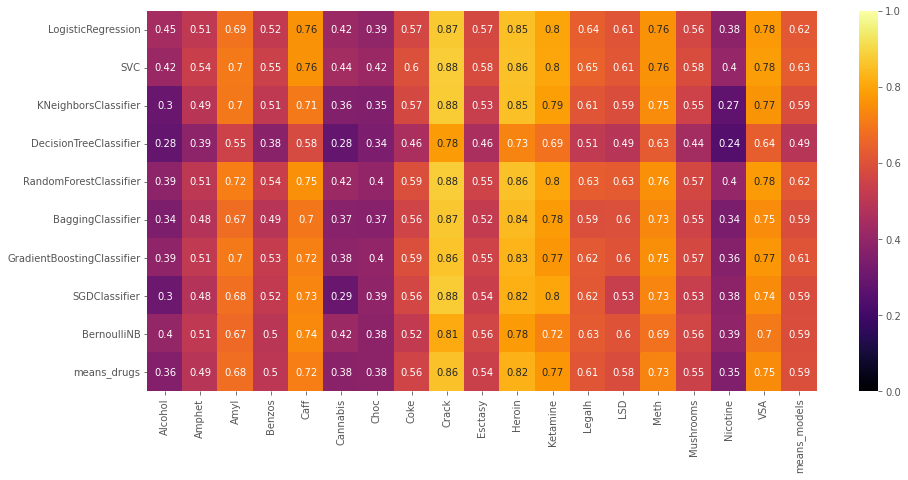

In [56]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

##### Second metric: Accuracy balanced (classes took into account)

In [57]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores = dict()
scoring = ['accuracy', 'balanced_accuracy', 'precision']

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  BernoulliNB :  0.23902397029765146
Amphet :  BernoulliNB :  0.2295992111449647


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  BaggingClassifier :  0.22885531920419713
Benzos :  BernoulliNB :  0.1989051914721398
Caff :  DecisionTreeClassifier :  0.14870640393288476
Cannabis :  BaggingClassifier :  0.3028878517471365


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  DecisionTreeClassifier :  0.18184463951389587
Coke :  BaggingClassifier :  0.22948727659594553


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  BernoulliNB :  0.23380283494424267
Esctasy :  BernoulliNB :  0.21061562822852395
Heroin :  BernoulliNB :  0.217939027462837
Ketamine :  DecisionTreeClassifier :  0.1868110064538636
Legalh :  BernoulliNB :  0.2507777426857773
LSD :  BernoulliNB :  0.3122374515252853
Meth :  BernoulliNB :  0.20461207738909518


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  SGDClassifier :  0.2949135507931328
Nicotine :  GradientBoostingClassifier :  0.22979205776743394
VSA :  BernoulliNB :  0.19564389462348647


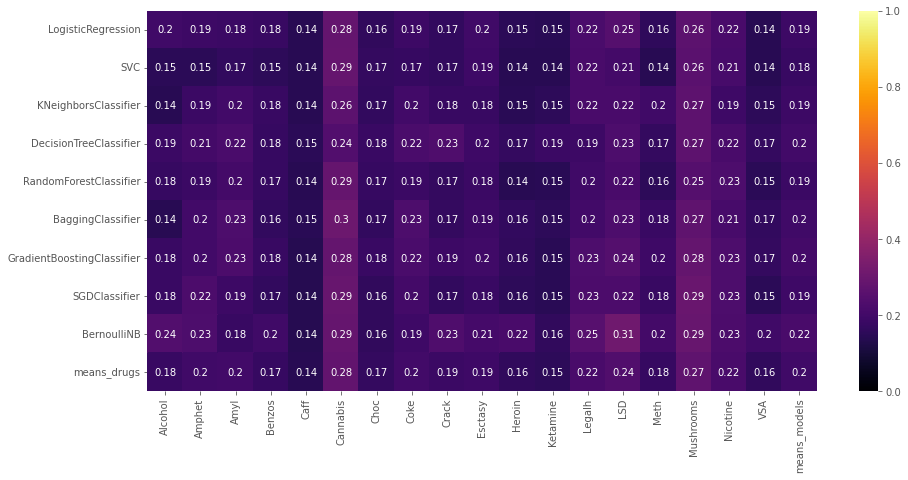

In [58]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

##### Third Metric: Confusion matrix
Example: Alcohol

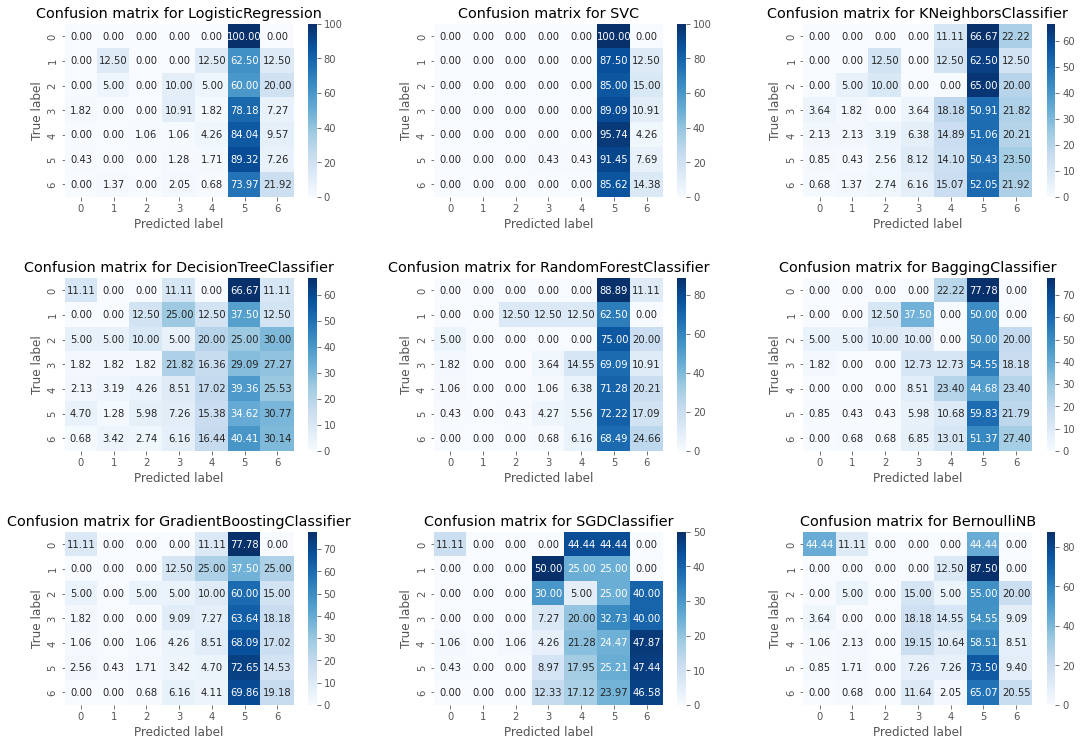

In [59]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Weighting (balanced classes)

In principal, unbalanced classes are not a problem at all for the k-nearest neighbor algorithm.

Because the algorithm is not influenced in any way by the size of the class, it will not favor any on the basis of size. T

In [60]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000, class_weight="balanced"), 
          SVC(class_weight="balanced"), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(class_weight="balanced"), 
          RandomForestClassifier(class_weight="balanced"), 
          BaggingClassifier(), 
          GradientBoostingClassifier(), 
          SGDClassifier(class_weight="balanced"), 
          BernoulliNB()]

In [61]:
scores = dict()
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  LogisticRegression :  0.24522677037978702
Amphet :  LogisticRegression :  0.30368846681742745


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  SVC :  0.305454586774713
Benzos :  LogisticRegression :  0.2914673465745748
Caff :  SVC :  0.2507637542480748
Cannabis :  LogisticRegression :  0.31516812330775806


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  SVC :  0.2730739582282313
Coke :  SVC :  0.29050479980489413


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  LogisticRegression :  0.3078478187070451
Esctasy :  SVC :  0.25587805737054065
Heroin :  DecisionTreeClassifier :  0.2537473389785329
Ketamine :  SVC :  0.23622171479314338
Legalh :  SGDClassifier :  0.2539017932262738
LSD :  LogisticRegression :  0.3952919248807337
Meth :  SVC :  0.2747131410703817


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  SVC :  0.37316195610755587
Nicotine :  SVC :  0.2736514972444228
VSA :  SVC :  0.253473590208284


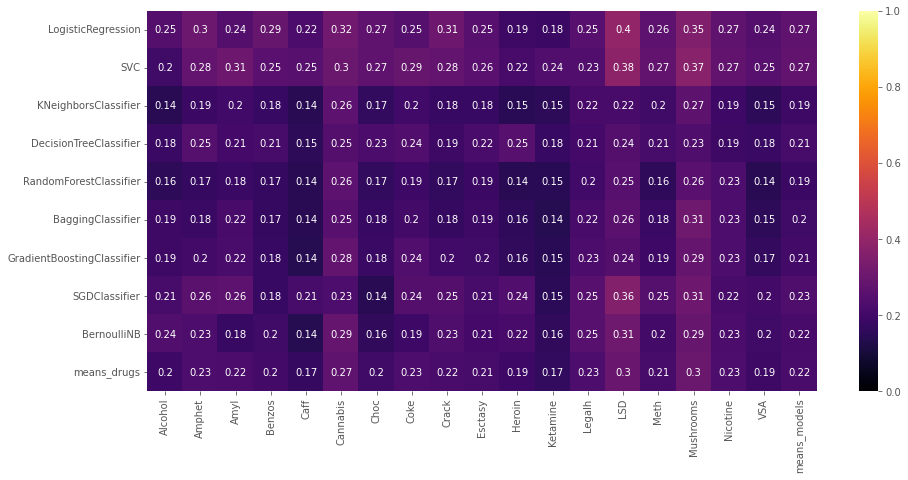

In [62]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example for alcohol

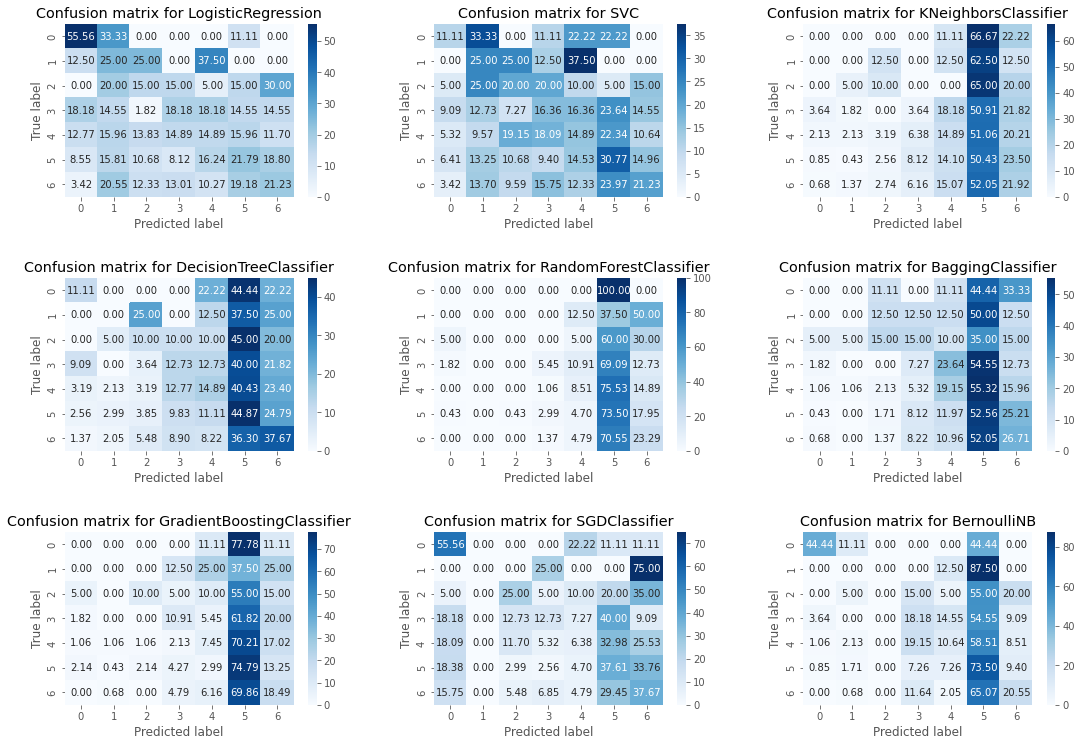

In [63]:
nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Over sampling

In [64]:
# We group the classes with less than 6 samples (condition required by the SMOTE algorithm)
dict_1 = {0:0,1:1,2:2,3:3,4:4,5:5,6:5}
dict_2 = {0:0,1:0,2:1,3:2,4:3,5:4,6:5} 

df_classed2 = df.copy()
df_classed2.iloc[:,26] = df_classed2.iloc[:,26].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,30] = df_classed2.iloc[:,30].replace(dict_2.keys(),dict_2.values())
df_classed2.iloc[:,32] = df_classed2.iloc[:,32].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,35] = df_classed2.iloc[:,35].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,39] = df_classed2.iloc[:,39].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,41] = df_classed2.iloc[:,41].replace(dict_1.keys(),dict_1.values())

In [65]:
X = df_classed2.iloc[:,:24]
y = df_classed2.iloc[:,24:]
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
oversample = SMOTE()
list_X = dict()
list_y = dict()
for i, name in enumerate(y_train_sampled.columns):
    try:
        new_X, new_y = oversample.fit_resample(X_train_sampled, y_train_sampled.iloc[:,i])
    except Exception as e:
        print(i,e)
    list_X[name] = new_X
    list_y[name] = new_y

In [67]:
scores = dict()
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_i = list_X[y.columns[i]]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test_sampled)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  SGDClassifier :  0.25865473462383987
Amphet :  LogisticRegression :  0.30368846681742745


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  SVC :  0.305454586774713
Benzos :  LogisticRegression :  0.2914673465745748
Caff :  SVC :  0.2507637542480748
Cannabis :  LogisticRegression :  0.31516812330775806


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  SVC :  0.2730739582282313
Coke :  SVC :  0.29050479980489413


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  LogisticRegression :  0.3078478187070451
Esctasy :  SVC :  0.25587805737054065
Heroin :  DecisionTreeClassifier :  0.24014189680166217
Ketamine :  SVC :  0.23622171479314338
Legalh :  LogisticRegression :  0.25094294949334306
LSD :  SGDClassifier :  0.3991095679946888
Meth :  SVC :  0.2747131410703817


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  SVC :  0.37316195610755587
Nicotine :  SVC :  0.2736514972444228
VSA :  SVC :  0.253473590208284


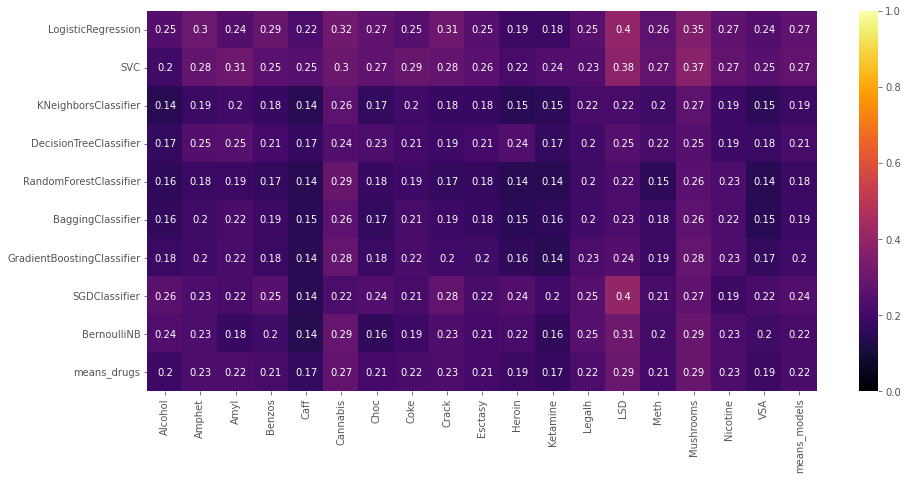

In [68]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example Alcohol

In [69]:
X_train_sampled, y_train_sampled = list_X["Alcohol"], list_y["Alcohol"]
y_test_sampled = y_test_sampled.loc[:,"Alcohol"]

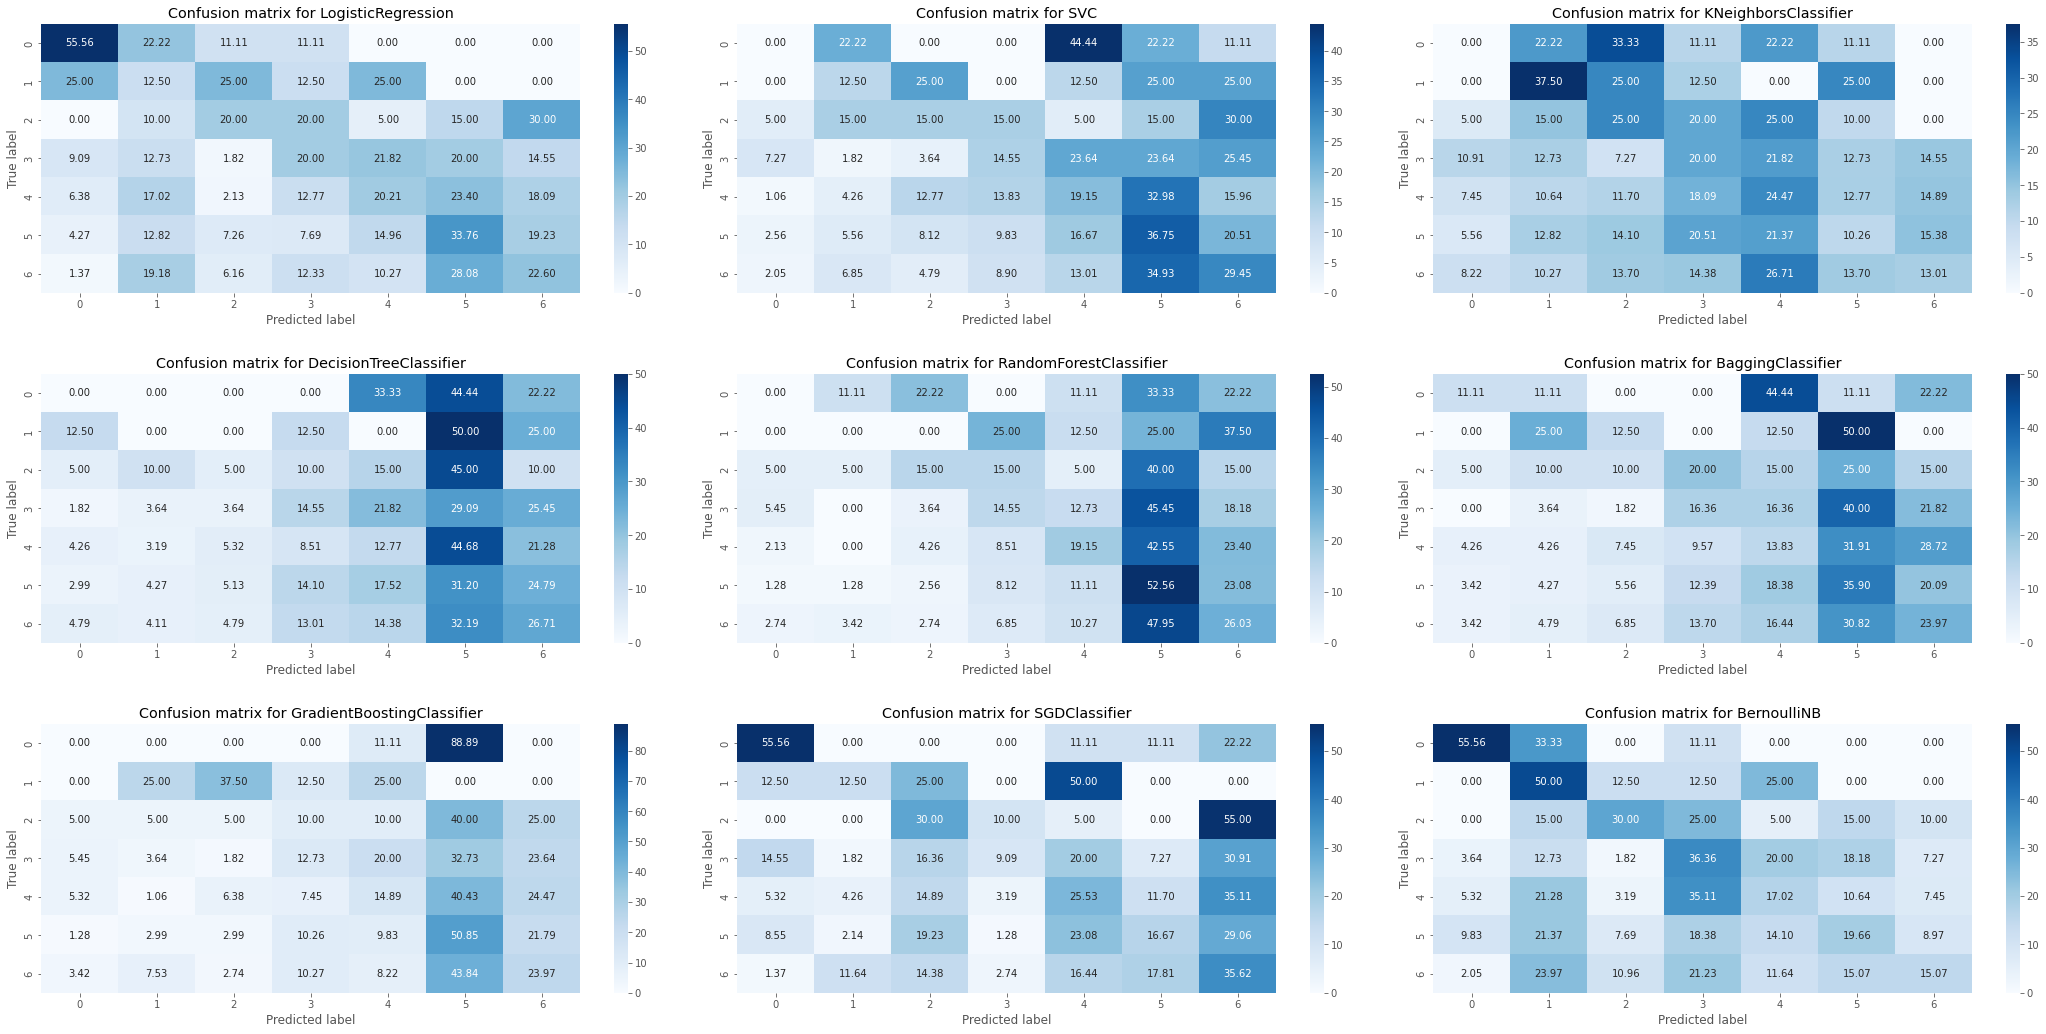

In [70]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train_sampled
        y_test_i = y_test_sampled
        models[k].fit(X_train_sampled, y_train_i)
        preds = models[k].predict(X_test_sampled)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

<a name="new_classes">

### New classes

We delete chocolate from the dataset

In [71]:
df = df.drop("Choc",axis=1) #ATTENTION CA CHANGE LES COLONNES

Based on the confusion matrix, we create new class depending on the drugs

In [72]:
liste = [["Alcohol","Cannabis", "Nicotine","Amphet", "Benzos", "Coke", "Esctasy", "Legalh"],
         ["Amyl", "Crack", "Heroin", "Ketamine", "Meth", "VSA","LSD", "Mushrooms"], 
         ["Caff"]]
dict_1 = {0:0,1:0,2:0,3:0,4:1,5:1,6:1} # Alcohol, Cannabis, Nicotine, Amphet, Benzos, Coke, Ecstasy, Legalh, LSD, mushrooms
# 0: never used in the last month => not addict
# 1: used last month => addict
dict_2 = {0:0,1:0,2:1,3:1,4:1,5:1,6:1} # Amyl, Crack, Heroin, Ketamine, Meth, VSA
# 0: never used 
# 1: used 
dict_3 = {0:0,1:0,2:0,3:0,4:0,5:0,6:1} # Caff
# 0: not used yesterday => not daily addict
# 1: used yesterday => daily addict

list_of_dicts = [dict_1,dict_2,dict_3]

df_classed = df.copy()
for l, d in zip(liste, list_of_dicts):
    for i in l:
        df_classed[i] = df_classed[i].replace(d.keys(),d.values())

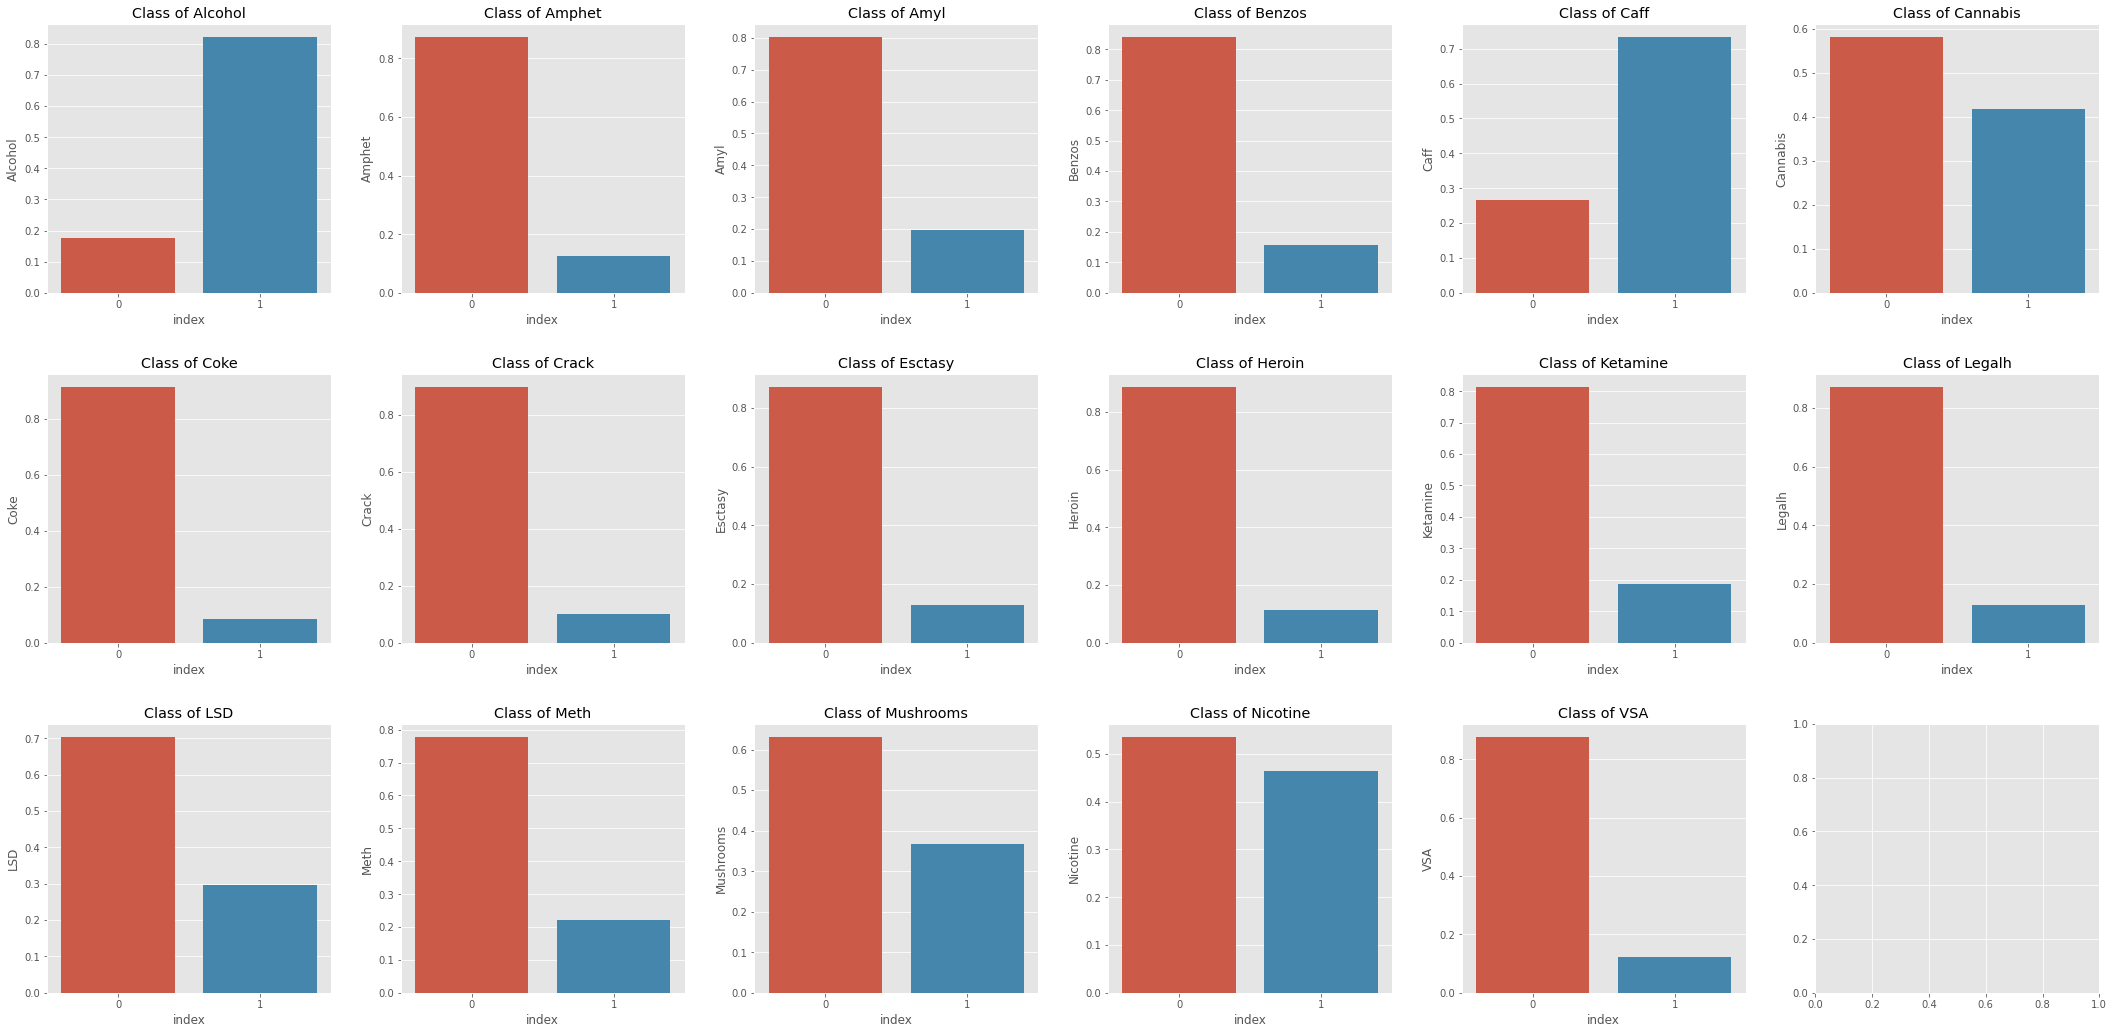

In [73]:
nrows = 3
ncols = 6
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_classed.iloc[:,24+i].value_counts(normalize=True)).reset_index()
        sns.barplot(x = "index", y = df_classed.iloc[:,24:].columns[i], data = drug_density, ax=axis[r,c])
        axis[r,c].set_title(f"Class of {df_classed.iloc[:,24:].columns[i]}")
        axis[r,c].tick_params(axis='x')
        i+=1
        if i == 17:
          break
fig.tight_layout(pad=3.0)
fig.show()

In [74]:
X = df_classed.iloc[:,:24]
y = df_classed.iloc[:,24:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Alcohol
y_train_i = y_train.loc[:,"Alcohol"]
y_test_i = y_test.loc[:,"Alcohol"]

#### Basic implementation

In [76]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores_basic = dict()
best_model_basic = dict()
best_model_name_basic = dict()

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores_basic[y.columns[i]] = scores_models
    best_model_basic[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_basic[y.columns[i]] = model_names[np.argmax(scores_models)]
    print(y.columns[i],': ', model_names[np.argmax(scores_models)], ": ", max(scores_models), sep="")

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol: SGDClassifier: 0.5370574206567602
Amphet: BernoulliNB: 0.641136675123203
Amyl: DecisionTreeClassifier: 0.6308483183483183
Benzos: BernoulliNB: 0.696819132750095
Caff: SGDClassifier: 0.5577135759617512
Cannabis: SGDClassifier: 0.8160249405412354
Coke: BernoulliNB: 0.5278580639423718
Crack: BernoulliNB: 0.6548573007539573
Esctasy: DecisionTreeClassifier: 0.5603991596638656
Heroin: BernoulliNB: 0.6728535484093338
Ketamine: BernoulliNB: 0.5897306961671696
Legalh: BernoulliNB: 0.6539688164422395
LSD: BernoulliNB: 0.7722229227083596
Meth: BernoulliNB: 0.7552911983652022
Mushrooms: BernoulliNB: 0.762484757787385
Nicotine: BernoulliNB: 0.6793238669713886
VSA: BernoulliNB: 0.6979076940176165


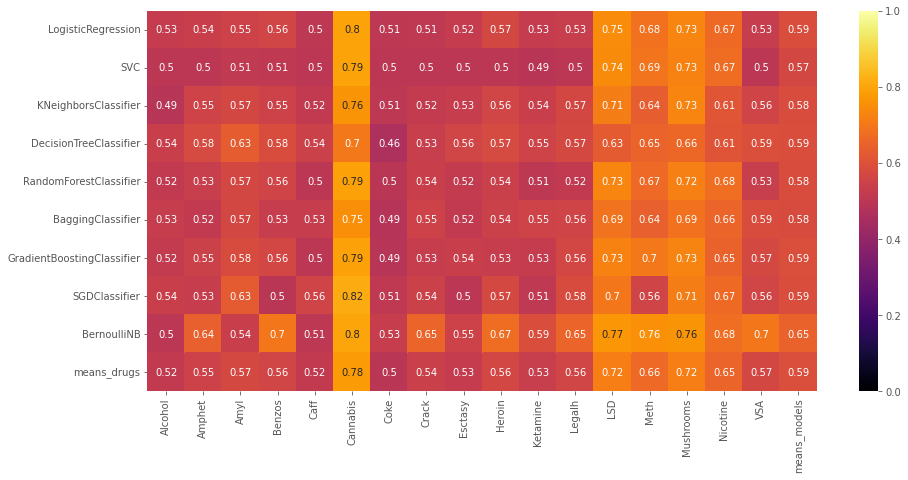

In [77]:
All_scores_basic = pd.DataFrame(scores_basic, index=model_names)
All_scores_basic['means_models'] = All_scores_basic.mean(axis=1)
All_scores_basic.loc['means_drugs'] = All_scores_basic.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_basic,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example: Alcohol

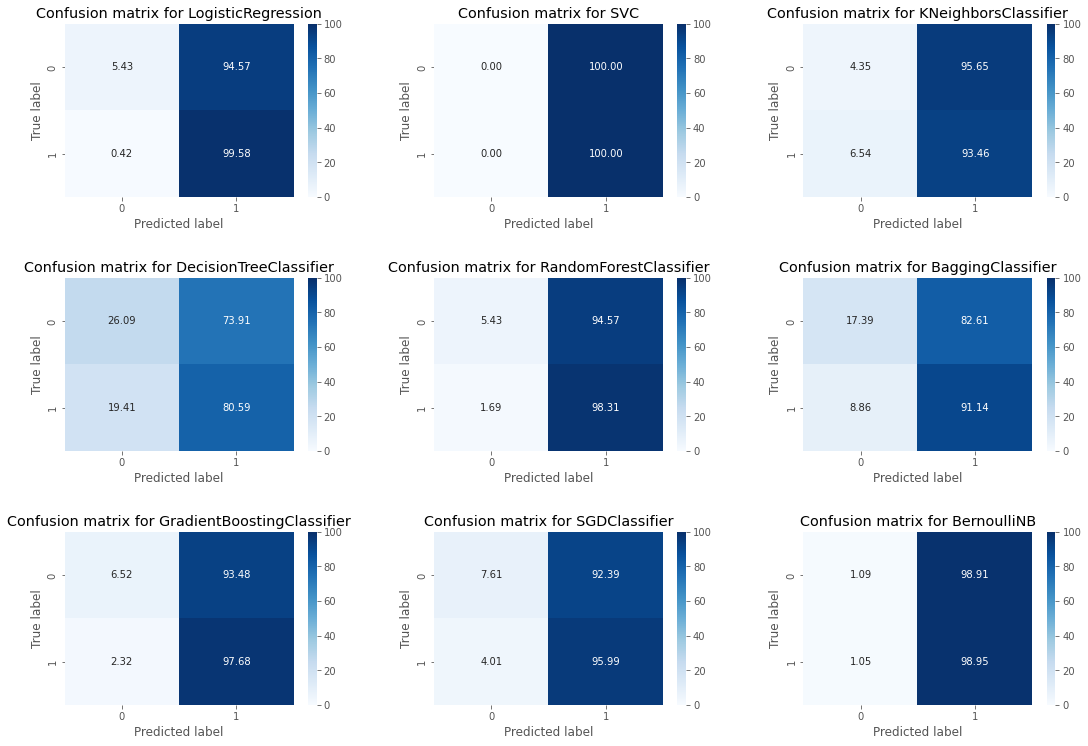

In [78]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized,vmin=0, vmax=100, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Weighting (balanced classes)

In [79]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000, class_weight="balanced"), 
          SVC(class_weight="balanced"), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(class_weight="balanced"), 
          RandomForestClassifier(class_weight="balanced"), 
          BaggingClassifier(), 
          GradientBoostingClassifier(), 
          SGDClassifier(class_weight="balanced"), 
          BernoulliNB()]

In [80]:
scores_weight = dict()
best_model_weight = dict()
best_model_name_weight = dict()
i=0
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores_weight[y.columns[i]] = scores_models
    best_model_weight[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_weight[y.columns[i]] = model_names[np.argmax(scores_models)]
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol :  LogisticRegression :  0.6295633828655293
Amphet :  SGDClassifier :  0.6919050535094626
Amyl :  LogisticRegression :  0.6800907425907425
Benzos :  LogisticRegression :  0.7430581970330924
Caff :  LogisticRegression :  0.6021472444830109
Cannabis :  LogisticRegression :  0.8144500867776563
Coke :  SVC :  0.6809106674374139
Crack :  SVC :  0.6936012315951525
Esctasy :  SVC :  0.6406162464985994
Heroin :  SVC :  0.7241581360079964
Ketamine :  SVC :  0.6637613141133087
Legalh :  LogisticRegression :  0.7344377510040161
LSD :  LogisticRegression :  0.7921605093935191
Meth :  LogisticRegression :  0.7608925704276748
Mushrooms :  BernoulliNB :  0.762484757787385
Nicotine :  BernoulliNB :  0.6793238669713886
VSA :  LogisticRegression :  0.7479090833310178


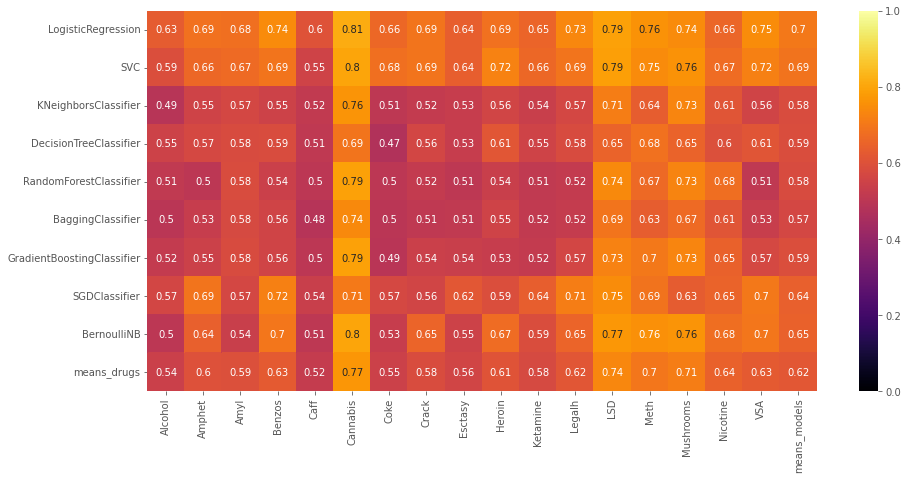

In [81]:
All_scores_weight = pd.DataFrame(scores_weight, index=model_names)
All_scores_weight['means_models'] = All_scores_weight.mean(axis=1)
All_scores_weight.loc['means_drugs'] = All_scores_weight.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_weight,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example for alcohol

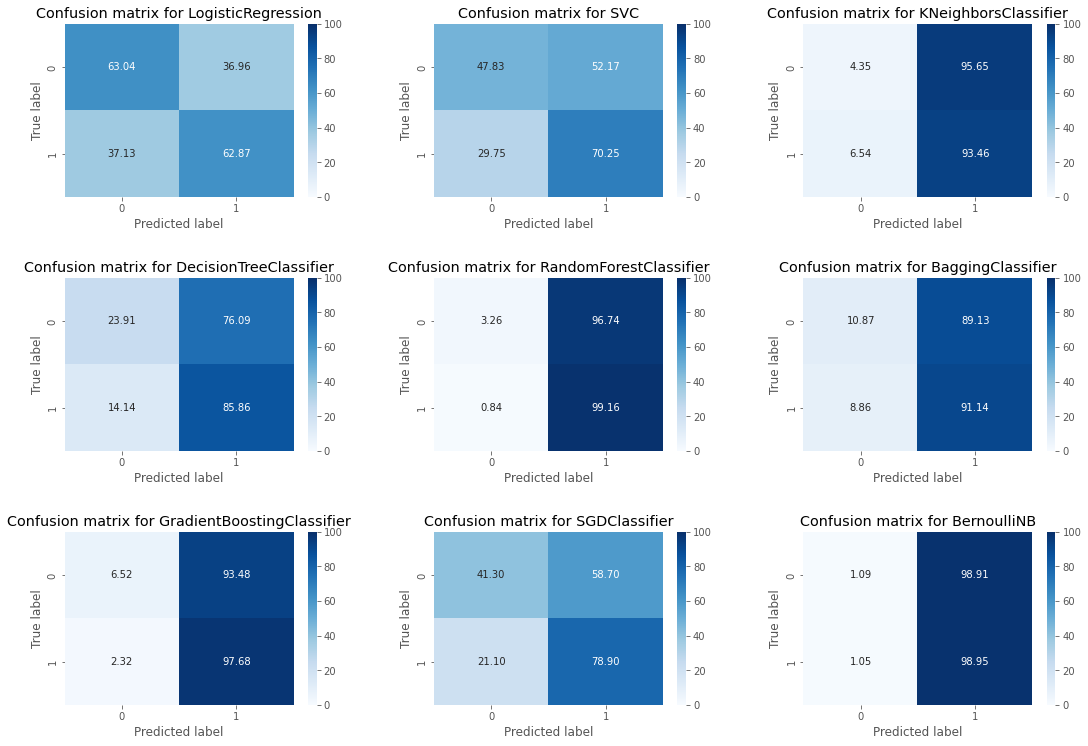

In [82]:
nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
k = 0
i = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Over sampling

In [83]:
oversample = SMOTE()
list_X = dict()
list_y = dict()
for i, name in enumerate(y_train.columns):
    try:
        new_X, new_y = oversample.fit_resample(X_train, y_train.iloc[:,i])
    except Exception as e:
        print(i,e)
    list_X[name] = new_X
    list_y[name] = new_y

In [84]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

scores_sampling = dict()
best_model_sampling = dict()
best_model_name_sampling = dict()
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_i = list_X[y.columns[i]]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)
    best_model_sampling[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_sampling[y.columns[i]] = model_names[np.argmax(scores_models)]
    scores_sampling[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol :  BaggingClassifier :  0.5480875068794716
Amphet :  BernoulliNB :  0.641136675123203
Amyl :  DecisionTreeClassifier :  0.6163003663003663
Benzos :  BernoulliNB :  0.696819132750095
Caff :  DecisionTreeClassifier :  0.543633981590186
Cannabis :  BernoulliNB :  0.7977694928328084
Coke :  BernoulliNB :  0.5278580639423718
Crack :  BernoulliNB :  0.6548573007539573
Esctasy :  DecisionTreeClassifier :  0.5574579831932773
Heroin :  BernoulliNB :  0.6728535484093338
Ketamine :  BernoulliNB :  0.5897306961671696
Legalh :  BernoulliNB :  0.6539688164422395
LSD :  BernoulliNB :  0.7722229227083596
Meth :  BernoulliNB :  0.7552911983652022
Mushrooms :  BernoulliNB :  0.762484757787385
Nicotine :  RandomForestClassifier :  0.6899766463102419
VSA :  BernoulliNB :  0.6979076940176165


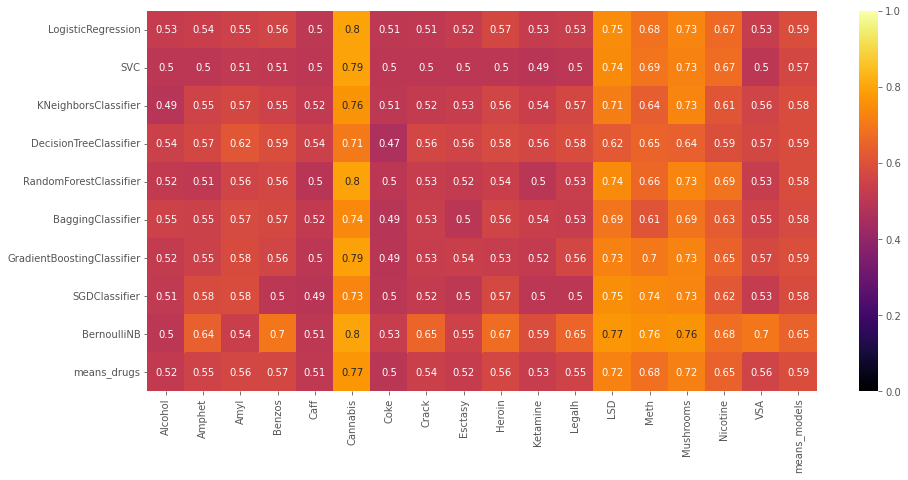

In [85]:
All_scores_sampling = pd.DataFrame(scores_sampling, index=model_names)
All_scores_sampling['means_models'] = All_scores_sampling.mean(axis=1)
All_scores_sampling.loc['means_drugs'] = All_scores_sampling.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_sampling,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example Alcohol

In [86]:
X_train_sampled, y_train_sampled = list_X["Alcohol"], list_y["Alcohol"]
y_test_sampled = y_test.loc[:,"Alcohol"]

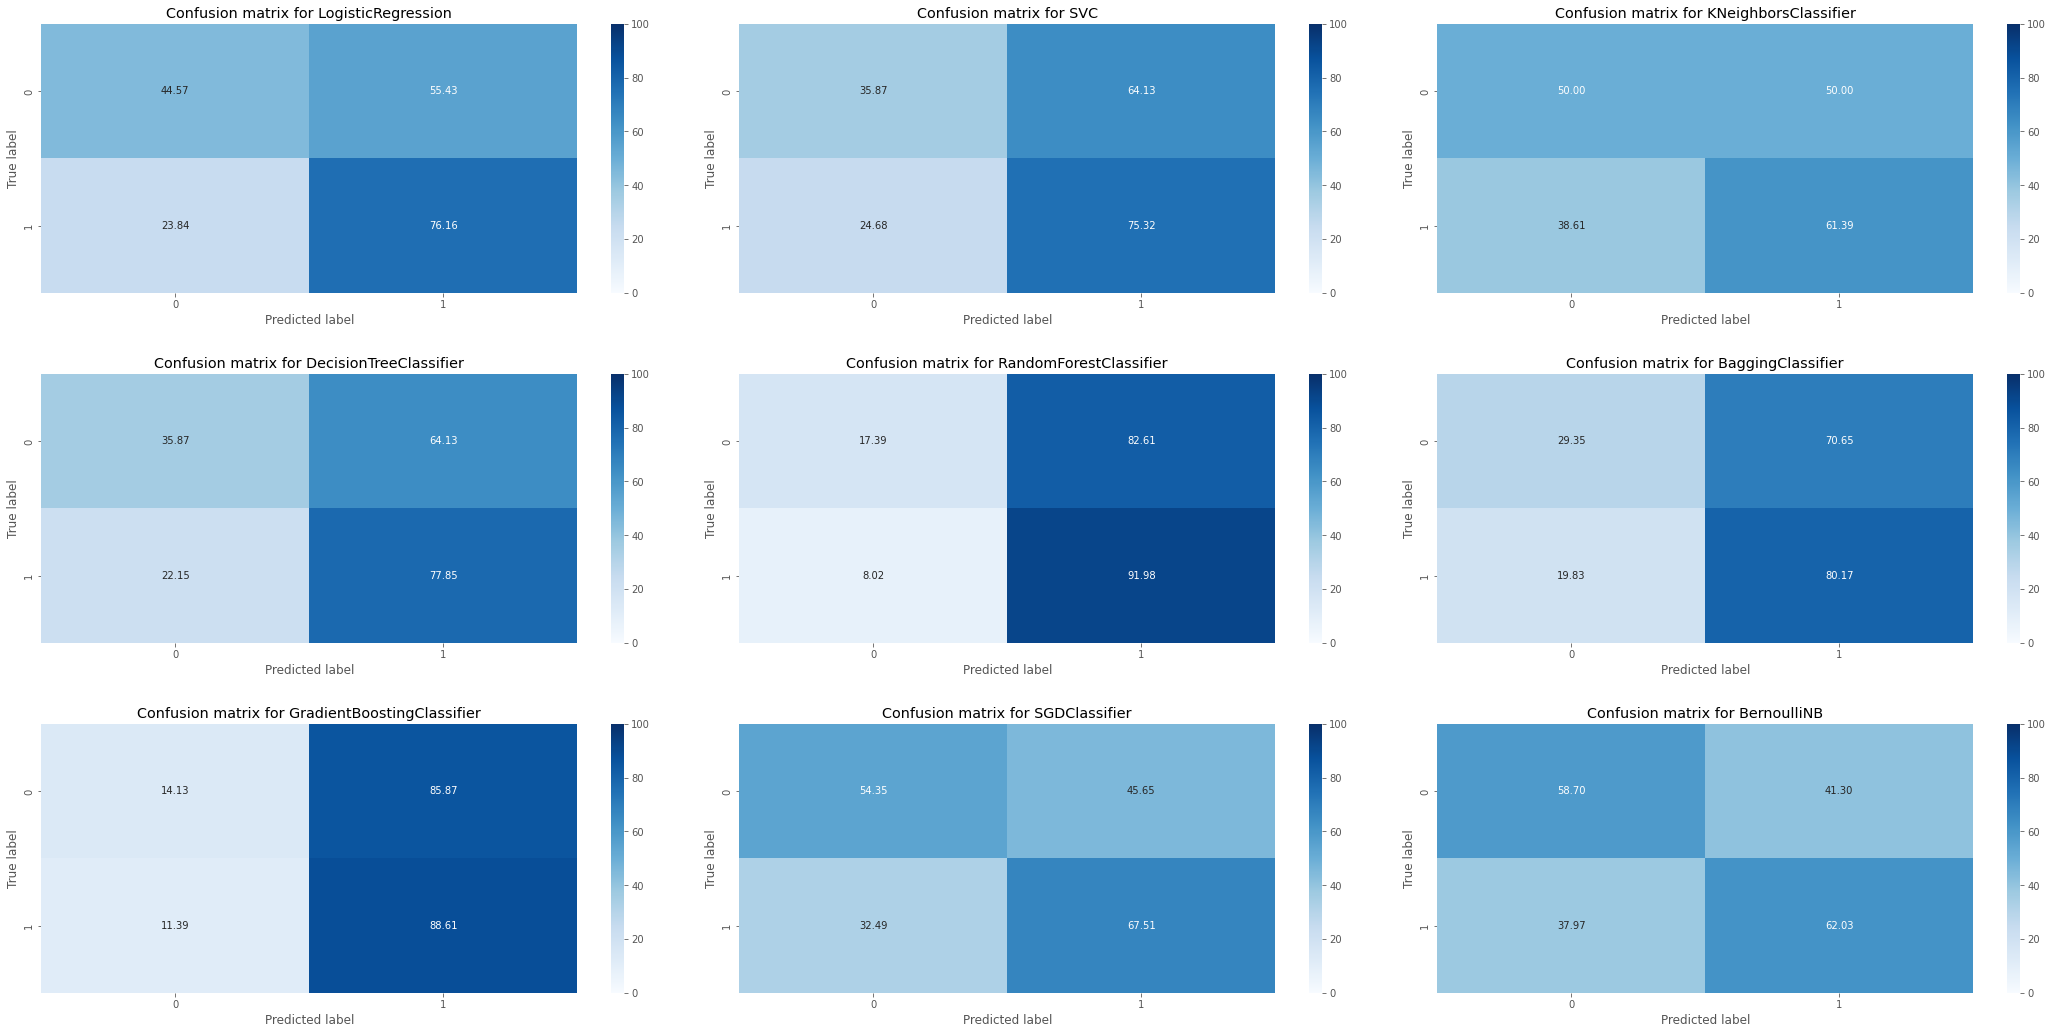

In [87]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train_sampled
        y_test_i = y_test_sampled
        models[k].fit(X_train_sampled, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f',vmin=0, vmax=100, cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Comparison

In [88]:
All_names = pd.DataFrame({drug_name:[basic,weight,sampling] for (drug_name, basic), (_, weight), (_, sampling) in zip(best_model_name_basic.items(),
                                                                                                                     best_model_name_weight.items(),
                                                                                                                     best_model_name_sampling.items())})
All_names.index = ["Basic_model_name","Weight_model_name","Sampling_model_name"]

All_scores = pd.DataFrame([All_scores_basic.iloc[:,:-1].max(), All_scores_weight.iloc[:,:-1].max(), All_scores_sampling.iloc[:,:-1].max()])
All_scores.index = ["Basic","Weight","Sampling"]

best_methods = [All_names.index[np.argmax(All_scores[drug])] for drug in All_scores.columns]
best_methods = pd.DataFrame({drug:[best_method,All_names.loc[best_method,drug]] for drug, best_method in zip(All_scores.columns,best_methods)})
best_methods.index = ["Best method","Best model"]

All_scores = All_scores.append(All_names)
All_scores.append(best_methods)

Alcohol  ...                 VSA
Basic                          0.537057  ...            0.697908
Weight                         0.629563  ...            0.747909
Sampling                       0.548088  ...            0.697908
Basic_model_name          SGDClassifier  ...         BernoulliNB
Weight_model_name    LogisticRegression  ...  LogisticRegression
Sampling_model_name   BaggingClassifier  ...         BernoulliNB
Best method           Weight_model_name  ...   Weight_model_name
Best model           LogisticRegression  ...  LogisticRegression

[8 rows x 17 columns]

Thus, weighting is the best method for all drugs except for mushrooms but the difference is weak.  
Let's now analyse the confusion matrix of the best model for each drugs to verify the results

#### Comparison with each method with confusion matrix

In [89]:
All_models = pd.DataFrame({drug_name:[basic,weight,sampling] for (drug_name, basic), (_, weight), (_, sampling) in zip(best_model_basic.items(),
                                                                                                                     best_model_weight.items(),
                                                                                                                     best_model_sampling.items())})
All_models.index = ["Basic","Weight","Sampling"]

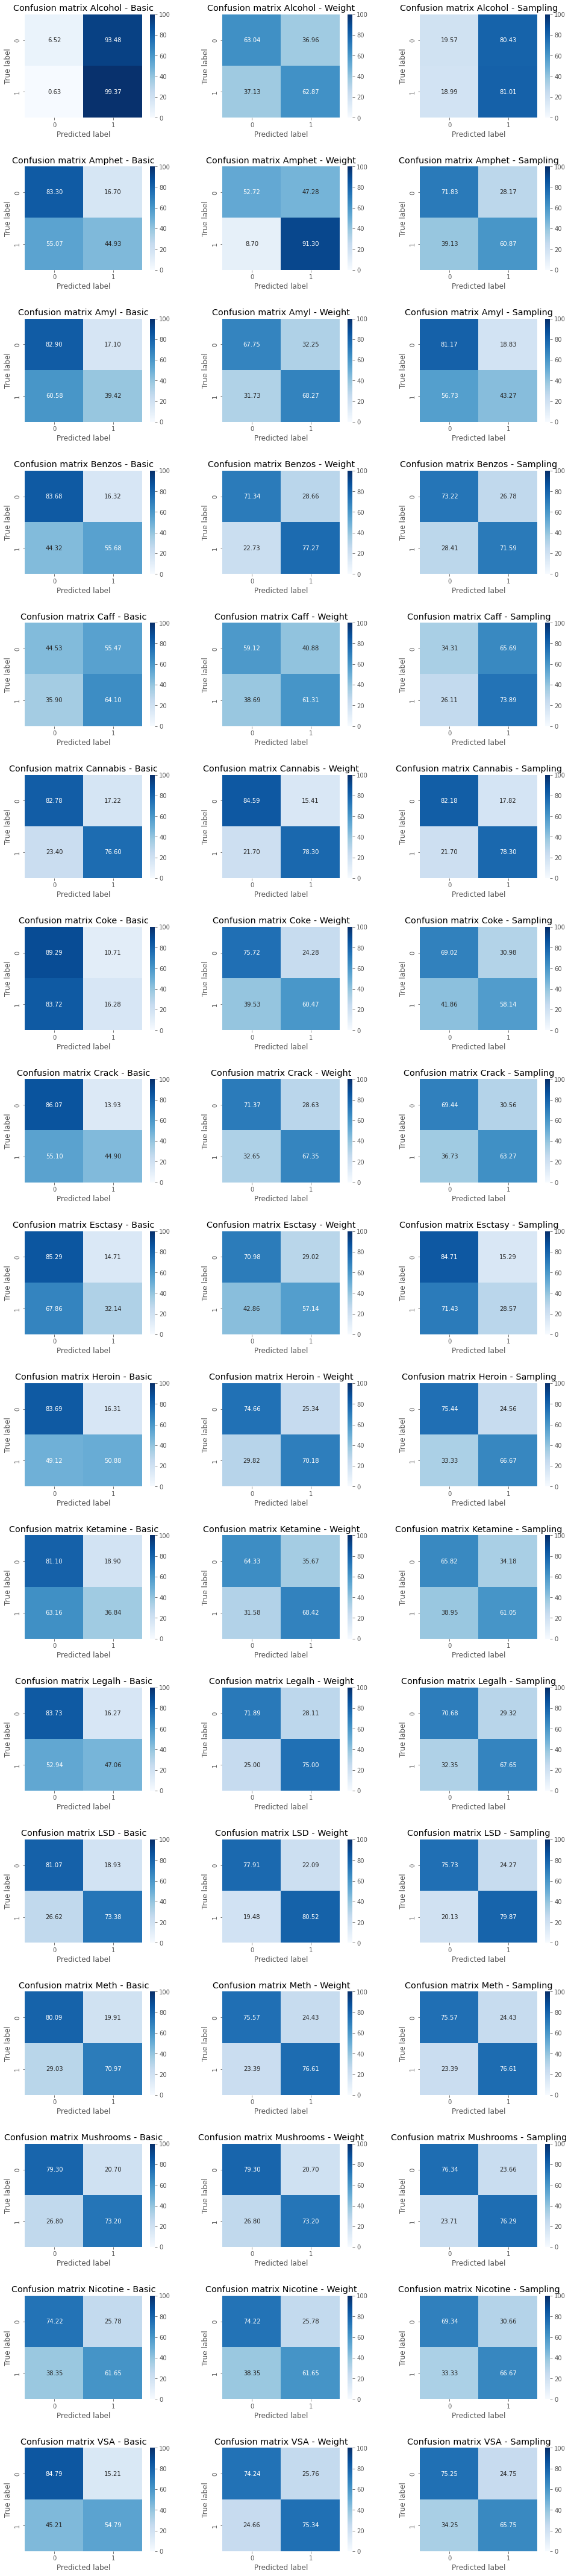

In [90]:
nrows = 17
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(14,60))
drug_names_ = list(best_model_weight.keys())
i = 0
for r in range(nrows):
    j = 0
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_sampled, y_train_sampled = list_X[drug_names_[i]], list_y[drug_names_[i]]
    for c in range(ncols):
        model = All_models.iloc[j,i]
        if c!=2:
            model.fit(X_train, y_train_i)
        else:
            model.fit(X_train_sampled, y_train_sampled)
        preds = model.predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix ' + drug_names_[i] + " - " + All_models.index[j])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        j+=1
    i+=1
fig.tight_layout(pad=3.0)
fig.show()

#### Confusion matrix for all drugs

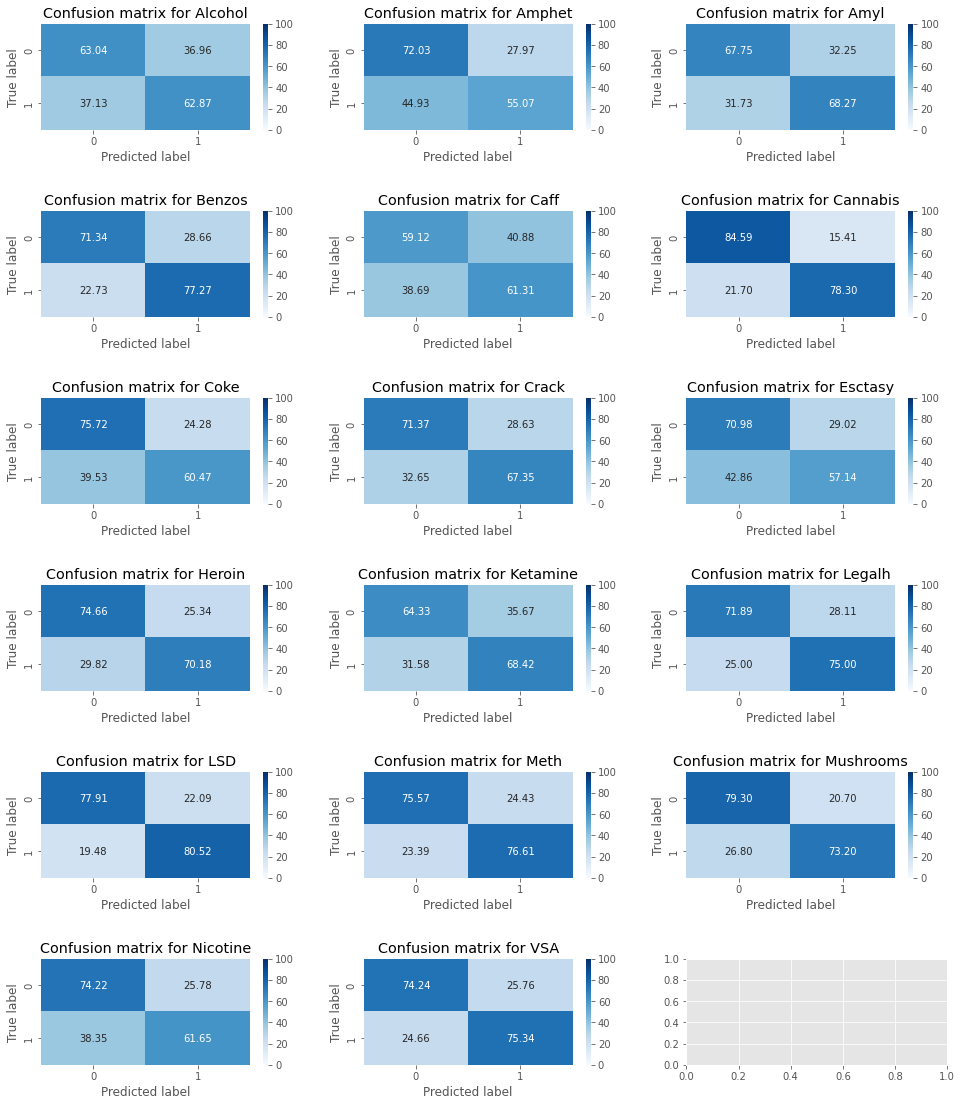

In [91]:
nrows = 6
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(14,16))
drug_names_ = list(best_model_weight.keys())
i = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]

        model = best_model_weight[drug_names_[i]]
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + drug_names_[i])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        i+=1
        if i==17:
          break
fig.tight_layout(pad=3.0)
fig.show()

<a name="tuning">

### Tuning hyperparameters
As said earlier, we used only the weighting technique because it is the most efficient method.

In [92]:
best_tuned_model = dict()

In [93]:
All_scores.loc["Weight"]

Alcohol      0.629563
Amphet       0.691905
Amyl         0.680091
Benzos       0.743058
Caff         0.602147
Cannabis      0.81445
Coke         0.680911
Crack        0.693601
Esctasy      0.640616
Heroin       0.724158
Ketamine     0.663761
Legalh       0.734438
LSD          0.792161
Meth         0.760893
Mushrooms    0.762485
Nicotine     0.679324
VSA          0.747909
Name: Weight, dtype: object

In [94]:
# We will use the same parameters for the grid search for each drug
model_names = ["LogisticRegression", "SVC", "BernoulliNB"]
models = [LogisticRegression(class_weight="balanced", max_iter=1000), SVC(class_weight="balanced", probability=True), BernoulliNB()]
models_without_params = [LogisticRegression, SVC]
parameters_dict = [
                   {    
                      'penalty':('l2', 'l1', 'elasticnet'),
                      'tol':[1e-3,1e-4,1e-5],
                      'C':[1e-1,1,10],
                      'fit_intercept':(True,False),
                      'intercept_scaling':[1e-1,1,10],
                      'class_weight':['balanced'],
                      'solver':('newton-cg', 'lbfgs','liblinear', 'sag', 'saga'),
                      'multi_class': ['ovr'],
                      #'l1_ratio':[0.1,0.15,0.2,0.25],
                      'max_iter':[10000]
                  },
                  {
                      'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
                      'gamma':('scale', 'auto'),
                      'shrinking':(True,False),
                      'probability':[True],
                      'tol':[1e-2,1e-3,1e-4],
                      'class_weight':["balanced"]
                  },
                  {
                      'alpha':np.arange(1,10,1),
                      'fit_prior':(True,False),
                  }
]

In [95]:
def hyperparam_tuning(y_train, y_test, models_name=model_names, models=models, parameters_dict=parameters_dict):
    """
    Apply grid search on the 3 selected models for a given drug and return all scores for each model
    - Balanced accuracy score on y_test for each original model
    - Balanced accuracy score on y_train for each model
    - Balanced accuracy score on y_test for each model
    - Best parameters for each model

    Parameters
    ----------
    y_train: pandas.core.series.series
        The trainset associated to the drug
    y_test: pandas.core.series.series
        The testset associated to the drug 
    models_name: list
        All model names
    models: list
        All models
    parameters_dict: dict
        All parameters for each model

    Returns
    ----------
    perf_test: dict
        All scores for the drug
    """
    perf_test = dict()
    for name, model in zip(model_names, models):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        perf_test[f"Orignal_{name}"] = {
                "test_balanced_accuracy":balanced_accuracy_score(y_test, preds),
        }
    with tqdm(total=len(models)) as bar:
        for name, model, parameters in zip(model_names, models, parameters_dict):
            clf = GridSearchCV(estimator=model,
                              param_grid=parameters,
                              scoring=make_scorer(balanced_accuracy_score))
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            perf_test[name] = {
                "balanced_accuracy":clf.best_score_,
                "test_balanced_accuracy":balanced_accuracy_score(y_test, preds),
                "best_params_":clf.best_params_
            }
            bar.update(1)
    return perf_test

##### Alcohol

In [96]:
drug_name = "Alcohol"
results_alcohol = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_alcohol

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [97]:
results_alcohol

{'BernoulliNB': {'balanced_accuracy': 0.6087387719945859,
  'best_params_': {'alpha': 3, 'fit_prior': False},
  'test_balanced_accuracy': 0.6104155200880572},
 'LogisticRegression': {'balanced_accuracy': 0.6082332920248202,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.592735277930655},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.5001605210053202},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6295633828655293},
 'Orignal_SVC': {'test_balanced_accuracy': 0.5903962575674189},
 'SVC': {'balanced_accuracy': 0.6111622194097277,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'scale',
   'kernel': 'poly',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.5560906255732894}}

##### Amphet

In [98]:
drug_name = "Amphet"
results_amphet = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_amphet

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [99]:
results_amphet

{'BernoulliNB': {'balanced_accuracy': 0.7536348136092381,
  'best_params_': {'alpha': 4, 'fit_prior': False},
  'test_balanced_accuracy': 0.6854460093896713},
 'LogisticRegression': {'balanced_accuracy': 0.7524823684414477,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 10,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.6812177412299887},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.641136675123203},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6870498352433441},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6610824366488788},
 'SVC': {'balanced_accuracy': 0.7625970704487328,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.6629049660280524}}

##### Amyl

In [100]:
drug_name = "Amyl"
results_amyl = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_amyl

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [101]:
results_amyl

{'BernoulliNB': {'balanced_accuracy': 0.6692415074468191,
  'best_params_': {'alpha': 3, 'fit_prior': False},
  'test_balanced_accuracy': 0.6537629037629038},
 'LogisticRegression': {'balanced_accuracy': 0.7022577305783958,
  'best_params_': {'C': 10,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'newton-cg',
   'tol': 0.001},
  'test_balanced_accuracy': 0.6779262404262405},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.539044289044289},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6800907425907425},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6716824841824842},
 'SVC': {'balanced_accuracy': 0.6942782530361893,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'scale',
   'kernel': 'linear',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.66999666999667}}

##### Benzos

In [102]:
drug_name = "Benzos"
results_benzos = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_benzos

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [103]:
results_benzos

{'BernoulliNB': {'balanced_accuracy': 0.6818543314439347,
  'best_params_': {'alpha': 4, 'fit_prior': False},
  'test_balanced_accuracy': 0.731694560669456},
 'LogisticRegression': {'balanced_accuracy': 0.697058464637124,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'saga',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7321462533282617},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.696819132750095},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7430581970330924},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6935621909471281},
 'SVC': {'balanced_accuracy': 0.6848828609430525,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'scale',
   'kernel': 'linear',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.729602510460251}}

##### Caff

In [104]:
drug_name = "Caff"
results_caff = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_caff

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [105]:
results_caff

{'BernoulliNB': {'balanced_accuracy': 0.5538812038298788,
  'best_params_': {'alpha': 4, 'fit_prior': False},
  'test_balanced_accuracy': 0.5891736001225052},
 'LogisticRegression': {'balanced_accuracy': 0.5710051638815177,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'saga',
   'tol': 0.0001},
  'test_balanced_accuracy': 0.5692069487689926},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.505274530821976},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6021472444830109},
 'Orignal_SVC': {'test_balanced_accuracy': 0.5543021455430215},
 'SVC': {'balanced_accuracy': 0.5703482980308718,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': False,
   'tol': 0.01},
  'test_balanced_accuracy': 0.6008881629319586}}

##### Cannabis

In [106]:
drug_name = "Cannabis"
results_cannabis = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_cannabis

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [107]:
results_cannabis

{'BernoulliNB': {'balanced_accuracy': 0.7903155561979093,
  'best_params_': {'alpha': 1, 'fit_prior': False},
  'test_balanced_accuracy': 0.8029825801889825},
 'LogisticRegression': {'balanced_accuracy': 0.7923692064868535,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'newton-cg',
   'tol': 0.001},
  'test_balanced_accuracy': 0.8129395127595295},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.7977694928328084},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.8144500867776563},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7978980523237128},
 'SVC': {'balanced_accuracy': 0.7954402989697107,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.001},
  'test_balanced_accuracy': 0.8108118531850614}}

##### Coke

In [108]:
drug_name = "Coke"
results_coke = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_coke

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [109]:
results_coke

{'BernoulliNB': {'balanced_accuracy': 0.6938275753202238,
  'best_params_': {'alpha': 5, 'fit_prior': False},
  'test_balanced_accuracy': 0.6512739561563431},
 'LogisticRegression': {'balanced_accuracy': 0.7108694148776233,
  'best_params_': {'C': 10,
   'class_weight': 'balanced',
   'fit_intercept': False,
   'intercept_scaling': 1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'sag',
   'tol': 0.0001},
  'test_balanced_accuracy': 0.6656143003246031},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.5278580639423718},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6637022544355018},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6809106674374139},
 'SVC': {'balanced_accuracy': 0.7150343526369595,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.6831339766107876}}

##### Crack

In [110]:
drug_name = "Crack"
results_crack = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_crack

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [111]:
results_crack

{'BernoulliNB': {'balanced_accuracy': 0.6819046257099156,
  'best_params_': {'alpha': 1, 'fit_prior': False},
  'test_balanced_accuracy': 0.6665219279201042},
 'LogisticRegression': {'balanced_accuracy': 0.6994467676521844,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7121738443926893},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.6548573007539573},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6927327991157779},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6936012315951525},
 'SVC': {'balanced_accuracy': 0.6723013612970961,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.001},
  'test_balanced_accuracy': 0.6922985828760905}}

##### Esctasy

In [112]:
drug_name = "Esctasy"
results_esctasy = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_esctasy

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [113]:
results_esctasy

{'BernoulliNB': {'balanced_accuracy': 0.7277857152306492,
  'best_params_': {'alpha': 2, 'fit_prior': False},
  'test_balanced_accuracy': 0.6606442577030813},
 'LogisticRegression': {'balanced_accuracy': 0.7560618989033087,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'newton-cg',
   'tol': 0.001},
  'test_balanced_accuracy': 0.6386554621848739},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.5486344537815127},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6376750700280112},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6406162464985994},
 'SVC': {'balanced_accuracy': 0.7605029037848421,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7044117647058823}}

##### Heroin

In [114]:
drug_name = "Heroin"
results_heroin = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_heroin

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [115]:
results_heroin

{'BernoulliNB': {'balanced_accuracy': 0.7300943585385764,
  'best_params_': {'alpha': 1, 'fit_prior': False},
  'test_balanced_accuracy': 0.7171440388791231},
 'LogisticRegression': {'balanced_accuracy': 0.7421355153795108,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': False,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'saga',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7152483369524006},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.6728535484093338},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6860545272808741},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7241581360079964},
 'SVC': {'balanced_accuracy': 0.7391192288045372,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7123013821390412}}

##### Ketamine

In [116]:
drug_name = "Ketamine"
results_ketamine = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_ketamine

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [117]:
results_ketamine

{'BernoulliNB': {'balanced_accuracy': 0.6814379432346949,
  'best_params_': {'alpha': 1, 'fit_prior': False},
  'test_balanced_accuracy': 0.6522181249301597},
 'LogisticRegression': {'balanced_accuracy': 0.6964271570972264,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.6522181249301597},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.5897306961671696},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6523522181249302},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6637613141133087},
 'SVC': {'balanced_accuracy': 0.6954815463256788,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.001},
  'test_balanced_accuracy': 0.6595597273438373}}

##### Legalh

In [118]:
drug_name = "Legalh"
results_legalh = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_legalh

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [119]:
results_legalh

{'BernoulliNB': {'balanced_accuracy': 0.7329516268250227,
  'best_params_': {'alpha': 1, 'fit_prior': False},
  'test_balanced_accuracy': 0.7140326009922041},
 'LogisticRegression': {'balanced_accuracy': 0.7378562733238351,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7264056224899598},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.6539688164422395},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7344377510040161},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6923281360737066},
 'SVC': {'balanced_accuracy': 0.7325789879270486,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.748789274746043}}

##### LSD

In [120]:
drug_name = "LSD"
results_LSD = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_LSD

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [121]:
results_LSD

{'BernoulliNB': {'balanced_accuracy': 0.7775136392034705,
  'best_params_': {'alpha': 1, 'fit_prior': True},
  'test_balanced_accuracy': 0.7722229227083596},
 'LogisticRegression': {'balanced_accuracy': 0.7937629352445817,
  'best_params_': {'C': 1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7901273483797755},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.7722229227083596},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7921605093935191},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7873061404614803},
 'SVC': {'balanced_accuracy': 0.7970449015777479,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7941936704072626}}

##### Meth

In [122]:
drug_name = "Meth"
results_meth = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_meth

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [123]:
results_meth

{'BernoulliNB': {'balanced_accuracy': 0.749612847625642,
  'best_params_': {'alpha': 7, 'fit_prior': False},
  'test_balanced_accuracy': 0.7603999416143629},
 'LogisticRegression': {'balanced_accuracy': 0.7542274881936372,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'lbfgs',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7631550138665888},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.7552911983652022},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7608925704276748},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7455480951685884},
 'SVC': {'balanced_accuracy': 0.7435117229089594,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'sigmoid',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7450554663552766}}

##### Mushrooms

In [124]:
drug_name = "Mushrooms"
results_mushrooms = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_mushrooms

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [125]:
results_mushrooms

{'BernoulliNB': {'balanced_accuracy': 0.7626908573993715,
  'best_params_': {'alpha': 6, 'fit_prior': False},
  'test_balanced_accuracy': 0.7604755570335883},
 'LogisticRegression': {'balanced_accuracy': 0.7777433787221308,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 10,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.7504988360492184},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.762484757787385},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7440001108524554},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7589097661013191},
 'SVC': {'balanced_accuracy': 0.7709573544815204,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7484896352954218}}

##### Nicotine

In [126]:
drug_name = "Nicotine"
results_nicotine = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_nicotine

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [127]:
results_nicotine

{'BernoulliNB': {'balanced_accuracy': 0.6579220193824655,
  'best_params_': {'alpha': 8, 'fit_prior': False},
  'test_balanced_accuracy': 0.674347158218126},
 'LogisticRegression': {'balanced_accuracy': 0.6670504121188705,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 10,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear',
   'tol': 0.0001},
  'test_balanced_accuracy': 0.6657362656575874},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.6793238669713886},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.6586177612928203},
 'Orignal_SVC': {'test_balanced_accuracy': 0.6735541318546826},
 'SVC': {'balanced_accuracy': 0.6735480456550436,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'scale',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.6735541318546826}}

##### VSA

In [128]:
drug_name = "VSA"
results_VSA = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_VSA

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [129]:
results_VSA

{'BernoulliNB': {'balanced_accuracy': 0.7597151788825925,
  'best_params_': {'alpha': 2, 'fit_prior': False},
  'test_balanced_accuracy': 0.7250826641473784},
 'LogisticRegression': {'balanced_accuracy': 0.7529402901172977,
  'best_params_': {'C': 0.1,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'intercept_scaling': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'penalty': 'l2',
   'solver': 'liblinear',
   'tol': 0.001},
  'test_balanced_accuracy': 0.743852288199172},
 'Orignal_BernoulliNB': {'test_balanced_accuracy': 0.6979076940176165},
 'Orignal_LogisticRegression': {'test_balanced_accuracy': 0.7479090833310178},
 'Orignal_SVC': {'test_balanced_accuracy': 0.7217760982522436},
 'SVC': {'balanced_accuracy': 0.7711153337995961,
  'best_params_': {'class_weight': 'balanced',
   'gamma': 'auto',
   'kernel': 'rbf',
   'probability': True,
   'shrinking': True,
   'tol': 0.01},
  'test_balanced_accuracy': 0.7309177804329101}}

##### Save data

In [130]:
# SAVE
with open("best_params_score_models.pkl", "wb") as pkl_handle:
	pickle.dump(best_tuned_model, pkl_handle)

##### Comparison

In [131]:
best_models_drugs = dict()
for name in best_tuned_model:
    list_acc = list()
    list_model = list()
    for model, element in best_tuned_model[name].items():
        list_acc.append(element["test_balanced_accuracy"])
        list_model.append(model)
    index_max = np.argmax(list_acc)
    if (index_max<len(models) or index_max==len(best_tuned_model[name])-1):
        best_model = models[index_max]
    else:
        best_model = models_without_params[index_max-len(models)](**best_tuned_model[name][list_model[index_max]]['best_params_'])
    best_models_drugs[name] = best_model

In [132]:
for name in best_models_drugs:
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)
    print(balanced_accuracy_score(y_test[name],preds))

0.6295633828655293
0.6870498352433441
0.6800907425907425
0.7430581970330924
0.6021472444830109
0.8144500867776563
0.6831339766107876
0.7112067264042947
0.7044117647058823
0.7241581360079964
0.6637613141133087
0.748789274746043
0.7941936704072626
0.7631550138665888
0.762484757787385
0.6793238669713886
0.7479090833310178


<a name="final_models">

## Final models for each drugs
---

In [133]:
# We defined the selected models
models = [LogisticRegression(class_weight="balanced", max_iter=1000), SVC(class_weight="balanced", probability=True), BernoulliNB()]
models_without_params = [LogisticRegression, SVC]

In [134]:
# We load the best paramters for each models obtained by tuning
with open("best_params_score_models.pkl", "rb") as pkl_handle:
	  best_tuned_model = pickle.load(pkl_handle)

In [135]:
# We create a dictionnary that contains the best model for each drug
best_models_drugs = dict()
for name in best_tuned_model:
    list_acc = list()
    list_model = list()
    for model, element in best_tuned_model[name].items():
        list_acc.append(element["test_balanced_accuracy"])
        list_model.append(model)
    index_max = np.argmax(list_acc)
    if (index_max<len(models) or index_max==len(best_tuned_model[name])-1):
        best_model = models[index_max]
    else:
        best_model = models_without_params[index_max-len(models)](**best_tuned_model[name][list_model[index_max]]['best_params_'])
    best_models_drugs[name] = best_model

In [136]:
def evaluation_report(name):
    """
    Fit the best model for each drug and display 4 metrics:
    - Balanced accuracy score
    - Classification report
    - Confusion matric (Heatmap)
    - ROC curve
    It also display the importance of each variable (if available)

    Parameters
    ----------
    name: str
        Drug name
    """
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)

    # Balanced accuracy
    balanced_score = balanced_accuracy_score(y_test[name],preds)

    # Classification report
    classification_report_ = classification_report(y_test[name],preds)

    # Confusion matrix
    conf_mat = confusion_matrix(y_test[name], preds)
    conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)

    # ROC curve, AUC
    probs = best_models_drugs[name].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test[name], preds)
    roc_auc = auc(fpr, tpr)

    print(f"Evaluation {name}")
    print("Model used:",best_models_drugs[name])
    print("Balanced accuracy score:", balanced_score)
    print("AUC:", roc_auc)
    print("\nClassification report:", classification_report_,sep="\n")

    fig, axes = plt.subplots(1,2,figsize=(14,5))

    sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion matrix for ' + name)
    axes[0].set_xlabel('Predicted label')
    axes[0].set_ylabel('True label')

    axes[1].set_title('ROC curve for ' + name)
    axes[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    axes[1].legend(loc = 'lower right')
    axes[1].plot([0, 1], [0, 1],'r--')
    axes[1].set_xlim([0, 1])
    axes[1].set_ylim([0, 1])
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_xlabel('False Positive Rate')
    plt.show()

    # Importance graph
    try:
        # get importance
        importance = best_models_drugs[name].coef_
        # plot feature importance
        plt.figure(figsize=(20,5))
        plt.bar([x for x in range(len(importance[0]))], importance[0])
        plt.xticks(np.arange(0,X_train.shape[1]),X_train.columns,rotation=45)
        plt.xlabel("Column")
        plt.ylabel("Importance")
        plt.title("Importance of each columns for this model")
        plt.show()
    except AttributeError:
        print("Importance not available")

<a name="alcohol">

### Alcohol

Evaluation Alcohol
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6295633828655293
AUC: 0.665978719501009

Classification report:
              precision    recall  f1-score   support

           0       0.25      0.63      0.36        92
           1       0.90      0.63      0.74       474

    accuracy                           0.63       566
   macro avg       0.57      0.63      0.55       566
weighted avg       0.79      0.63      0.68       566



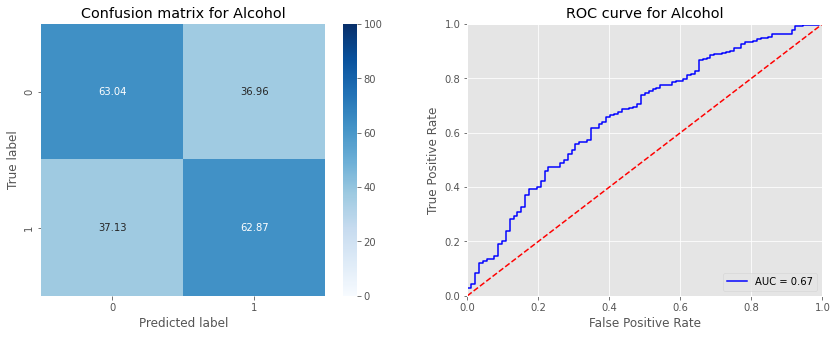

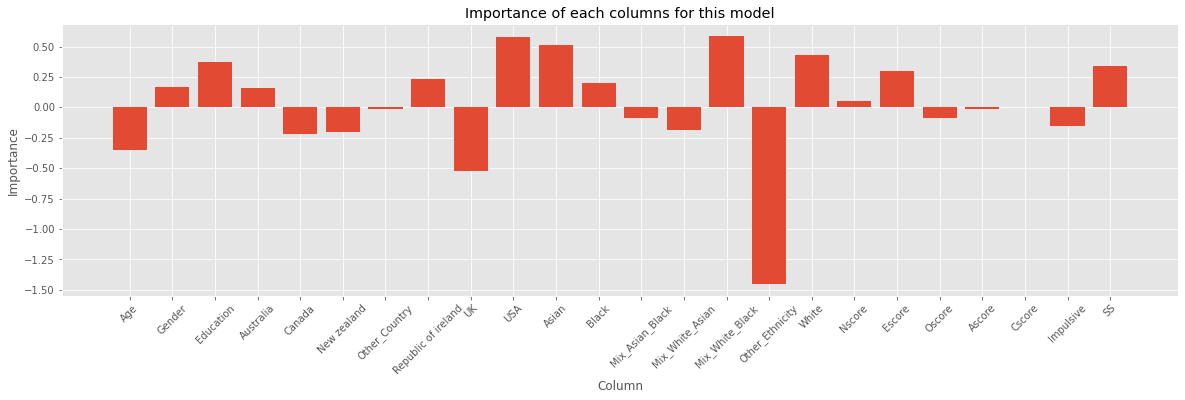

In [137]:
evaluation_report("Alcohol")

<a name="amphet">

### Amphet

Evaluation Amphet
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6870498352433441
AUC: 0.7754352200157466

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       497
           1       0.25      0.64      0.36        69

    accuracy                           0.72       566
   macro avg       0.59      0.69      0.59       566
weighted avg       0.85      0.72      0.77       566



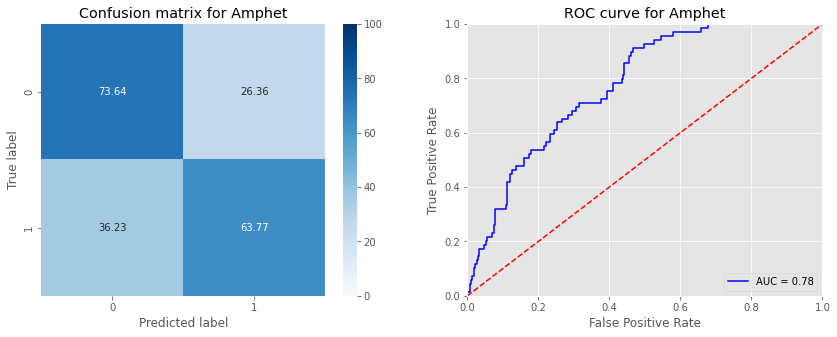

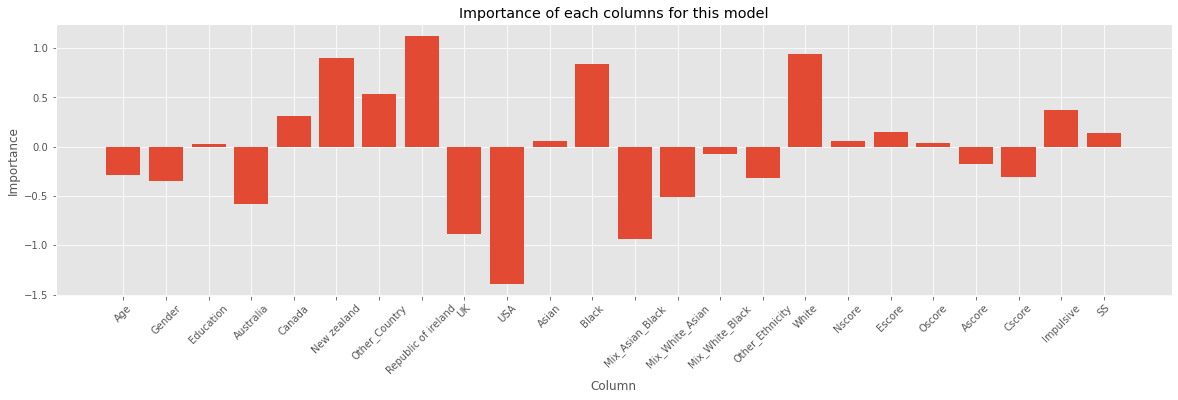

In [138]:
evaluation_report("Amphet")

<a name="amyl">

### Amyl

Evaluation Amyl
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6800907425907425
AUC: 0.7346403596403596

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       462
           1       0.32      0.68      0.44       104

    accuracy                           0.68       566
   macro avg       0.61      0.68      0.61       566
weighted avg       0.80      0.68      0.71       566



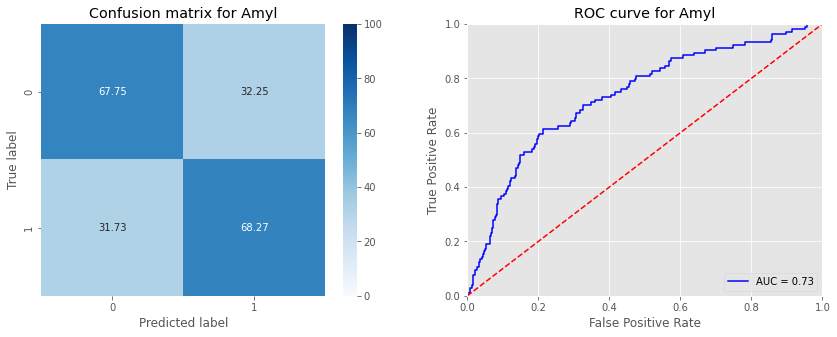

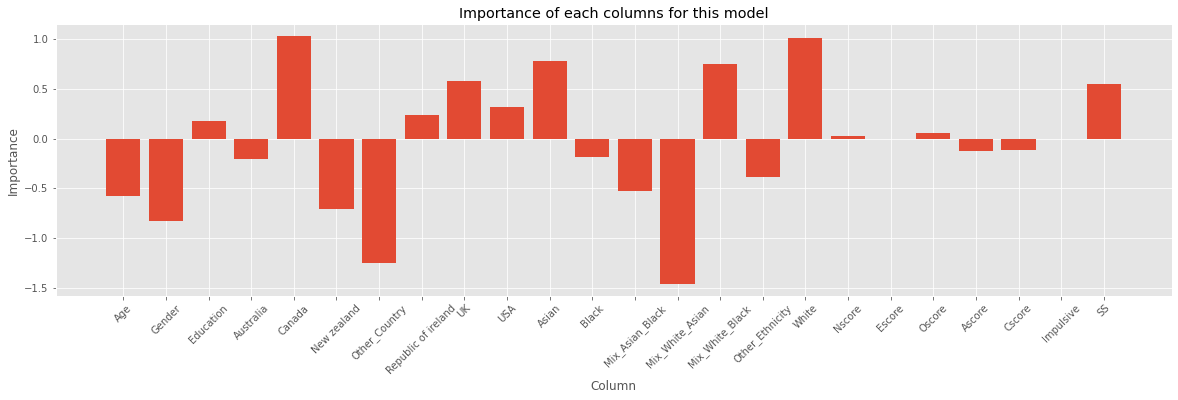

In [139]:
evaluation_report("Amyl")

<a name="benzos">

### Benzos

Evaluation Benzos
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.7430581970330924
AUC: 0.7977367820464055

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       478
           1       0.33      0.77      0.46        88

    accuracy                           0.72       566
   macro avg       0.64      0.74      0.64       566
weighted avg       0.85      0.72      0.76       566



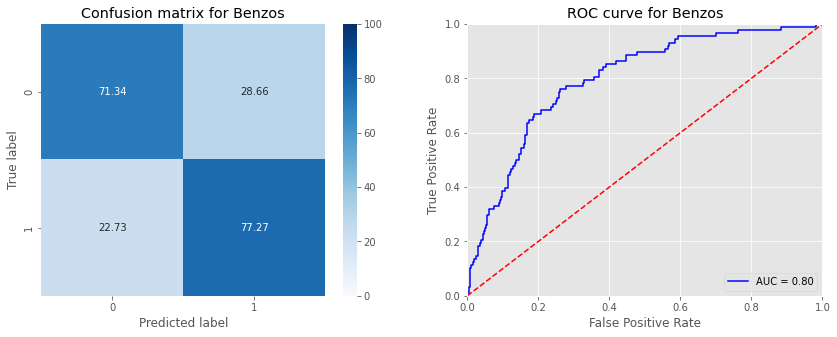

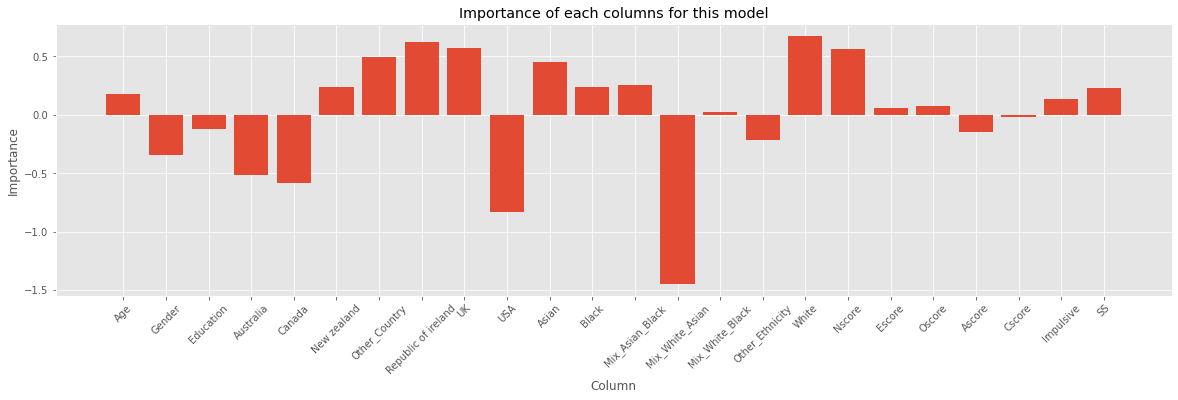

In [140]:
evaluation_report("Benzos")

<a name="caff">

### Caff

Evaluation Caff
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6021472444830109
AUC: 0.6369931771391626

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.59      0.42       137
           1       0.82      0.61      0.70       429

    accuracy                           0.61       566
   macro avg       0.58      0.60      0.56       566
weighted avg       0.70      0.61      0.64       566



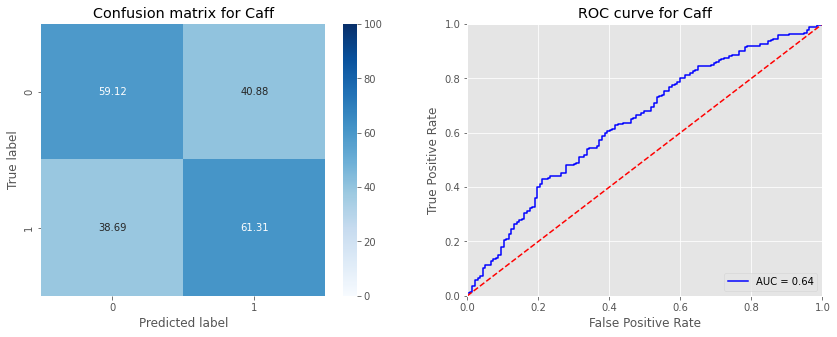

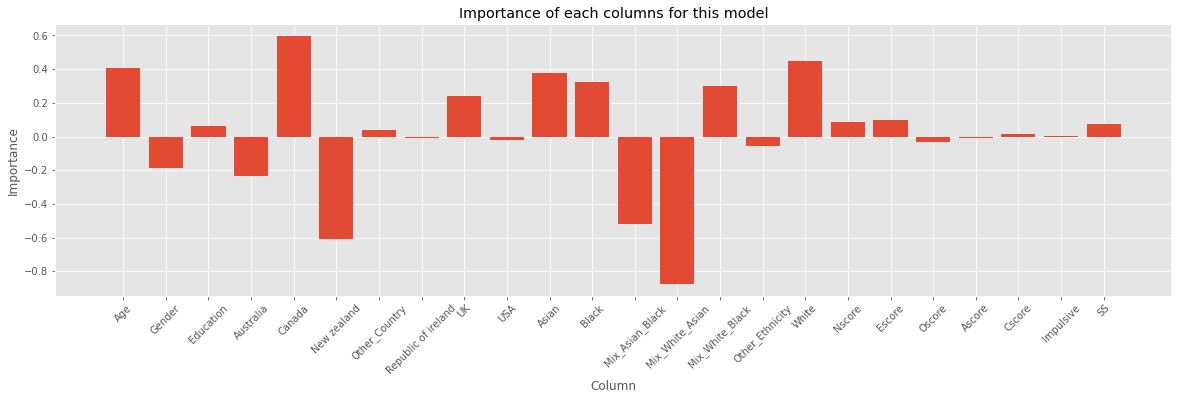

In [141]:
evaluation_report("Caff")

<a name="cannabis">

### Cannabis

Evaluation Cannabis
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.8144500867776563
AUC: 0.8839622035096741

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       331
           1       0.78      0.78      0.78       235

    accuracy                           0.82       566
   macro avg       0.81      0.81      0.81       566
weighted avg       0.82      0.82      0.82       566



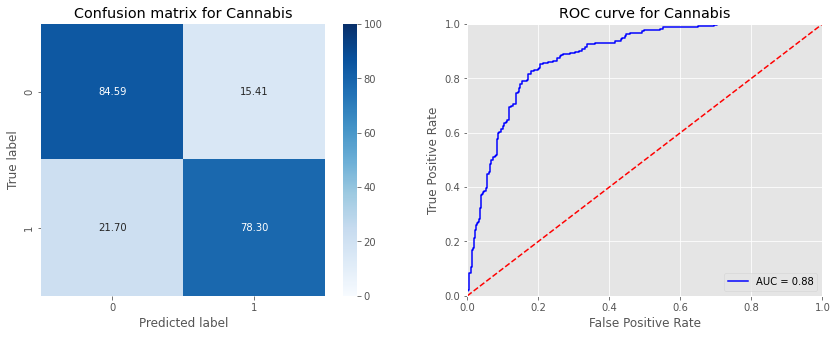

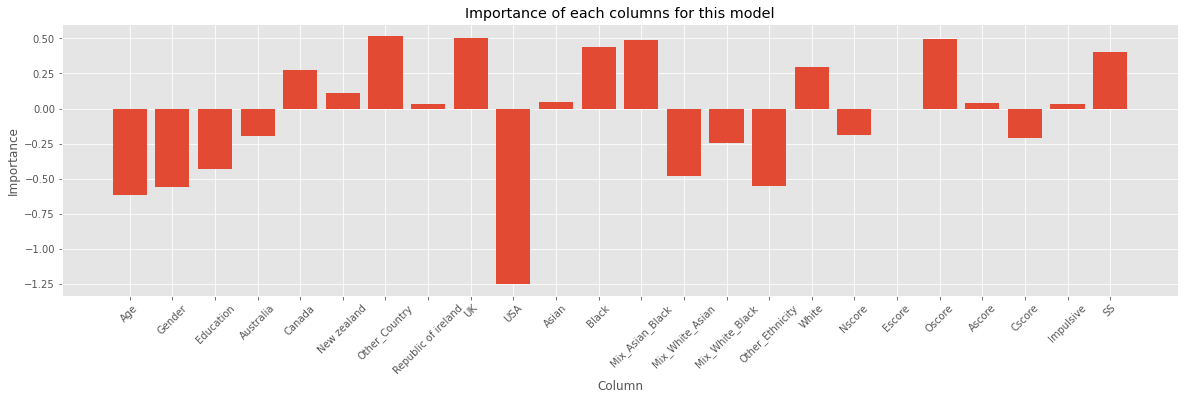

In [142]:
evaluation_report("Cannabis")

<a name="coke">

### Coke

Evaluation Coke
Model used: SVC(class_weight='balanced', gamma='auto', probability=True, tol=0.01)
Balanced accuracy score: 0.6831339766107876
AUC: 0.7169727422295344

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       523
           1       0.16      0.65      0.25        43

    accuracy                           0.71       566
   macro avg       0.56      0.68      0.54       566
weighted avg       0.90      0.71      0.78       566



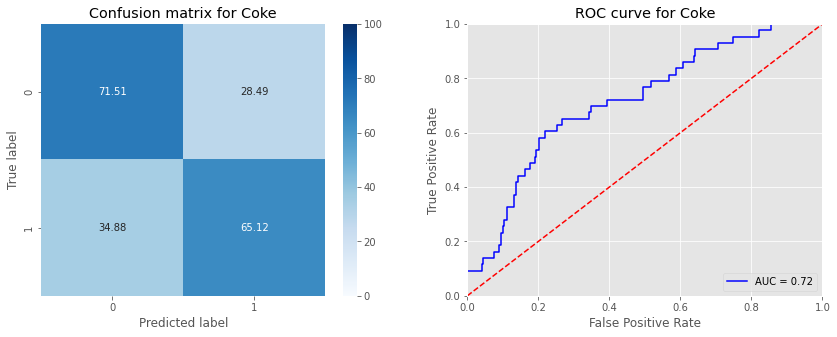

Importance not available


In [143]:
evaluation_report("Coke")

<a name="crack">

### Crack

Evaluation Crack
Model used: LogisticRegression(C=0.1, class_weight='balanced', intercept_scaling=0.1,
                   max_iter=10000, multi_class='ovr', penalty='l1',
                   solver='liblinear', tol=0.001)
Balanced accuracy score: 0.7112067264042947
AUC: 0.7639047882208976

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       517
           1       0.18      0.76      0.29        49

    accuracy                           0.67       566
   macro avg       0.57      0.71      0.54       566
weighted avg       0.90      0.67      0.75       566



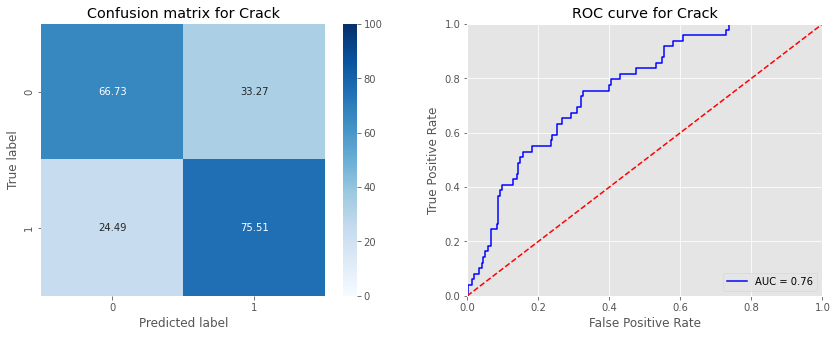

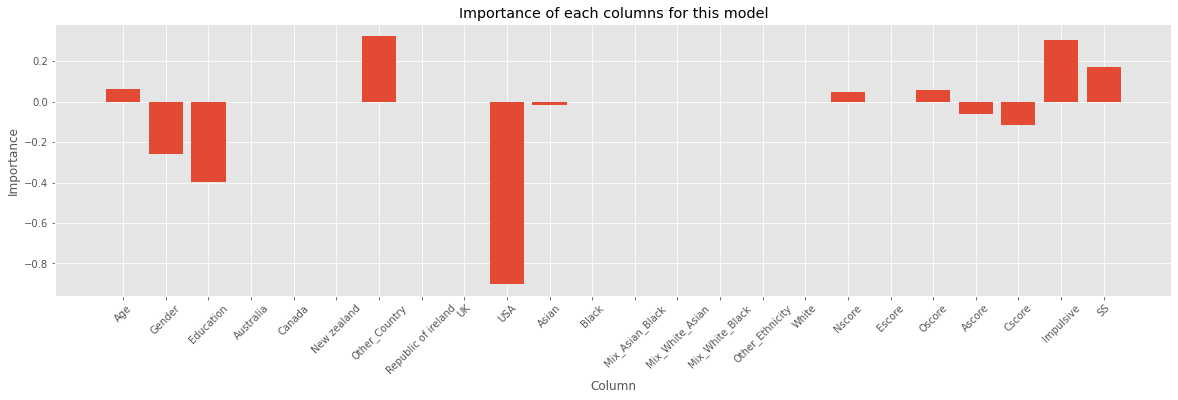

In [144]:
evaluation_report("Crack")

<a name="esctasy">

### Esctasy

Evaluation Esctasy
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.7044117647058823
AUC: 0.7233193277310924

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       510
           1       0.19      0.75      0.31        56

    accuracy                           0.67       566
   macro avg       0.58      0.70      0.55       566
weighted avg       0.88      0.67      0.73       566



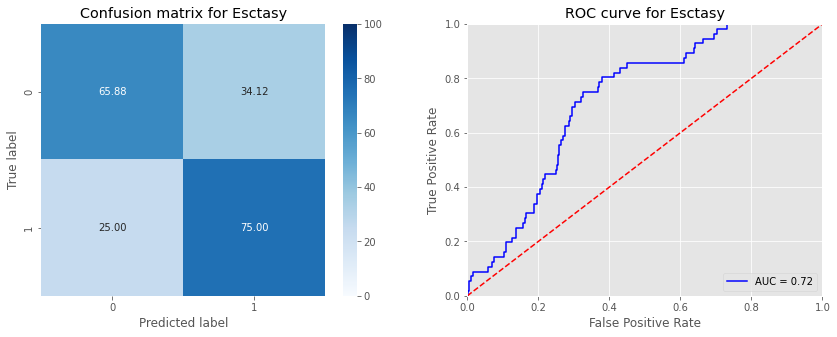

Importance not available


In [145]:
evaluation_report("Esctasy")

<a name="heroin">

### Heroin

Evaluation Heroin
Model used: SVC(class_weight='balanced', probability=True)
Balanced accuracy score: 0.7241581360079964
AUC: 0.799365801537242

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       509
           1       0.24      0.70      0.35        57

    accuracy                           0.74       566
   macro avg       0.60      0.72      0.60       566
weighted avg       0.88      0.74      0.79       566



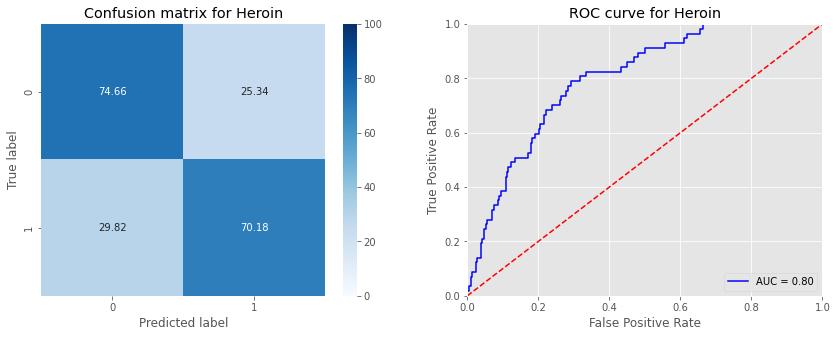

Importance not available


In [146]:
evaluation_report("Heroin")

<a name="ketamine">

### Ketamine

Evaluation Ketamine
Model used: SVC(class_weight='balanced', probability=True)
Balanced accuracy score: 0.6637613141133087
AUC: 0.7221924237344953

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       471
           1       0.28      0.68      0.40        95

    accuracy                           0.65       566
   macro avg       0.59      0.66      0.58       566
weighted avg       0.80      0.65      0.69       566



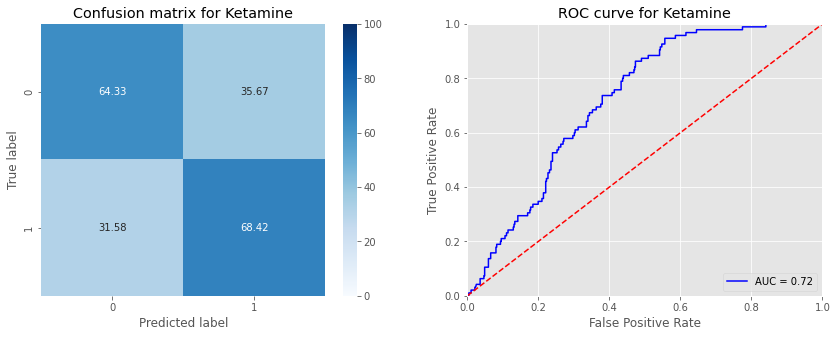

Importance not available


In [147]:
evaluation_report("Ketamine")

<a name="legalh">

### Legalh

Evaluation Legalh
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.748789274746043
AUC: 0.8062839593668792

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       498
           1       0.26      0.81      0.40        68

    accuracy                           0.70       566
   macro avg       0.61      0.75      0.60       566
weighted avg       0.88      0.70      0.75       566



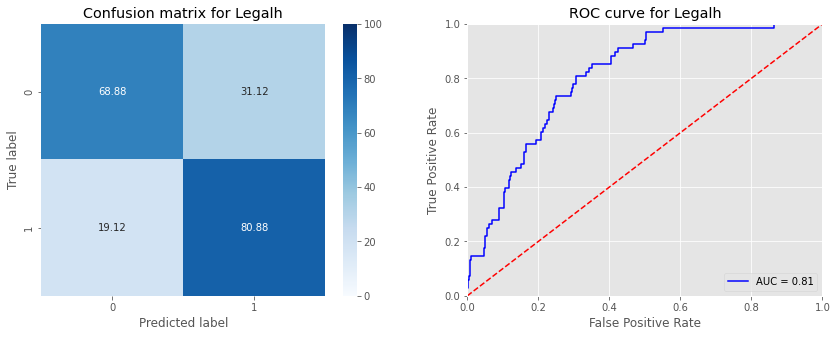

Importance not available


In [148]:
evaluation_report("Legalh")

<a name="LSD">

### LSD

Evaluation LSD
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.7941936704072626
AUC: 0.863809733955365

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       412
           1       0.58      0.81      0.67       154

    accuracy                           0.79       566
   macro avg       0.75      0.79      0.76       566
weighted avg       0.82      0.79      0.80       566



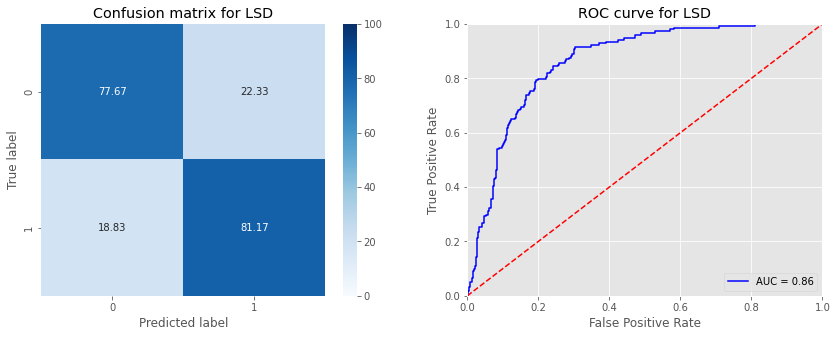

Importance not available


In [149]:
evaluation_report("LSD")

<a name="Meth">

### Meth

Evaluation Meth
Model used: LogisticRegression(C=0.1, class_weight='balanced', intercept_scaling=0.1,
                   max_iter=10000, multi_class='ovr', tol=0.001)
Balanced accuracy score: 0.7631550138665888
AUC: 0.8270690410159101

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       442
           1       0.47      0.77      0.58       124

    accuracy                           0.76       566
   macro avg       0.70      0.76      0.71       566
weighted avg       0.82      0.76      0.78       566



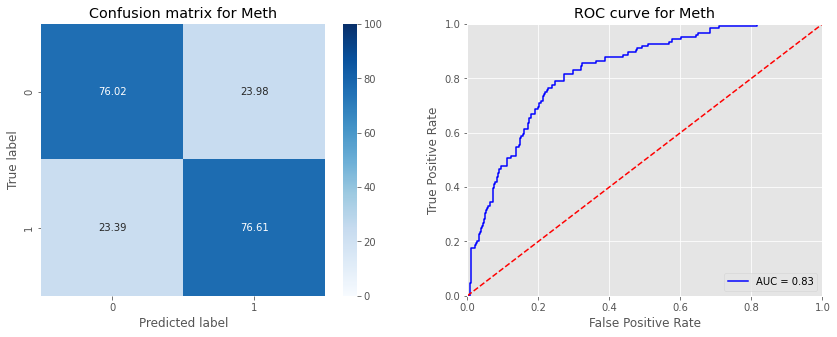

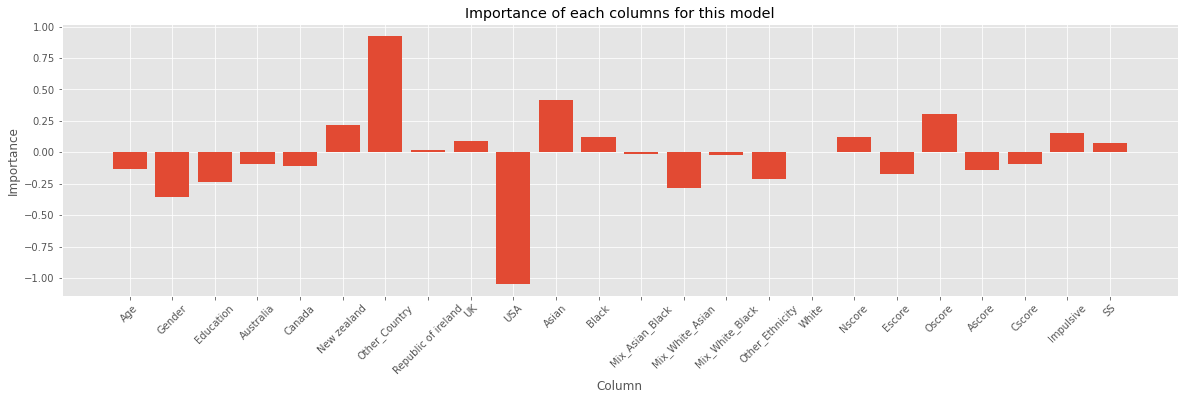

In [150]:
evaluation_report("Meth")

<a name="mushrooms">

### Mushrooms

Evaluation Mushrooms
Model used: BernoulliNB()
Balanced accuracy score: 0.762484757787385
AUC: 0.835363318922514

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       372
           1       0.65      0.73      0.69       194

    accuracy                           0.77       566
   macro avg       0.75      0.76      0.75       566
weighted avg       0.78      0.77      0.78       566



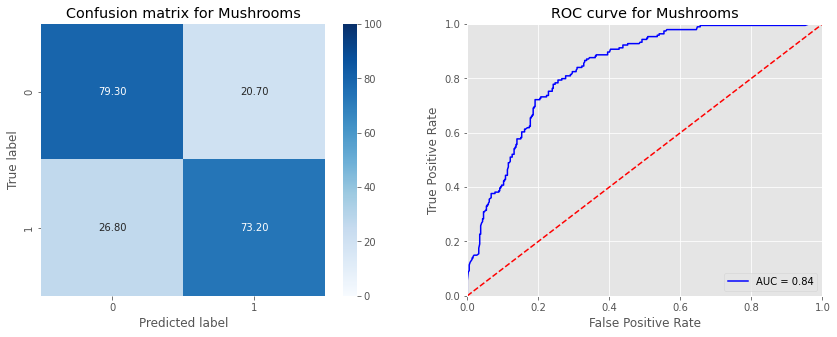

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


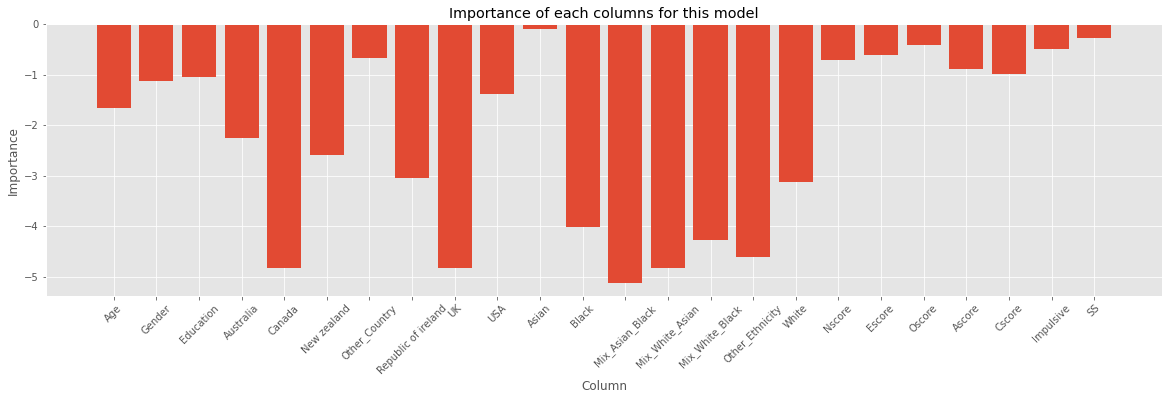

In [151]:
evaluation_report("Mushrooms")

<a name="nicotine">

### Nicotine

Evaluation Nicotine
Model used: BernoulliNB()
Balanced accuracy score: 0.6793238669713886
AUC: 0.7412673435490116

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       287
           1       0.70      0.62      0.66       279

    accuracy                           0.68       566
   macro avg       0.68      0.68      0.68       566
weighted avg       0.68      0.68      0.68       566



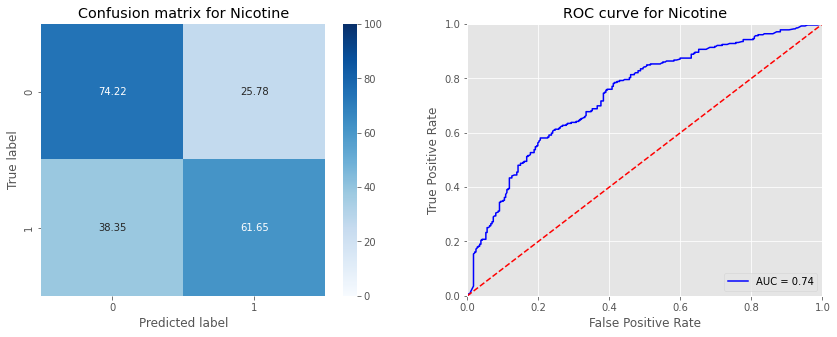

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


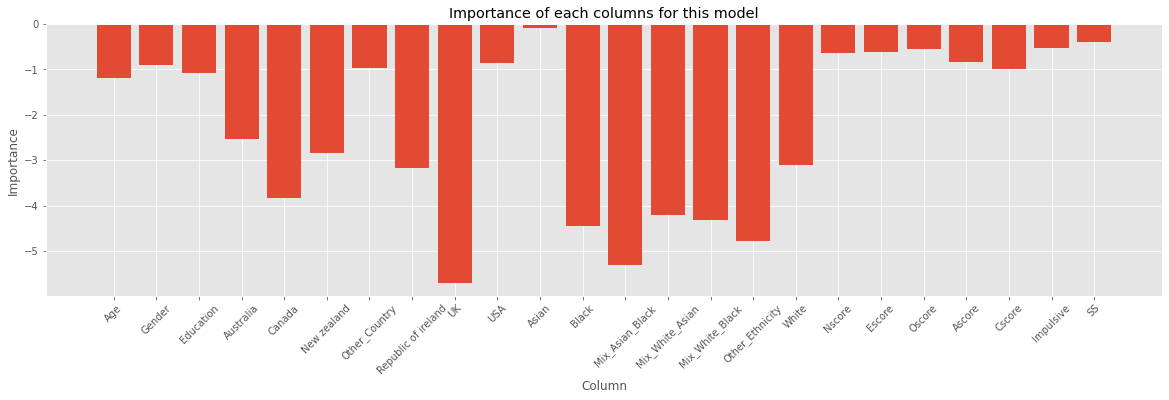

In [152]:
evaluation_report("Nicotine")

<a name="vsa">

### VSA

Evaluation VSA
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.7479090833310178
AUC: 0.8206118536219401

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       493
           1       0.30      0.75      0.43        73

    accuracy                           0.74       566
   macro avg       0.63      0.75      0.63       566
weighted avg       0.87      0.74      0.78       566



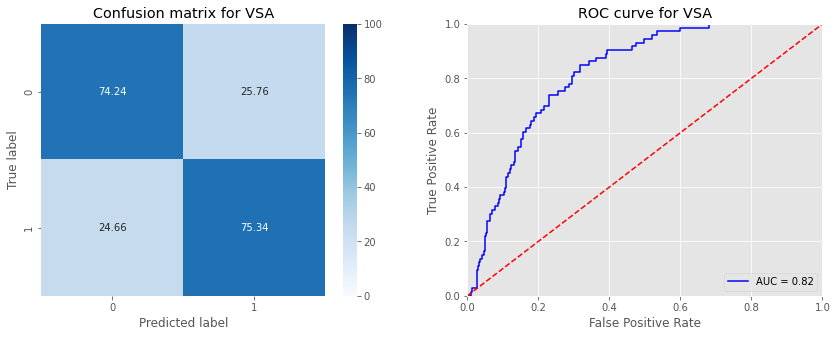

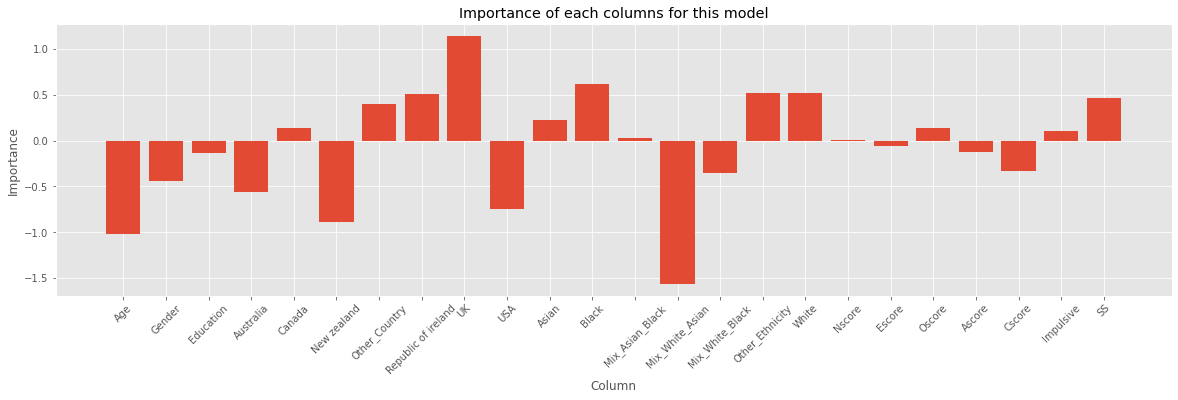

In [153]:
evaluation_report("VSA")

<a name="all">

### ALL

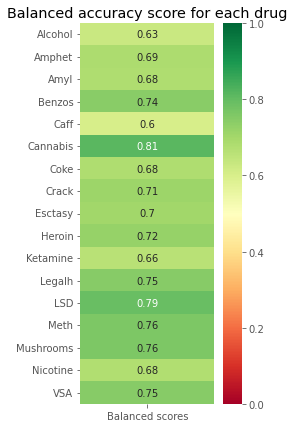

In [154]:
model_names = list(best_models_drugs.keys())
model_scores = list()
for name in best_models_drugs:
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)
    model_scores.append(balanced_accuracy_score(y_test[name],preds))

final_scores = pd.DataFrame({"Balanced scores": model_scores}, index=model_names)
plt.figure(figsize=(3,7))
sns.heatmap(final_scores,annot=True,cmap = 'RdYlGn',vmax=1.0,vmin=0.0)
plt.title("Balanced accuracy score for each drug")
plt.show()

### Save models
We save models for the django API

In [155]:
model_names = list(best_models_drugs.keys())
best_models_pickle = dict()
for name in best_models_drugs:
    m = best_models_drugs[name]
    m.fit(X_train, y_train[name])
    best_models_pickle[name] = m

pickle.dump(best_models_pickle, open( 'models' + ".p", "wb" ) )